## TBMI26 - Deep Learning Lab ##
### Lab overview ###
In this lab, you will experience the power of deep learning in an image classification task. The aim is to create a Convolutional Neural Network (CNN) and train it on CIFAR10 dataset.
***
** CNN **
There are hundreds, maybe thousands, of CNN architectures for image classification. In this lab, we will train LeNet [1] on image classification dataset. The architecture of the network is shown below
<img src="images/lenet.png" alt="Lenet Architecture" title="Lenet Architecture" />

Your <font color=blue>**first task**</font> is to try different combinations of activation functions and subsampling methods. For example:
1. Sigmoid activation + average pooling subsampling 
2. Sigmoid activation + max pooling subsampling 
3. ReLU activation + average pooling subsampling 

***

The <font color=blue>**second task**</font> is to plot the convergence curves (loss vs. epochs) and (accuracy vs. epochs) and see which of the three combinations above converges faster.

***

** CIFAR10 **
It is one of the earliest datasets for image classification. It has 60,000 images of 10 different classes of images. The dataset is divided into a training set (50,000 images) and a test set (10,000 images)

Your <font color=blue>**third task**</font> is to take the last network from the first task and retrain it again using data augmentation (random horizontal flip and random crop). How does this affect the performance of the network ?

***

The <font color=blue>**final task**</font> is to show some test images with their correpsonding groundtruth and predictions

***

[1] LeCun, Yann, et al. "Gradient-based learning applied to document recognition." Proceedings of the IEEE 86.11 (1998): 2278-2324.

### Import Modules

In [2]:
import os
import glob

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable
import torch.backends.cudnn as cudnn

import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

from models.Lenet import LeNet
from train import *
from test import *

%matplotlib notebook  

# Autoreload modules when they are updated
%load_ext autoreload
%autoreload 2

### Download and Load CIFAR-10 Dataset
First, we download and load the CIFAR10 dataset. Pytorch has a built-in function for that. We apply transformations on images in trainin set and test set separately. These transformations are *ToTensor* which normalizes the images to the range from 0 to 1 and then *Normalize* which does contrast normalization for all images to make them zero mean along each channel. Contrast normalization was shown to improve the accuracy of CNNs. More data augmentation trasformations could be added to *transform_train*.

In [3]:
# Check if CUDA support is available (GPU)
use_cuda = torch.cuda.is_available()

# Image transformations to apply to all images in the dataset (Data Augmentation)
transform_train = transforms.Compose([
    transforms.ToTensor(),                # Convert images to Tensors (The data structure that is used by Pytorch)
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)), # Normalize the images to zero mean
])

# Image transformations for the test set.
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Specify the path to the CIFAR-10 dataset and create a dataloader where you specify the "batch_size"
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

# Specify classes labels
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


### Load and initialize the network model
The network is constructed by creating an object of the class LeNet which defines the network architecture. By default, when this object is created, the weights of each convolution layer are initialized randomly.
Afterwards, we define the loss function. We use *CrossEntropyLoss* as it suits multi-label classification tasks. Then we define the training optimizer, you can choose between the famous gradient descent *SGD* or Adam optimizer.

### 1. Sigmoid activation + average pooling subsampling

In [4]:
# Load and initialize the network architecture 
model1 = LeNet(activation=F.sigmoid, pooling=F.avg_pool2d, pretrained=False)

# Load the last save checkpoint
use_checkpoint=False

if use_cuda:
    model1.cuda()
    cudnn.benchmark = True

# The objective (loss) function
objective = nn.CrossEntropyLoss()

# The optimizer used for training the model
optimizer = optim.Adam(model1.parameters())

#### Start Training

In [5]:
start_epoch = 1
num_epochs = 50
model1, loss_log1, acc_log1 = train(model1, trainloader, optimizer, objective, use_cuda, start_epoch, num_epochs=num_epochs)


Epoch: 1
Loss: 2.31401706 | Acc: 11.33% (29/256)
Loss: 2.31250167 | Acc: 10.74% (55/512)
Loss: 2.31006408 | Acc: 10.81% (83/768)
Loss: 2.31120050 | Acc: 9.86% (101/1024)
Loss: 2.31009116 | Acc: 10.08% (129/1280)
Loss: 2.30862101 | Acc: 10.48% (161/1536)
Loss: 2.30928789 | Acc: 10.49% (188/1792)
Loss: 2.30899337 | Acc: 10.55% (216/2048)
Loss: 2.30873137 | Acc: 10.63% (245/2304)
Loss: 2.30850663 | Acc: 10.39% (266/2560)
Loss: 2.30743155 | Acc: 10.37% (292/2816)
Loss: 2.30700030 | Acc: 10.19% (313/3072)
Loss: 2.30655536 | Acc: 10.31% (343/3328)
Loss: 2.30690433 | Acc: 10.38% (372/3584)
Loss: 2.30690293 | Acc: 10.36% (398/3840)
Loss: 2.30704863 | Acc: 10.50% (430/4096)
Loss: 2.30687499 | Acc: 10.43% (454/4352)
Loss: 2.30734093 | Acc: 10.50% (484/4608)
Loss: 2.30713674 | Acc: 10.59% (515/4864)
Loss: 2.30706633 | Acc: 10.59% (542/5120)
Loss: 2.30710395 | Acc: 10.62% (571/5376)
Loss: 2.30701098 | Acc: 10.55% (594/5632)
Loss: 2.30669363 | Acc: 10.68% (629/5888)
Loss: 2.30634649 | Acc: 10.77% 

Loss: 2.14856303 | Acc: 18.82% (9203/48896)
Loss: 2.14803124 | Acc: 18.85% (9265/49152)
Loss: 2.14719630 | Acc: 18.90% (9336/49408)
Loss: 2.14671387 | Acc: 18.94% (9404/49664)
Loss: 2.14605101 | Acc: 18.95% (9458/49920)
Loss: 2.14515854 | Acc: 18.96% (9480/50000)

Epoch: 2
Loss: 1.94108522 | Acc: 30.86% (79/256)
Loss: 1.98372883 | Acc: 28.52% (146/512)
Loss: 1.97532650 | Acc: 27.60% (212/768)
Loss: 1.97430620 | Acc: 27.44% (281/1024)
Loss: 1.98322713 | Acc: 26.17% (335/1280)
Loss: 1.98799711 | Acc: 26.50% (407/1536)
Loss: 1.98801225 | Acc: 26.45% (474/1792)
Loss: 1.98653701 | Acc: 26.90% (551/2048)
Loss: 1.99137778 | Acc: 26.65% (614/2304)
Loss: 1.98886981 | Acc: 26.60% (681/2560)
Loss: 1.98711680 | Acc: 26.63% (750/2816)
Loss: 1.98790582 | Acc: 25.91% (796/3072)
Loss: 1.98754676 | Acc: 25.99% (865/3328)
Loss: 1.98742861 | Acc: 25.84% (926/3584)
Loss: 1.99088075 | Acc: 25.76% (989/3840)
Loss: 1.99041190 | Acc: 25.90% (1061/4096)
Loss: 1.98885396 | Acc: 26.22% (1141/4352)
Loss: 1.991712

Loss: 1.95682099 | Acc: 27.62% (13364/48384)
Loss: 1.95684323 | Acc: 27.63% (13437/48640)
Loss: 1.95688844 | Acc: 27.61% (13501/48896)
Loss: 1.95659499 | Acc: 27.64% (13588/49152)
Loss: 1.95595169 | Acc: 27.68% (13675/49408)
Loss: 1.95573670 | Acc: 27.67% (13742/49664)
Loss: 1.95574054 | Acc: 27.68% (13820/49920)
Loss: 1.95493047 | Acc: 27.69% (13845/50000)

Epoch: 3
Loss: 1.85186613 | Acc: 32.03% (82/256)
Loss: 1.87726450 | Acc: 30.08% (154/512)
Loss: 1.86248819 | Acc: 29.95% (230/768)
Loss: 1.88337970 | Acc: 29.00% (297/1024)
Loss: 1.89947050 | Acc: 28.83% (369/1280)
Loss: 1.90378622 | Acc: 29.04% (446/1536)
Loss: 1.92277949 | Acc: 28.29% (507/1792)
Loss: 1.92346887 | Acc: 28.08% (575/2048)
Loss: 1.91945916 | Acc: 28.56% (658/2304)
Loss: 1.91718894 | Acc: 28.24% (723/2560)
Loss: 1.91850049 | Acc: 28.02% (789/2816)
Loss: 1.91178625 | Acc: 28.35% (871/3072)
Loss: 1.90976322 | Acc: 28.55% (950/3328)
Loss: 1.91394895 | Acc: 28.35% (1016/3584)
Loss: 1.91374814 | Acc: 28.46% (1093/3840)
Lo

Loss: 1.87442434 | Acc: 31.08% (14483/46592)
Loss: 1.87411046 | Acc: 31.09% (14564/46848)
Loss: 1.87413479 | Acc: 31.10% (14649/47104)
Loss: 1.87408409 | Acc: 31.08% (14718/47360)
Loss: 1.87373430 | Acc: 31.09% (14803/47616)
Loss: 1.87296749 | Acc: 31.13% (14904/47872)
Loss: 1.87274746 | Acc: 31.14% (14985/48128)
Loss: 1.87247028 | Acc: 31.14% (15069/48384)
Loss: 1.87206743 | Acc: 31.17% (15163/48640)
Loss: 1.87145607 | Acc: 31.21% (15258/48896)
Loss: 1.87114100 | Acc: 31.23% (15348/49152)
Loss: 1.87069765 | Acc: 31.25% (15438/49408)
Loss: 1.87058924 | Acc: 31.26% (15524/49664)
Loss: 1.87018873 | Acc: 31.29% (15621/49920)
Loss: 1.87021101 | Acc: 31.30% (15648/50000)

Epoch: 4
Loss: 1.74813700 | Acc: 38.28% (98/256)
Loss: 1.77179903 | Acc: 36.52% (187/512)
Loss: 1.77391104 | Acc: 35.55% (273/768)
Loss: 1.76904389 | Acc: 35.55% (364/1024)
Loss: 1.77147691 | Acc: 35.23% (451/1280)
Loss: 1.78853718 | Acc: 35.42% (544/1536)
Loss: 1.78718465 | Acc: 35.32% (633/1792)
Loss: 1.79650059 | Acc: 3

Loss: 1.77810548 | Acc: 35.54% (16466/46336)
Loss: 1.77774288 | Acc: 35.56% (16568/46592)
Loss: 1.77729031 | Acc: 35.58% (16669/46848)
Loss: 1.77730917 | Acc: 35.57% (16753/47104)
Loss: 1.77672261 | Acc: 35.58% (16850/47360)
Loss: 1.77643833 | Acc: 35.57% (16939/47616)
Loss: 1.77637460 | Acc: 35.58% (17032/47872)
Loss: 1.77580816 | Acc: 35.61% (17136/48128)
Loss: 1.77567011 | Acc: 35.64% (17245/48384)
Loss: 1.77565930 | Acc: 35.65% (17338/48640)
Loss: 1.77522949 | Acc: 35.65% (17429/48896)
Loss: 1.77545504 | Acc: 35.63% (17512/49152)
Loss: 1.77512294 | Acc: 35.64% (17609/49408)
Loss: 1.77511907 | Acc: 35.63% (17697/49664)
Loss: 1.77533046 | Acc: 35.62% (17782/49920)
Loss: 1.77515140 | Acc: 35.62% (17808/50000)

Epoch: 5
Loss: 1.70162582 | Acc: 39.06% (100/256)
Loss: 1.69688630 | Acc: 39.06% (200/512)
Loss: 1.70819461 | Acc: 38.02% (292/768)
Loss: 1.72638223 | Acc: 36.82% (377/1024)
Loss: 1.73781359 | Acc: 36.09% (462/1280)
Loss: 1.72695108 | Acc: 36.78% (565/1536)
Loss: 1.72979886 | Ac

Loss: 1.69791082 | Acc: 38.60% (16997/44032)
Loss: 1.69812510 | Acc: 38.58% (17088/44288)
Loss: 1.69736729 | Acc: 38.62% (17203/44544)
Loss: 1.69717213 | Acc: 38.63% (17306/44800)
Loss: 1.69705979 | Acc: 38.64% (17411/45056)
Loss: 1.69707424 | Acc: 38.65% (17511/45312)
Loss: 1.69667643 | Acc: 38.67% (17621/45568)
Loss: 1.69684183 | Acc: 38.65% (17709/45824)
Loss: 1.69677985 | Acc: 38.65% (17810/46080)
Loss: 1.69656076 | Acc: 38.65% (17909/46336)
Loss: 1.69636376 | Acc: 38.68% (18020/46592)
Loss: 1.69617258 | Acc: 38.68% (18121/46848)
Loss: 1.69575059 | Acc: 38.70% (18227/47104)
Loss: 1.69589992 | Acc: 38.66% (18311/47360)
Loss: 1.69556264 | Acc: 38.67% (18414/47616)
Loss: 1.69559127 | Acc: 38.64% (18500/47872)
Loss: 1.69554071 | Acc: 38.63% (18594/48128)
Loss: 1.69529793 | Acc: 38.65% (18701/48384)
Loss: 1.69478392 | Acc: 38.67% (18811/48640)
Loss: 1.69387786 | Acc: 38.72% (18931/48896)
Loss: 1.69400019 | Acc: 38.71% (19026/49152)
Loss: 1.69433689 | Acc: 38.70% (19122/49408)
Loss: 1.69

Loss: 1.63844189 | Acc: 40.42% (17696/43776)
Loss: 1.63840497 | Acc: 40.43% (17804/44032)
Loss: 1.63857444 | Acc: 40.45% (17914/44288)
Loss: 1.63823390 | Acc: 40.47% (18026/44544)
Loss: 1.63850919 | Acc: 40.47% (18130/44800)
Loss: 1.63880245 | Acc: 40.44% (18221/45056)
Loss: 1.63896246 | Acc: 40.43% (18319/45312)
Loss: 1.63865528 | Acc: 40.43% (18424/45568)
Loss: 1.63814883 | Acc: 40.46% (18541/45824)
Loss: 1.63791466 | Acc: 40.47% (18648/46080)
Loss: 1.63819575 | Acc: 40.44% (18740/46336)
Loss: 1.63848535 | Acc: 40.44% (18841/46592)
Loss: 1.63803454 | Acc: 40.45% (18950/46848)
Loss: 1.63808016 | Acc: 40.44% (19050/47104)
Loss: 1.63832786 | Acc: 40.43% (19148/47360)
Loss: 1.63836092 | Acc: 40.44% (19256/47616)
Loss: 1.63838135 | Acc: 40.43% (19356/47872)
Loss: 1.63826863 | Acc: 40.41% (19450/48128)
Loss: 1.63819119 | Acc: 40.41% (19552/48384)
Loss: 1.63833123 | Acc: 40.42% (19658/48640)
Loss: 1.63862302 | Acc: 40.38% (19743/48896)
Loss: 1.63835842 | Acc: 40.37% (19845/49152)
Loss: 1.63

Loss: 1.60341768 | Acc: 41.92% (17279/41216)
Loss: 1.60301005 | Acc: 41.90% (17377/41472)
Loss: 1.60287949 | Acc: 41.87% (17471/41728)
Loss: 1.60271559 | Acc: 41.87% (17579/41984)
Loss: 1.60228346 | Acc: 41.91% (17703/42240)
Loss: 1.60222919 | Acc: 41.91% (17810/42496)
Loss: 1.60192949 | Acc: 41.93% (17924/42752)
Loss: 1.60163057 | Acc: 41.94% (18039/43008)
Loss: 1.60175881 | Acc: 41.94% (18146/43264)
Loss: 1.60155343 | Acc: 41.94% (18254/43520)
Loss: 1.60135728 | Acc: 41.95% (18363/43776)
Loss: 1.60093747 | Acc: 41.95% (18473/44032)
Loss: 1.60030232 | Acc: 41.99% (18597/44288)
Loss: 1.60064164 | Acc: 41.97% (18693/44544)
Loss: 1.60071301 | Acc: 41.97% (18803/44800)
Loss: 1.60055788 | Acc: 41.96% (18907/45056)
Loss: 1.60031233 | Acc: 41.98% (19020/45312)
Loss: 1.60062375 | Acc: 41.98% (19130/45568)
Loss: 1.60018796 | Acc: 41.97% (19232/45824)
Loss: 1.60043251 | Acc: 41.96% (19334/46080)
Loss: 1.60045673 | Acc: 41.95% (19440/46336)
Loss: 1.60019753 | Acc: 41.97% (19553/46592)
Loss: 1.60

Loss: 1.56418698 | Acc: 42.85% (16565/38656)
Loss: 1.56440938 | Acc: 42.84% (16671/38912)
Loss: 1.56355186 | Acc: 42.88% (16795/39168)
Loss: 1.56357203 | Acc: 42.91% (16917/39424)
Loss: 1.56349289 | Acc: 42.91% (17027/39680)
Loss: 1.56357816 | Acc: 42.92% (17139/39936)
Loss: 1.56291984 | Acc: 42.94% (17260/40192)
Loss: 1.56308444 | Acc: 42.94% (17368/40448)
Loss: 1.56309252 | Acc: 42.94% (17479/40704)
Loss: 1.56317457 | Acc: 42.96% (17595/40960)
Loss: 1.56312365 | Acc: 42.96% (17706/41216)
Loss: 1.56320787 | Acc: 42.96% (17818/41472)
Loss: 1.56276629 | Acc: 42.98% (17933/41728)
Loss: 1.56234113 | Acc: 43.00% (18054/41984)
Loss: 1.56267593 | Acc: 42.98% (18156/42240)
Loss: 1.56243703 | Acc: 43.01% (18277/42496)
Loss: 1.56249839 | Acc: 43.00% (18385/42752)
Loss: 1.56319123 | Acc: 42.98% (18486/43008)
Loss: 1.56316144 | Acc: 42.98% (18594/43264)
Loss: 1.56362924 | Acc: 42.97% (18702/43520)
Loss: 1.56330056 | Acc: 42.97% (18812/43776)
Loss: 1.56372995 | Acc: 42.94% (18906/44032)
Loss: 1.56

Loss: 1.52936320 | Acc: 44.29% (15987/36096)
Loss: 1.52941445 | Acc: 44.29% (16101/36352)
Loss: 1.52932997 | Acc: 44.29% (16215/36608)
Loss: 1.52911185 | Acc: 44.29% (16327/36864)
Loss: 1.52883396 | Acc: 44.30% (16443/37120)
Loss: 1.52932388 | Acc: 44.30% (16559/37376)
Loss: 1.52971861 | Acc: 44.30% (16672/37632)
Loss: 1.52899689 | Acc: 44.33% (16797/37888)
Loss: 1.53004234 | Acc: 44.30% (16898/38144)
Loss: 1.52970059 | Acc: 44.29% (17009/38400)
Loss: 1.53033526 | Acc: 44.27% (17113/38656)
Loss: 1.53031406 | Acc: 44.25% (17218/38912)
Loss: 1.52988933 | Acc: 44.27% (17341/39168)
Loss: 1.53036942 | Acc: 44.28% (17457/39424)
Loss: 1.53026912 | Acc: 44.29% (17574/39680)
Loss: 1.53026383 | Acc: 44.30% (17693/39936)
Loss: 1.53017215 | Acc: 44.30% (17806/40192)
Loss: 1.53028429 | Acc: 44.32% (17927/40448)
Loss: 1.53038162 | Acc: 44.31% (18037/40704)
Loss: 1.53031019 | Acc: 44.33% (18156/40960)
Loss: 1.52997160 | Acc: 44.33% (18271/41216)
Loss: 1.52907631 | Acc: 44.37% (18402/41472)
Loss: 1.52

Loss: 1.50426034 | Acc: 45.29% (15885/35072)
Loss: 1.50350482 | Acc: 45.33% (16013/35328)
Loss: 1.50345499 | Acc: 45.33% (16129/35584)
Loss: 1.50329009 | Acc: 45.30% (16236/35840)
Loss: 1.50365323 | Acc: 45.30% (16351/36096)
Loss: 1.50382128 | Acc: 45.28% (16460/36352)
Loss: 1.50333491 | Acc: 45.30% (16583/36608)
Loss: 1.50334967 | Acc: 45.30% (16701/36864)
Loss: 1.50247324 | Acc: 45.36% (16838/37120)
Loss: 1.50209101 | Acc: 45.40% (16967/37376)
Loss: 1.50245817 | Acc: 45.41% (17090/37632)
Loss: 1.50239347 | Acc: 45.40% (17203/37888)
Loss: 1.50267667 | Acc: 45.38% (17308/38144)
Loss: 1.50244040 | Acc: 45.38% (17425/38400)
Loss: 1.50100202 | Acc: 45.41% (17554/38656)
Loss: 1.50051713 | Acc: 45.42% (17675/38912)
Loss: 1.50077323 | Acc: 45.40% (17784/39168)
Loss: 1.50127439 | Acc: 45.40% (17897/39424)
Loss: 1.50153333 | Acc: 45.39% (18011/39680)
Loss: 1.50218463 | Acc: 45.39% (18127/39936)
Loss: 1.50193102 | Acc: 45.41% (18253/40192)
Loss: 1.50136582 | Acc: 45.44% (18379/40448)
Loss: 1.50

Loss: 1.47275861 | Acc: 46.33% (15301/33024)
Loss: 1.47249708 | Acc: 46.33% (15419/33280)
Loss: 1.47188957 | Acc: 46.34% (15542/33536)
Loss: 1.47238966 | Acc: 46.29% (15644/33792)
Loss: 1.47206179 | Acc: 46.29% (15762/34048)
Loss: 1.47273119 | Acc: 46.29% (15881/34304)
Loss: 1.47265613 | Acc: 46.32% (16007/34560)
Loss: 1.47283393 | Acc: 46.29% (16116/34816)
Loss: 1.47247859 | Acc: 46.29% (16234/35072)
Loss: 1.47279926 | Acc: 46.27% (16347/35328)
Loss: 1.47244309 | Acc: 46.29% (16473/35584)
Loss: 1.47234695 | Acc: 46.30% (16593/35840)
Loss: 1.47347612 | Acc: 46.26% (16699/36096)
Loss: 1.47307596 | Acc: 46.30% (16830/36352)
Loss: 1.47280721 | Acc: 46.33% (16959/36608)
Loss: 1.47330819 | Acc: 46.30% (17068/36864)
Loss: 1.47326136 | Acc: 46.32% (17193/37120)
Loss: 1.47343528 | Acc: 46.31% (17308/37376)
Loss: 1.47310570 | Acc: 46.34% (17440/37632)
Loss: 1.47256649 | Acc: 46.36% (17563/37888)
Loss: 1.47260708 | Acc: 46.34% (17677/38144)
Loss: 1.47234444 | Acc: 46.36% (17802/38400)
Loss: 1.47

Loss: 1.44753884 | Acc: 47.50% (14349/30208)
Loss: 1.44802477 | Acc: 47.48% (14464/30464)
Loss: 1.44823193 | Acc: 47.45% (14578/30720)
Loss: 1.44761054 | Acc: 47.49% (14709/30976)
Loss: 1.44784054 | Acc: 47.49% (14831/31232)
Loss: 1.44794583 | Acc: 47.48% (14949/31488)
Loss: 1.44883261 | Acc: 47.44% (15058/31744)
Loss: 1.44833342 | Acc: 47.48% (15194/32000)
Loss: 1.44777866 | Acc: 47.49% (15319/32256)
Loss: 1.44809026 | Acc: 47.49% (15439/32512)
Loss: 1.44786430 | Acc: 47.51% (15567/32768)
Loss: 1.44678135 | Acc: 47.58% (15713/33024)
Loss: 1.44697002 | Acc: 47.57% (15831/33280)
Loss: 1.44770215 | Acc: 47.54% (15944/33536)
Loss: 1.44747999 | Acc: 47.54% (16066/33792)
Loss: 1.44749621 | Acc: 47.55% (16190/34048)
Loss: 1.44747778 | Acc: 47.55% (16310/34304)
Loss: 1.44741294 | Acc: 47.54% (16431/34560)
Loss: 1.44731365 | Acc: 47.54% (16550/34816)
Loss: 1.44727973 | Acc: 47.53% (16670/35072)
Loss: 1.44741611 | Acc: 47.52% (16789/35328)
Loss: 1.44759123 | Acc: 47.52% (16908/35584)
Loss: 1.44

Loss: 1.42501898 | Acc: 48.56% (13798/28416)
Loss: 1.42434768 | Acc: 48.56% (13923/28672)
Loss: 1.42541783 | Acc: 48.53% (14040/28928)
Loss: 1.42509617 | Acc: 48.55% (14169/29184)
Loss: 1.42516603 | Acc: 48.52% (14284/29440)
Loss: 1.42492293 | Acc: 48.54% (14413/29696)
Loss: 1.42491077 | Acc: 48.53% (14536/29952)
Loss: 1.42530873 | Acc: 48.53% (14661/30208)
Loss: 1.42507262 | Acc: 48.55% (14791/30464)
Loss: 1.42479751 | Acc: 48.54% (14912/30720)
Loss: 1.42463484 | Acc: 48.54% (15036/30976)
Loss: 1.42507145 | Acc: 48.55% (15162/31232)
Loss: 1.42483250 | Acc: 48.56% (15292/31488)
Loss: 1.42462630 | Acc: 48.57% (15417/31744)
Loss: 1.42501355 | Acc: 48.52% (15528/32000)
Loss: 1.42555198 | Acc: 48.53% (15653/32256)
Loss: 1.42561110 | Acc: 48.53% (15779/32512)
Loss: 1.42442741 | Acc: 48.58% (15918/32768)
Loss: 1.42513818 | Acc: 48.56% (16038/33024)
Loss: 1.42482493 | Acc: 48.53% (16152/33280)
Loss: 1.42438160 | Acc: 48.54% (16280/33536)
Loss: 1.42417386 | Acc: 48.55% (16405/33792)
Loss: 1.42

Loss: 1.41118063 | Acc: 49.20% (12972/26368)
Loss: 1.41023432 | Acc: 49.19% (13096/26624)
Loss: 1.41112798 | Acc: 49.13% (13206/26880)
Loss: 1.41136105 | Acc: 49.14% (13334/27136)
Loss: 1.41112886 | Acc: 49.14% (13461/27392)
Loss: 1.41041404 | Acc: 49.15% (13590/27648)
Loss: 1.40995150 | Acc: 49.16% (13718/27904)
Loss: 1.40999014 | Acc: 49.16% (13844/28160)
Loss: 1.40923558 | Acc: 49.19% (13979/28416)
Loss: 1.40979745 | Acc: 49.18% (14101/28672)
Loss: 1.41010077 | Acc: 49.19% (14229/28928)
Loss: 1.41031117 | Acc: 49.16% (14346/29184)
Loss: 1.41047532 | Acc: 49.16% (14472/29440)
Loss: 1.40987910 | Acc: 49.21% (14613/29696)
Loss: 1.40992828 | Acc: 49.19% (14734/29952)
Loss: 1.40971627 | Acc: 49.18% (14857/30208)
Loss: 1.41016472 | Acc: 49.19% (14985/30464)
Loss: 1.41058633 | Acc: 49.18% (15108/30720)
Loss: 1.41063906 | Acc: 49.18% (15235/30976)
Loss: 1.41039351 | Acc: 49.17% (15357/31232)
Loss: 1.41073648 | Acc: 49.17% (15483/31488)
Loss: 1.41080610 | Acc: 49.13% (15597/31744)
Loss: 1.41

Loss: 1.38695750 | Acc: 49.88% (11876/23808)
Loss: 1.38562901 | Acc: 49.92% (12013/24064)
Loss: 1.38486433 | Acc: 49.96% (12150/24320)
Loss: 1.38466552 | Acc: 49.97% (12281/24576)
Loss: 1.38447911 | Acc: 49.98% (12412/24832)
Loss: 1.38289634 | Acc: 50.08% (12565/25088)
Loss: 1.38252704 | Acc: 50.10% (12698/25344)
Loss: 1.38385744 | Acc: 50.04% (12809/25600)
Loss: 1.38243864 | Acc: 50.13% (12962/25856)
Loss: 1.38266312 | Acc: 50.14% (13093/26112)
Loss: 1.38270486 | Acc: 50.12% (13215/26368)
Loss: 1.38305193 | Acc: 50.09% (13335/26624)
Loss: 1.38337613 | Acc: 50.06% (13455/26880)
Loss: 1.38423238 | Acc: 50.02% (13574/27136)
Loss: 1.38419522 | Acc: 50.03% (13703/27392)
Loss: 1.38415482 | Acc: 50.02% (13829/27648)
Loss: 1.38332783 | Acc: 50.07% (13971/27904)
Loss: 1.38340017 | Acc: 50.08% (14103/28160)
Loss: 1.38463345 | Acc: 50.03% (14217/28416)
Loss: 1.38454007 | Acc: 50.01% (14339/28672)
Loss: 1.38432837 | Acc: 50.01% (14466/28928)
Loss: 1.38398407 | Acc: 49.99% (14589/29184)
Loss: 1.38

Loss: 1.37269302 | Acc: 50.39% (11222/22272)
Loss: 1.37305832 | Acc: 50.35% (11343/22528)
Loss: 1.37471482 | Acc: 50.28% (11456/22784)
Loss: 1.37467597 | Acc: 50.31% (11591/23040)
Loss: 1.37423562 | Acc: 50.33% (11725/23296)
Loss: 1.37392055 | Acc: 50.31% (11850/23552)
Loss: 1.37305458 | Acc: 50.37% (11991/23808)
Loss: 1.37366002 | Acc: 50.32% (12109/24064)
Loss: 1.37321973 | Acc: 50.32% (12239/24320)
Loss: 1.37325436 | Acc: 50.31% (12364/24576)
Loss: 1.37267395 | Acc: 50.32% (12496/24832)
Loss: 1.37299797 | Acc: 50.31% (12621/25088)
Loss: 1.37399707 | Acc: 50.30% (12747/25344)
Loss: 1.37286918 | Acc: 50.35% (12889/25600)
Loss: 1.37297036 | Acc: 50.32% (13012/25856)
Loss: 1.37365380 | Acc: 50.30% (13134/26112)
Loss: 1.37382677 | Acc: 50.28% (13258/26368)
Loss: 1.37361344 | Acc: 50.30% (13392/26624)
Loss: 1.37332228 | Acc: 50.26% (13510/26880)
Loss: 1.37288360 | Acc: 50.28% (13644/27136)
Loss: 1.37289833 | Acc: 50.26% (13767/27392)
Loss: 1.37167010 | Acc: 50.31% (13910/27648)
Loss: 1.37

Loss: 1.35693992 | Acc: 51.08% (10068/19712)
Loss: 1.35738435 | Acc: 51.06% (10195/19968)
Loss: 1.35720405 | Acc: 51.05% (10324/20224)
Loss: 1.35682592 | Acc: 51.06% (10458/20480)
Loss: 1.35794520 | Acc: 51.10% (10596/20736)
Loss: 1.35844726 | Acc: 51.08% (10723/20992)
Loss: 1.35821027 | Acc: 51.12% (10861/21248)
Loss: 1.35889677 | Acc: 51.10% (10988/21504)
Loss: 1.35855800 | Acc: 51.13% (11125/21760)
Loss: 1.35906606 | Acc: 51.11% (11253/22016)
Loss: 1.35934675 | Acc: 51.11% (11384/22272)
Loss: 1.35808609 | Acc: 51.19% (11532/22528)
Loss: 1.35739355 | Acc: 51.25% (11676/22784)
Loss: 1.35742154 | Acc: 51.22% (11802/23040)
Loss: 1.35777558 | Acc: 51.20% (11927/23296)
Loss: 1.35762220 | Acc: 51.24% (12069/23552)
Loss: 1.35817796 | Acc: 51.22% (12195/23808)
Loss: 1.35745850 | Acc: 51.29% (12343/24064)
Loss: 1.35877345 | Acc: 51.21% (12455/24320)
Loss: 1.35805726 | Acc: 51.21% (12586/24576)
Loss: 1.35904567 | Acc: 51.19% (12711/24832)
Loss: 1.35875528 | Acc: 51.23% (12853/25088)
Loss: 1.35

Loss: 1.34494220 | Acc: 51.55% (8841/17152)
Loss: 1.34551694 | Acc: 51.53% (8971/17408)
Loss: 1.34511824 | Acc: 51.52% (9100/17664)
Loss: 1.34449534 | Acc: 51.51% (9231/17920)
Loss: 1.34488655 | Acc: 51.47% (9355/18176)
Loss: 1.34581498 | Acc: 51.49% (9491/18432)
Loss: 1.34502040 | Acc: 51.51% (9626/18688)
Loss: 1.34521700 | Acc: 51.53% (9761/18944)
Loss: 1.34532605 | Acc: 51.47% (9882/19200)
Loss: 1.34545881 | Acc: 51.44% (10008/19456)
Loss: 1.34563649 | Acc: 51.48% (10147/19712)
Loss: 1.34485699 | Acc: 51.50% (10284/19968)
Loss: 1.34277308 | Acc: 51.63% (10441/20224)
Loss: 1.34304624 | Acc: 51.63% (10574/20480)
Loss: 1.34322127 | Acc: 51.65% (10711/20736)
Loss: 1.34366853 | Acc: 51.64% (10840/20992)
Loss: 1.34296089 | Acc: 51.72% (10989/21248)
Loss: 1.34221057 | Acc: 51.77% (11133/21504)
Loss: 1.34291567 | Acc: 51.75% (11260/21760)
Loss: 1.34465278 | Acc: 51.72% (11387/22016)
Loss: 1.34477513 | Acc: 51.72% (11519/22272)
Loss: 1.34373959 | Acc: 51.75% (11658/22528)
Loss: 1.34248887 | 

Loss: 1.33156436 | Acc: 52.62% (7947/15104)
Loss: 1.33052776 | Acc: 52.68% (8092/15360)
Loss: 1.32999457 | Acc: 52.62% (8217/15616)
Loss: 1.32986383 | Acc: 52.63% (8353/15872)
Loss: 1.32879235 | Acc: 52.69% (8498/16128)
Loss: 1.32938991 | Acc: 52.69% (8632/16384)
Loss: 1.32934839 | Acc: 52.66% (8762/16640)
Loss: 1.32999573 | Acc: 52.62% (8891/16896)
Loss: 1.33220775 | Acc: 52.54% (9011/17152)
Loss: 1.33106575 | Acc: 52.56% (9149/17408)
Loss: 1.33066228 | Acc: 52.56% (9284/17664)
Loss: 1.33213207 | Acc: 52.51% (9410/17920)
Loss: 1.33321406 | Acc: 52.44% (9532/18176)
Loss: 1.33266799 | Acc: 52.49% (9675/18432)
Loss: 1.33370037 | Acc: 52.46% (9803/18688)
Loss: 1.33340033 | Acc: 52.50% (9945/18944)
Loss: 1.33454597 | Acc: 52.44% (10068/19200)
Loss: 1.33433683 | Acc: 52.43% (10201/19456)
Loss: 1.33336914 | Acc: 52.43% (10335/19712)
Loss: 1.33306916 | Acc: 52.44% (10472/19968)
Loss: 1.33258216 | Acc: 52.45% (10608/20224)
Loss: 1.33341648 | Acc: 52.36% (10724/20480)
Loss: 1.33385917 | Acc: 52

Loss: 1.31331636 | Acc: 53.09% (6931/13056)
Loss: 1.31202253 | Acc: 53.13% (7073/13312)
Loss: 1.31097258 | Acc: 53.21% (7219/13568)
Loss: 1.30948478 | Acc: 53.28% (7365/13824)
Loss: 1.30985381 | Acc: 53.25% (7498/14080)
Loss: 1.31049217 | Acc: 53.20% (7627/14336)
Loss: 1.30948468 | Acc: 53.22% (7766/14592)
Loss: 1.31064611 | Acc: 53.18% (7896/14848)
Loss: 1.30900354 | Acc: 53.29% (8049/15104)
Loss: 1.31037465 | Acc: 53.22% (8175/15360)
Loss: 1.31050999 | Acc: 53.23% (8313/15616)
Loss: 1.31132434 | Acc: 53.18% (8440/15872)
Loss: 1.31201080 | Acc: 53.19% (8578/16128)
Loss: 1.31248123 | Acc: 53.20% (8716/16384)
Loss: 1.31305585 | Acc: 53.19% (8850/16640)
Loss: 1.31318892 | Acc: 53.15% (8981/16896)
Loss: 1.31536497 | Acc: 53.11% (9109/17152)
Loss: 1.31538695 | Acc: 53.12% (9248/17408)
Loss: 1.31373046 | Acc: 53.16% (9390/17664)
Loss: 1.31426603 | Acc: 53.14% (9522/17920)
Loss: 1.31387710 | Acc: 53.10% (9651/18176)
Loss: 1.31353948 | Acc: 53.14% (9794/18432)
Loss: 1.31413447 | Acc: 53.07% (

Loss: 1.30092309 | Acc: 53.42% (5607/10496)
Loss: 1.30086822 | Acc: 53.38% (5739/10752)
Loss: 1.30018024 | Acc: 53.39% (5877/11008)
Loss: 1.30179676 | Acc: 53.35% (6009/11264)
Loss: 1.30421068 | Acc: 53.26% (6136/11520)
Loss: 1.30428783 | Acc: 53.25% (6271/11776)
Loss: 1.30476196 | Acc: 53.15% (6395/12032)
Loss: 1.30561418 | Acc: 53.08% (6523/12288)
Loss: 1.30553991 | Acc: 53.12% (6664/12544)
Loss: 1.30670815 | Acc: 53.04% (6789/12800)
Loss: 1.30776156 | Acc: 52.98% (6917/13056)
Loss: 1.30808406 | Acc: 52.96% (7050/13312)
Loss: 1.30853009 | Acc: 52.90% (7177/13568)
Loss: 1.30876033 | Acc: 52.92% (7315/13824)
Loss: 1.30978127 | Acc: 52.88% (7445/14080)
Loss: 1.31067639 | Acc: 52.87% (7579/14336)
Loss: 1.31287132 | Acc: 52.79% (7703/14592)
Loss: 1.31295377 | Acc: 52.82% (7842/14848)
Loss: 1.31221449 | Acc: 52.85% (7982/15104)
Loss: 1.31394400 | Acc: 52.77% (8105/15360)
Loss: 1.31703948 | Acc: 52.63% (8218/15616)
Loss: 1.31786629 | Acc: 52.56% (8343/15872)
Loss: 1.31717795 | Acc: 52.59% (

Loss: 1.28449387 | Acc: 53.54% (4249/7936)
Loss: 1.28418586 | Acc: 53.60% (4391/8192)
Loss: 1.28070526 | Acc: 53.72% (4538/8448)
Loss: 1.27965187 | Acc: 53.79% (4682/8704)
Loss: 1.28175218 | Acc: 53.71% (4812/8960)
Loss: 1.28297241 | Acc: 53.70% (4949/9216)
Loss: 1.28165733 | Acc: 53.79% (5095/9472)
Loss: 1.28209753 | Acc: 53.76% (5230/9728)
Loss: 1.28194963 | Acc: 53.81% (5372/9984)
Loss: 1.28015711 | Acc: 53.89% (5518/10240)
Loss: 1.28213032 | Acc: 53.92% (5659/10496)
Loss: 1.28009613 | Acc: 53.95% (5801/10752)
Loss: 1.27963783 | Acc: 53.93% (5937/11008)
Loss: 1.28032598 | Acc: 53.86% (6067/11264)
Loss: 1.28270375 | Acc: 53.80% (6198/11520)
Loss: 1.28230677 | Acc: 53.73% (6327/11776)
Loss: 1.28296504 | Acc: 53.67% (6457/12032)
Loss: 1.28181009 | Acc: 53.69% (6598/12288)
Loss: 1.28257457 | Acc: 53.64% (6728/12544)
Loss: 1.28480858 | Acc: 53.59% (6859/12800)
Loss: 1.28564952 | Acc: 53.53% (6989/13056)
Loss: 1.28787702 | Acc: 53.46% (7117/13312)
Loss: 1.29054555 | Acc: 53.45% (7252/1356

Loss: 1.28694601 | Acc: 54.47% (2789/5120)
Loss: 1.29085297 | Acc: 54.17% (2912/5376)
Loss: 1.28486186 | Acc: 54.40% (3064/5632)
Loss: 1.28133258 | Acc: 54.42% (3204/5888)
Loss: 1.28331713 | Acc: 54.39% (3342/6144)
Loss: 1.28316824 | Acc: 54.36% (3479/6400)
Loss: 1.28636153 | Acc: 54.27% (3612/6656)
Loss: 1.28814665 | Acc: 54.30% (3753/6912)
Loss: 1.28209875 | Acc: 54.52% (3908/7168)
Loss: 1.28314840 | Acc: 54.40% (4039/7424)
Loss: 1.28308742 | Acc: 54.51% (4186/7680)
Loss: 1.28276870 | Acc: 54.44% (4320/7936)
Loss: 1.28194665 | Acc: 54.38% (4455/8192)
Loss: 1.28032473 | Acc: 54.45% (4600/8448)
Loss: 1.28247339 | Acc: 54.40% (4735/8704)
Loss: 1.27989421 | Acc: 54.42% (4876/8960)
Loss: 1.28048318 | Acc: 54.35% (5009/9216)
Loss: 1.28072713 | Acc: 54.32% (5145/9472)
Loss: 1.28104128 | Acc: 54.34% (5286/9728)
Loss: 1.28067831 | Acc: 54.34% (5425/9984)
Loss: 1.28341097 | Acc: 54.30% (5560/10240)
Loss: 1.28353406 | Acc: 54.29% (5698/10496)
Loss: 1.28372407 | Acc: 54.34% (5843/10752)
Loss: 1.

Loss: 1.25068002 | Acc: 56.21% (1583/2816)
Loss: 1.25823587 | Acc: 55.86% (1716/3072)
Loss: 1.25629158 | Acc: 55.71% (1854/3328)
Loss: 1.25097117 | Acc: 55.83% (2001/3584)
Loss: 1.25203521 | Acc: 55.65% (2137/3840)
Loss: 1.25647925 | Acc: 55.59% (2277/4096)
Loss: 1.26079356 | Acc: 55.40% (2411/4352)
Loss: 1.25891638 | Acc: 55.58% (2561/4608)
Loss: 1.26087829 | Acc: 55.57% (2703/4864)
Loss: 1.26290140 | Acc: 55.27% (2830/5120)
Loss: 1.26277173 | Acc: 55.13% (2964/5376)
Loss: 1.26375765 | Acc: 55.11% (3104/5632)
Loss: 1.26325219 | Acc: 55.06% (3242/5888)
Loss: 1.26583824 | Acc: 54.95% (3376/6144)
Loss: 1.26887267 | Acc: 54.80% (3507/6400)
Loss: 1.26602329 | Acc: 54.82% (3649/6656)
Loss: 1.26850620 | Acc: 54.69% (3780/6912)
Loss: 1.26742844 | Acc: 54.72% (3922/7168)
Loss: 1.26741187 | Acc: 54.70% (4061/7424)
Loss: 1.26655465 | Acc: 54.71% (4202/7680)
Loss: 1.26913780 | Acc: 54.66% (4338/7936)
Loss: 1.26895440 | Acc: 54.75% (4485/8192)
Loss: 1.26787008 | Acc: 54.75% (4625/8448)
Loss: 1.266

Loss: 1.25699723 | Acc: 54.30% (139/256)
Loss: 1.22263664 | Acc: 57.03% (292/512)
Loss: 1.24121892 | Acc: 54.82% (421/768)
Loss: 1.24280494 | Acc: 54.79% (561/1024)
Loss: 1.24358175 | Acc: 54.77% (701/1280)
Loss: 1.25780741 | Acc: 54.17% (832/1536)
Loss: 1.25672446 | Acc: 54.63% (979/1792)
Loss: 1.25974950 | Acc: 54.64% (1119/2048)
Loss: 1.25504295 | Acc: 55.25% (1273/2304)
Loss: 1.25321312 | Acc: 55.08% (1410/2560)
Loss: 1.25561868 | Acc: 55.15% (1553/2816)
Loss: 1.26047697 | Acc: 55.08% (1692/3072)
Loss: 1.25857784 | Acc: 55.08% (1833/3328)
Loss: 1.24992457 | Acc: 55.33% (1983/3584)
Loss: 1.26304398 | Acc: 54.84% (2106/3840)
Loss: 1.25930728 | Acc: 55.10% (2257/4096)
Loss: 1.25719491 | Acc: 55.17% (2401/4352)
Loss: 1.25979958 | Acc: 55.19% (2543/4608)
Loss: 1.25737514 | Acc: 55.26% (2688/4864)
Loss: 1.25507408 | Acc: 55.20% (2826/5120)
Loss: 1.25308818 | Acc: 55.39% (2978/5376)
Loss: 1.25388647 | Acc: 55.40% (3120/5632)
Loss: 1.25361034 | Acc: 55.23% (3252/5888)
Loss: 1.25386878 | Ac

Loss: 1.26125654 | Acc: 54.98% (26321/47872)
Loss: 1.26091682 | Acc: 55.00% (26471/48128)
Loss: 1.26062359 | Acc: 55.02% (26623/48384)
Loss: 1.26012698 | Acc: 55.05% (26775/48640)
Loss: 1.26008225 | Acc: 55.04% (26910/48896)
Loss: 1.25948902 | Acc: 55.07% (27068/49152)
Loss: 1.25972364 | Acc: 55.06% (27204/49408)
Loss: 1.25991304 | Acc: 55.06% (27347/49664)
Loss: 1.26024565 | Acc: 55.04% (27477/49920)
Loss: 1.26013456 | Acc: 55.04% (27520/50000)

Epoch: 26
Loss: 1.31979072 | Acc: 51.95% (133/256)
Loss: 1.23715913 | Acc: 54.49% (279/512)
Loss: 1.25320248 | Acc: 54.69% (420/768)
Loss: 1.26536071 | Acc: 53.42% (547/1024)
Loss: 1.24269121 | Acc: 54.45% (697/1280)
Loss: 1.25271118 | Acc: 54.10% (831/1536)
Loss: 1.24435483 | Acc: 54.69% (980/1792)
Loss: 1.24411677 | Acc: 54.69% (1120/2048)
Loss: 1.22967003 | Acc: 55.34% (1275/2304)
Loss: 1.22998887 | Acc: 55.43% (1419/2560)
Loss: 1.21816474 | Acc: 55.82% (1572/2816)
Loss: 1.22516397 | Acc: 55.63% (1709/3072)
Loss: 1.23184131 | Acc: 55.50% (1

Loss: 1.25070107 | Acc: 55.36% (25086/45312)
Loss: 1.25066096 | Acc: 55.36% (25225/45568)
Loss: 1.25092873 | Acc: 55.34% (25358/45824)
Loss: 1.25053440 | Acc: 55.36% (25511/46080)
Loss: 1.25035717 | Acc: 55.37% (25654/46336)
Loss: 1.25065353 | Acc: 55.35% (25790/46592)
Loss: 1.25109459 | Acc: 55.34% (25927/46848)
Loss: 1.25103438 | Acc: 55.36% (26075/47104)
Loss: 1.25152281 | Acc: 55.35% (26214/47360)
Loss: 1.25119688 | Acc: 55.35% (26354/47616)
Loss: 1.25126861 | Acc: 55.35% (26499/47872)
Loss: 1.25129730 | Acc: 55.36% (26643/48128)
Loss: 1.25158754 | Acc: 55.36% (26787/48384)
Loss: 1.25146319 | Acc: 55.36% (26928/48640)
Loss: 1.25133878 | Acc: 55.37% (27073/48896)
Loss: 1.25149986 | Acc: 55.36% (27212/49152)
Loss: 1.25143040 | Acc: 55.35% (27349/49408)
Loss: 1.25148074 | Acc: 55.34% (27483/49664)
Loss: 1.25091493 | Acc: 55.36% (27636/49920)
Loss: 1.25156696 | Acc: 55.35% (27677/50000)

Epoch: 27
Loss: 1.33632565 | Acc: 51.95% (133/256)
Loss: 1.28953397 | Acc: 53.91% (276/512)
Loss: 1

Loss: 1.24855959 | Acc: 55.49% (23724/42752)
Loss: 1.24826249 | Acc: 55.51% (23874/43008)
Loss: 1.24813150 | Acc: 55.51% (24014/43264)
Loss: 1.24839222 | Acc: 55.47% (24142/43520)
Loss: 1.24827295 | Acc: 55.48% (24289/43776)
Loss: 1.24816852 | Acc: 55.49% (24433/44032)
Loss: 1.24804552 | Acc: 55.48% (24572/44288)
Loss: 1.24835122 | Acc: 55.49% (24717/44544)
Loss: 1.24863197 | Acc: 55.48% (24853/44800)
Loss: 1.24824187 | Acc: 55.48% (24999/45056)
Loss: 1.24832239 | Acc: 55.48% (25139/45312)
Loss: 1.24848816 | Acc: 55.46% (25274/45568)
Loss: 1.24819343 | Acc: 55.48% (25421/45824)
Loss: 1.24850408 | Acc: 55.45% (25552/46080)
Loss: 1.24860121 | Acc: 55.45% (25694/46336)
Loss: 1.24911360 | Acc: 55.44% (25830/46592)
Loss: 1.24852979 | Acc: 55.46% (25981/46848)
Loss: 1.24858363 | Acc: 55.46% (26125/47104)
Loss: 1.24841701 | Acc: 55.47% (26271/47360)
Loss: 1.24814452 | Acc: 55.49% (26420/47616)
Loss: 1.24810097 | Acc: 55.49% (26564/47872)
Loss: 1.24789964 | Acc: 55.51% (26715/48128)
Loss: 1.24

Loss: 1.23359141 | Acc: 56.16% (22571/40192)
Loss: 1.23378894 | Acc: 56.14% (22709/40448)
Loss: 1.23351832 | Acc: 56.15% (22854/40704)
Loss: 1.23253259 | Acc: 56.17% (23009/40960)
Loss: 1.23217898 | Acc: 56.20% (23165/41216)
Loss: 1.23163003 | Acc: 56.22% (23314/41472)
Loss: 1.23180894 | Acc: 56.21% (23455/41728)
Loss: 1.23242444 | Acc: 56.17% (23583/41984)
Loss: 1.23243228 | Acc: 56.18% (23729/42240)
Loss: 1.23235437 | Acc: 56.18% (23875/42496)
Loss: 1.23313059 | Acc: 56.13% (23995/42752)
Loss: 1.23271830 | Acc: 56.13% (24141/43008)
Loss: 1.23294318 | Acc: 56.13% (24282/43264)
Loss: 1.23184387 | Acc: 56.16% (24440/43520)
Loss: 1.23263776 | Acc: 56.13% (24573/43776)
Loss: 1.23214601 | Acc: 56.15% (24722/44032)
Loss: 1.23298019 | Acc: 56.12% (24854/44288)
Loss: 1.23344549 | Acc: 56.09% (24985/44544)
Loss: 1.23439765 | Acc: 56.06% (25113/44800)
Loss: 1.23390996 | Acc: 56.08% (25266/45056)
Loss: 1.23336792 | Acc: 56.10% (25422/45312)
Loss: 1.23408343 | Acc: 56.09% (25559/45568)
Loss: 1.23

Loss: 1.22710442 | Acc: 56.24% (21021/37376)
Loss: 1.22732962 | Acc: 56.24% (21164/37632)
Loss: 1.22622060 | Acc: 56.29% (21329/37888)
Loss: 1.22581831 | Acc: 56.30% (21476/38144)
Loss: 1.22538484 | Acc: 56.30% (21621/38400)
Loss: 1.22575629 | Acc: 56.30% (21763/38656)
Loss: 1.22607329 | Acc: 56.29% (21903/38912)
Loss: 1.22576336 | Acc: 56.31% (22054/39168)
Loss: 1.22568856 | Acc: 56.32% (22202/39424)
Loss: 1.22549449 | Acc: 56.31% (22343/39680)
Loss: 1.22531556 | Acc: 56.31% (22486/39936)
Loss: 1.22560147 | Acc: 56.31% (22632/40192)
Loss: 1.22594107 | Acc: 56.31% (22775/40448)
Loss: 1.22499014 | Acc: 56.35% (22938/40704)
Loss: 1.22492031 | Acc: 56.37% (23089/40960)
Loss: 1.22474777 | Acc: 56.37% (23232/41216)
Loss: 1.22488448 | Acc: 56.36% (23375/41472)
Loss: 1.22477364 | Acc: 56.38% (23525/41728)
Loss: 1.22490680 | Acc: 56.36% (23663/41984)
Loss: 1.22519401 | Acc: 56.36% (23806/42240)
Loss: 1.22494393 | Acc: 56.38% (23961/42496)
Loss: 1.22462672 | Acc: 56.39% (24106/42752)
Loss: 1.22

Loss: 1.21636551 | Acc: 56.85% (20376/35840)
Loss: 1.21705014 | Acc: 56.80% (20503/36096)
Loss: 1.21734224 | Acc: 56.75% (20631/36352)
Loss: 1.21837683 | Acc: 56.73% (20766/36608)
Loss: 1.21847793 | Acc: 56.73% (20913/36864)
Loss: 1.21901506 | Acc: 56.73% (21058/37120)
Loss: 1.22022474 | Acc: 56.66% (21179/37376)
Loss: 1.22011383 | Acc: 56.66% (21322/37632)
Loss: 1.22015955 | Acc: 56.66% (21467/37888)
Loss: 1.21943517 | Acc: 56.68% (21620/38144)
Loss: 1.21942728 | Acc: 56.69% (21768/38400)
Loss: 1.21957019 | Acc: 56.68% (21912/38656)
Loss: 1.21956383 | Acc: 56.65% (22043/38912)
Loss: 1.21935247 | Acc: 56.67% (22195/39168)
Loss: 1.21920541 | Acc: 56.66% (22338/39424)
Loss: 1.21883018 | Acc: 56.67% (22485/39680)
Loss: 1.21873122 | Acc: 56.63% (22617/39936)
Loss: 1.21864308 | Acc: 56.65% (22768/40192)
Loss: 1.21924794 | Acc: 56.64% (22909/40448)
Loss: 1.21865311 | Acc: 56.66% (23062/40704)
Loss: 1.21859016 | Acc: 56.64% (23199/40960)
Loss: 1.21871455 | Acc: 56.64% (23344/41216)
Loss: 1.21

Loss: 1.20480915 | Acc: 57.15% (19751/34560)
Loss: 1.20442306 | Acc: 57.16% (19900/34816)
Loss: 1.20452531 | Acc: 57.15% (20042/35072)
Loss: 1.20466124 | Acc: 57.16% (20195/35328)
Loss: 1.20470649 | Acc: 57.16% (20340/35584)
Loss: 1.20443760 | Acc: 57.17% (20488/35840)
Loss: 1.20463564 | Acc: 57.17% (20637/36096)
Loss: 1.20436398 | Acc: 57.20% (20795/36352)
Loss: 1.20534669 | Acc: 57.16% (20925/36608)
Loss: 1.20537384 | Acc: 57.16% (21071/36864)
Loss: 1.20564851 | Acc: 57.13% (21207/37120)
Loss: 1.20564419 | Acc: 57.12% (21350/37376)
Loss: 1.20538348 | Acc: 57.14% (21504/37632)
Loss: 1.20585906 | Acc: 57.14% (21651/37888)
Loss: 1.20561278 | Acc: 57.16% (21805/38144)
Loss: 1.20617049 | Acc: 57.16% (21950/38400)
Loss: 1.20606567 | Acc: 57.16% (22094/38656)
Loss: 1.20628054 | Acc: 57.15% (22239/38912)
Loss: 1.20670354 | Acc: 57.14% (22381/39168)
Loss: 1.20650324 | Acc: 57.17% (22539/39424)
Loss: 1.20706866 | Acc: 57.14% (22672/39680)
Loss: 1.20791087 | Acc: 57.13% (22814/39936)
Loss: 1.20

Loss: 1.21499454 | Acc: 56.90% (18644/32768)
Loss: 1.21649654 | Acc: 56.86% (18777/33024)
Loss: 1.21582146 | Acc: 56.90% (18935/33280)
Loss: 1.21615768 | Acc: 56.88% (19076/33536)
Loss: 1.21674163 | Acc: 56.87% (19218/33792)
Loss: 1.21645032 | Acc: 56.89% (19369/34048)
Loss: 1.21622132 | Acc: 56.91% (19524/34304)
Loss: 1.21649482 | Acc: 56.90% (19665/34560)
Loss: 1.21636060 | Acc: 56.90% (19811/34816)
Loss: 1.21566251 | Acc: 56.91% (19959/35072)
Loss: 1.21588562 | Acc: 56.89% (20097/35328)
Loss: 1.21638467 | Acc: 56.86% (20234/35584)
Loss: 1.21600489 | Acc: 56.86% (20379/35840)
Loss: 1.21535960 | Acc: 56.89% (20535/36096)
Loss: 1.21512191 | Acc: 56.92% (20691/36352)
Loss: 1.21467982 | Acc: 56.95% (20848/36608)
Loss: 1.21506369 | Acc: 56.95% (20993/36864)
Loss: 1.21515411 | Acc: 56.95% (21138/37120)
Loss: 1.21648581 | Acc: 56.90% (21266/37376)
Loss: 1.21643166 | Acc: 56.90% (21411/37632)
Loss: 1.21663253 | Acc: 56.89% (21554/37888)
Loss: 1.21685293 | Acc: 56.88% (21696/38144)
Loss: 1.21

Loss: 1.19211848 | Acc: 57.52% (17964/31232)
Loss: 1.19210369 | Acc: 57.52% (18112/31488)
Loss: 1.19237523 | Acc: 57.52% (18258/31744)
Loss: 1.19320635 | Acc: 57.49% (18398/32000)
Loss: 1.19305953 | Acc: 57.48% (18540/32256)
Loss: 1.19298746 | Acc: 57.48% (18688/32512)
Loss: 1.19291869 | Acc: 57.48% (18835/32768)
Loss: 1.19230421 | Acc: 57.49% (18987/33024)
Loss: 1.19237706 | Acc: 57.47% (19125/33280)
Loss: 1.19178025 | Acc: 57.48% (19277/33536)
Loss: 1.19224780 | Acc: 57.46% (19418/33792)
Loss: 1.19320667 | Acc: 57.44% (19557/34048)
Loss: 1.19271233 | Acc: 57.45% (19708/34304)
Loss: 1.19205102 | Acc: 57.49% (19868/34560)
Loss: 1.19158429 | Acc: 57.50% (20020/34816)
Loss: 1.19153796 | Acc: 57.48% (20159/35072)
Loss: 1.19168666 | Acc: 57.48% (20307/35328)
Loss: 1.19263747 | Acc: 57.43% (20437/35584)
Loss: 1.19273117 | Acc: 57.41% (20575/35840)
Loss: 1.19231090 | Acc: 57.42% (20728/36096)
Loss: 1.19216365 | Acc: 57.45% (20883/36352)
Loss: 1.19149996 | Acc: 57.47% (21039/36608)
Loss: 1.19

Loss: 1.19001354 | Acc: 57.56% (16356/28416)
Loss: 1.18880910 | Acc: 57.62% (16520/28672)
Loss: 1.18933203 | Acc: 57.59% (16660/28928)
Loss: 1.18934160 | Acc: 57.60% (16809/29184)
Loss: 1.18953390 | Acc: 57.60% (16957/29440)
Loss: 1.18996387 | Acc: 57.61% (17108/29696)
Loss: 1.19082758 | Acc: 57.58% (17247/29952)
Loss: 1.19111000 | Acc: 57.58% (17394/30208)
Loss: 1.19132345 | Acc: 57.55% (17533/30464)
Loss: 1.19133837 | Acc: 57.54% (17675/30720)
Loss: 1.19236693 | Acc: 57.49% (17808/30976)
Loss: 1.19242112 | Acc: 57.50% (17958/31232)
Loss: 1.19148282 | Acc: 57.52% (18112/31488)
Loss: 1.19074052 | Acc: 57.54% (18267/31744)
Loss: 1.19177227 | Acc: 57.51% (18403/32000)
Loss: 1.19185687 | Acc: 57.53% (18556/32256)
Loss: 1.19128177 | Acc: 57.56% (18715/32512)
Loss: 1.19109827 | Acc: 57.57% (18865/32768)
Loss: 1.19053764 | Acc: 57.60% (19023/33024)
Loss: 1.19185550 | Acc: 57.55% (19152/33280)
Loss: 1.19161122 | Acc: 57.56% (19303/33536)
Loss: 1.19223477 | Acc: 57.54% (19444/33792)
Loss: 1.19

Loss: 1.18566502 | Acc: 57.74% (15817/27392)
Loss: 1.18580334 | Acc: 57.73% (15961/27648)
Loss: 1.18636394 | Acc: 57.71% (16103/27904)
Loss: 1.18621925 | Acc: 57.70% (16249/28160)
Loss: 1.18705932 | Acc: 57.68% (16389/28416)
Loss: 1.18641326 | Acc: 57.69% (16541/28672)
Loss: 1.18644063 | Acc: 57.73% (16701/28928)
Loss: 1.18678391 | Acc: 57.76% (16858/29184)
Loss: 1.18649440 | Acc: 57.74% (17000/29440)
Loss: 1.18542732 | Acc: 57.77% (17156/29696)
Loss: 1.18590028 | Acc: 57.80% (17311/29952)
Loss: 1.18492640 | Acc: 57.86% (17477/30208)
Loss: 1.18416930 | Acc: 57.88% (17634/30464)
Loss: 1.18422339 | Acc: 57.88% (17781/30720)
Loss: 1.18455733 | Acc: 57.89% (17931/30976)
Loss: 1.18431814 | Acc: 57.89% (18081/31232)
Loss: 1.18389167 | Acc: 57.91% (18234/31488)
Loss: 1.18374655 | Acc: 57.91% (18383/31744)
Loss: 1.18316506 | Acc: 57.95% (18543/32000)
Loss: 1.18400772 | Acc: 57.92% (18683/32256)
Loss: 1.18318539 | Acc: 57.94% (18836/32512)
Loss: 1.18354648 | Acc: 57.93% (18982/32768)
Loss: 1.18

Loss: 1.16605594 | Acc: 58.79% (14599/24832)
Loss: 1.16568793 | Acc: 58.81% (14753/25088)
Loss: 1.16582995 | Acc: 58.81% (14906/25344)
Loss: 1.16623089 | Acc: 58.80% (15054/25600)
Loss: 1.16599541 | Acc: 58.81% (15205/25856)
Loss: 1.16588364 | Acc: 58.80% (15353/26112)
Loss: 1.16548013 | Acc: 58.82% (15509/26368)
Loss: 1.16561919 | Acc: 58.81% (15657/26624)
Loss: 1.16556766 | Acc: 58.78% (15799/26880)
Loss: 1.16515208 | Acc: 58.81% (15960/27136)
Loss: 1.16319393 | Acc: 58.85% (16121/27392)
Loss: 1.16264874 | Acc: 58.84% (16268/27648)
Loss: 1.16146515 | Acc: 58.90% (16435/27904)
Loss: 1.16192693 | Acc: 58.87% (16579/28160)
Loss: 1.16224814 | Acc: 58.86% (16726/28416)
Loss: 1.16240343 | Acc: 58.86% (16877/28672)
Loss: 1.16305797 | Acc: 58.85% (17025/28928)
Loss: 1.16319903 | Acc: 58.83% (17170/29184)
Loss: 1.16310156 | Acc: 58.83% (17321/29440)
Loss: 1.16357917 | Acc: 58.81% (17463/29696)
Loss: 1.16430382 | Acc: 58.79% (17608/29952)
Loss: 1.16401728 | Acc: 58.78% (17757/30208)
Loss: 1.16

Loss: 1.16129876 | Acc: 58.80% (13699/23296)
Loss: 1.16082906 | Acc: 58.81% (13852/23552)
Loss: 1.16108150 | Acc: 58.78% (13994/23808)
Loss: 1.16100294 | Acc: 58.76% (14141/24064)
Loss: 1.16120766 | Acc: 58.75% (14289/24320)
Loss: 1.16099791 | Acc: 58.73% (14433/24576)
Loss: 1.16158426 | Acc: 58.70% (14576/24832)
Loss: 1.16249759 | Acc: 58.66% (14717/25088)
Loss: 1.16353713 | Acc: 58.61% (14854/25344)
Loss: 1.16433333 | Acc: 58.61% (15004/25600)
Loss: 1.16503226 | Acc: 58.59% (15148/25856)
Loss: 1.16514466 | Acc: 58.58% (15296/26112)
Loss: 1.16469579 | Acc: 58.60% (15452/26368)
Loss: 1.16484020 | Acc: 58.62% (15608/26624)
Loss: 1.16481709 | Acc: 58.64% (15762/26880)
Loss: 1.16457986 | Acc: 58.63% (15909/27136)
Loss: 1.16430439 | Acc: 58.63% (16061/27392)
Loss: 1.16412583 | Acc: 58.63% (16210/27648)
Loss: 1.16407170 | Acc: 58.63% (16361/27904)
Loss: 1.16409438 | Acc: 58.64% (16514/28160)
Loss: 1.16387949 | Acc: 58.68% (16674/28416)
Loss: 1.16380394 | Acc: 58.71% (16832/28672)
Loss: 1.16

Loss: 1.15645978 | Acc: 58.56% (12143/20736)
Loss: 1.15600163 | Acc: 58.56% (12292/20992)
Loss: 1.15474409 | Acc: 58.63% (12457/21248)
Loss: 1.15404864 | Acc: 58.63% (12607/21504)
Loss: 1.15293895 | Acc: 58.63% (12757/21760)
Loss: 1.15174866 | Acc: 58.63% (12908/22016)
Loss: 1.15258429 | Acc: 58.62% (13056/22272)
Loss: 1.15372975 | Acc: 58.60% (13201/22528)
Loss: 1.15458718 | Acc: 58.57% (13344/22784)
Loss: 1.15526821 | Acc: 58.55% (13491/23040)
Loss: 1.15461231 | Acc: 58.58% (13646/23296)
Loss: 1.15408575 | Acc: 58.61% (13805/23552)
Loss: 1.15447397 | Acc: 58.64% (13961/23808)
Loss: 1.15495218 | Acc: 58.61% (14104/24064)
Loss: 1.15479984 | Acc: 58.61% (14253/24320)
Loss: 1.15534068 | Acc: 58.60% (14401/24576)
Loss: 1.15534326 | Acc: 58.64% (14561/24832)
Loss: 1.15576164 | Acc: 58.62% (14707/25088)
Loss: 1.15566831 | Acc: 58.62% (14857/25344)
Loss: 1.15596583 | Acc: 58.59% (14999/25600)
Loss: 1.15626662 | Acc: 58.57% (15145/25856)
Loss: 1.15618744 | Acc: 58.56% (15292/26112)
Loss: 1.15

Loss: 1.16489916 | Acc: 58.60% (10501/17920)
Loss: 1.16417787 | Acc: 58.66% (10662/18176)
Loss: 1.16451512 | Acc: 58.64% (10808/18432)
Loss: 1.16461173 | Acc: 58.63% (10957/18688)
Loss: 1.16456480 | Acc: 58.58% (11097/18944)
Loss: 1.16371799 | Acc: 58.61% (11253/19200)
Loss: 1.16348083 | Acc: 58.60% (11401/19456)
Loss: 1.16355797 | Acc: 58.53% (11538/19712)
Loss: 1.16325133 | Acc: 58.54% (11689/19968)
Loss: 1.16189890 | Acc: 58.61% (11854/20224)
Loss: 1.16244958 | Acc: 58.61% (12003/20480)
Loss: 1.16198156 | Acc: 58.60% (12151/20736)
Loss: 1.16091749 | Acc: 58.66% (12314/20992)
Loss: 1.16022798 | Acc: 58.66% (12465/21248)
Loss: 1.15938125 | Acc: 58.72% (12627/21504)
Loss: 1.15898225 | Acc: 58.67% (12766/21760)
Loss: 1.15997367 | Acc: 58.60% (12902/22016)
Loss: 1.15853544 | Acc: 58.66% (13064/22272)
Loss: 1.15849093 | Acc: 58.64% (13210/22528)
Loss: 1.15957518 | Acc: 58.58% (13347/22784)
Loss: 1.15893046 | Acc: 58.62% (13505/23040)
Loss: 1.15997868 | Acc: 58.59% (13648/23296)
Loss: 1.15

Loss: 1.13832093 | Acc: 59.74% (10247/17152)
Loss: 1.13862224 | Acc: 59.70% (10392/17408)
Loss: 1.13938672 | Acc: 59.70% (10546/17664)
Loss: 1.13951388 | Acc: 59.68% (10694/17920)
Loss: 1.14059238 | Acc: 59.64% (10840/18176)
Loss: 1.14197685 | Acc: 59.58% (10981/18432)
Loss: 1.14043859 | Acc: 59.65% (11147/18688)
Loss: 1.13960096 | Acc: 59.71% (11312/18944)
Loss: 1.13931056 | Acc: 59.67% (11457/19200)
Loss: 1.13951084 | Acc: 59.70% (11616/19456)
Loss: 1.13969118 | Acc: 59.71% (11771/19712)
Loss: 1.14005150 | Acc: 59.72% (11924/19968)
Loss: 1.14181102 | Acc: 59.62% (12057/20224)
Loss: 1.14167701 | Acc: 59.61% (12209/20480)
Loss: 1.14135764 | Acc: 59.61% (12361/20736)
Loss: 1.14188636 | Acc: 59.55% (12501/20992)
Loss: 1.14237264 | Acc: 59.52% (12647/21248)
Loss: 1.14295646 | Acc: 59.48% (12791/21504)
Loss: 1.14254427 | Acc: 59.50% (12947/21760)
Loss: 1.14248760 | Acc: 59.55% (13110/22016)
Loss: 1.14276822 | Acc: 59.53% (13259/22272)
Loss: 1.14196656 | Acc: 59.56% (13418/22528)
Loss: 1.14

Loss: 1.13559663 | Acc: 59.72% (9326/15616)
Loss: 1.13445012 | Acc: 59.66% (9470/15872)
Loss: 1.13418159 | Acc: 59.66% (9622/16128)
Loss: 1.13396872 | Acc: 59.70% (9781/16384)
Loss: 1.13536387 | Acc: 59.67% (9929/16640)
Loss: 1.13420381 | Acc: 59.74% (10093/16896)
Loss: 1.13599011 | Acc: 59.67% (10235/17152)
Loss: 1.13587242 | Acc: 59.66% (10386/17408)
Loss: 1.13594010 | Acc: 59.61% (10529/17664)
Loss: 1.13644049 | Acc: 59.56% (10674/17920)
Loss: 1.13833170 | Acc: 59.52% (10819/18176)
Loss: 1.13961562 | Acc: 59.46% (10960/18432)
Loss: 1.13918790 | Acc: 59.51% (11122/18688)
Loss: 1.13836840 | Acc: 59.54% (11279/18944)
Loss: 1.13769717 | Acc: 59.61% (11445/19200)
Loss: 1.13732655 | Acc: 59.59% (11594/19456)
Loss: 1.13746217 | Acc: 59.59% (11747/19712)
Loss: 1.13657720 | Acc: 59.59% (11899/19968)
Loss: 1.13639520 | Acc: 59.60% (12054/20224)
Loss: 1.13637571 | Acc: 59.64% (12214/20480)
Loss: 1.13608901 | Acc: 59.65% (12370/20736)
Loss: 1.13479177 | Acc: 59.73% (12538/20992)
Loss: 1.1349626

Loss: 1.13970022 | Acc: 59.94% (9054/15104)
Loss: 1.13839304 | Acc: 59.99% (9215/15360)
Loss: 1.13843057 | Acc: 59.98% (9366/15616)
Loss: 1.13863678 | Acc: 59.89% (9506/15872)
Loss: 1.13681126 | Acc: 59.98% (9673/16128)
Loss: 1.13772611 | Acc: 59.99% (9828/16384)
Loss: 1.13943718 | Acc: 59.95% (9976/16640)
Loss: 1.14047901 | Acc: 59.87% (10116/16896)
Loss: 1.14059860 | Acc: 59.85% (10266/17152)
Loss: 1.14090348 | Acc: 59.84% (10417/17408)
Loss: 1.14030023 | Acc: 59.87% (10575/17664)
Loss: 1.14062699 | Acc: 59.83% (10722/17920)
Loss: 1.13968690 | Acc: 59.84% (10877/18176)
Loss: 1.13808745 | Acc: 59.92% (11044/18432)
Loss: 1.13697598 | Acc: 59.92% (11197/18688)
Loss: 1.13636452 | Acc: 59.92% (11351/18944)
Loss: 1.13597707 | Acc: 59.95% (11511/19200)
Loss: 1.13558470 | Acc: 59.95% (11664/19456)
Loss: 1.13508564 | Acc: 59.94% (11815/19712)
Loss: 1.13421108 | Acc: 60.02% (11984/19968)
Loss: 1.13504676 | Acc: 59.96% (12126/20224)
Loss: 1.13421259 | Acc: 60.01% (12290/20480)
Loss: 1.13488509 

Loss: 1.13816444 | Acc: 59.24% (8038/13568)
Loss: 1.13821789 | Acc: 59.24% (8190/13824)
Loss: 1.13719867 | Acc: 59.28% (8347/14080)
Loss: 1.13741737 | Acc: 59.31% (8502/14336)
Loss: 1.13725744 | Acc: 59.30% (8653/14592)
Loss: 1.13555064 | Acc: 59.37% (8815/14848)
Loss: 1.13478024 | Acc: 59.39% (8970/15104)
Loss: 1.13622068 | Acc: 59.38% (9120/15360)
Loss: 1.13514926 | Acc: 59.45% (9283/15616)
Loss: 1.13556978 | Acc: 59.46% (9437/15872)
Loss: 1.13464228 | Acc: 59.51% (9598/16128)
Loss: 1.13507562 | Acc: 59.53% (9754/16384)
Loss: 1.13559504 | Acc: 59.50% (9900/16640)
Loss: 1.13660042 | Acc: 59.47% (10048/16896)
Loss: 1.13536842 | Acc: 59.52% (10209/17152)
Loss: 1.13444188 | Acc: 59.57% (10370/17408)
Loss: 1.13557394 | Acc: 59.53% (10516/17664)
Loss: 1.13702790 | Acc: 59.54% (10669/17920)
Loss: 1.13706468 | Acc: 59.56% (10825/18176)
Loss: 1.13746923 | Acc: 59.55% (10976/18432)
Loss: 1.13716802 | Acc: 59.58% (11135/18688)
Loss: 1.13770480 | Acc: 59.58% (11286/18944)
Loss: 1.13823156 | Acc:

Loss: 1.11117036 | Acc: 60.33% (6950/11520)
Loss: 1.11300009 | Acc: 60.23% (7093/11776)
Loss: 1.11115961 | Acc: 60.31% (7257/12032)
Loss: 1.11259134 | Acc: 60.25% (7404/12288)
Loss: 1.11284633 | Acc: 60.20% (7552/12544)
Loss: 1.11451827 | Acc: 60.16% (7700/12800)
Loss: 1.11543258 | Acc: 60.16% (7855/13056)
Loss: 1.11415046 | Acc: 60.14% (8006/13312)
Loss: 1.11384747 | Acc: 60.16% (8162/13568)
Loss: 1.11423831 | Acc: 60.10% (8308/13824)
Loss: 1.11618183 | Acc: 60.06% (8456/14080)
Loss: 1.11751335 | Acc: 60.04% (8608/14336)
Loss: 1.11715247 | Acc: 60.10% (8770/14592)
Loss: 1.11711244 | Acc: 60.14% (8930/14848)
Loss: 1.11693974 | Acc: 60.16% (9087/15104)
Loss: 1.11726117 | Acc: 60.16% (9241/15360)
Loss: 1.11699232 | Acc: 60.21% (9402/15616)
Loss: 1.11860821 | Acc: 60.16% (9548/15872)
Loss: 1.11975660 | Acc: 60.12% (9696/16128)
Loss: 1.12162665 | Acc: 60.02% (9834/16384)
Loss: 1.12319622 | Acc: 59.93% (9972/16640)
Loss: 1.12302340 | Acc: 59.94% (10127/16896)
Loss: 1.12265080 | Acc: 59.95% 

Loss: 1.11730510 | Acc: 60.13% (5388/8960)
Loss: 1.11541037 | Acc: 60.16% (5544/9216)
Loss: 1.11361724 | Acc: 60.10% (5693/9472)
Loss: 1.11119245 | Acc: 60.24% (5860/9728)
Loss: 1.10894778 | Acc: 60.32% (6022/9984)
Loss: 1.10909688 | Acc: 60.29% (6174/10240)
Loss: 1.10775684 | Acc: 60.39% (6339/10496)
Loss: 1.10672507 | Acc: 60.43% (6497/10752)
Loss: 1.10771905 | Acc: 60.33% (6641/11008)
Loss: 1.10871370 | Acc: 60.25% (6786/11264)
Loss: 1.11041746 | Acc: 60.18% (6933/11520)
Loss: 1.11290306 | Acc: 60.12% (7080/11776)
Loss: 1.11388463 | Acc: 60.15% (7237/12032)
Loss: 1.11582193 | Acc: 60.13% (7389/12288)
Loss: 1.11498999 | Acc: 60.15% (7545/12544)
Loss: 1.11345909 | Acc: 60.19% (7704/12800)
Loss: 1.11271092 | Acc: 60.18% (7857/13056)
Loss: 1.11370298 | Acc: 60.12% (8003/13312)
Loss: 1.11334111 | Acc: 60.19% (8167/13568)
Loss: 1.11263376 | Acc: 60.22% (8325/13824)
Loss: 1.11106332 | Acc: 60.27% (8486/14080)
Loss: 1.11102731 | Acc: 60.23% (8635/14336)
Loss: 1.11099954 | Acc: 60.29% (8797/

Loss: 1.10541530 | Acc: 60.11% (3539/5888)
Loss: 1.10322094 | Acc: 60.14% (3695/6144)
Loss: 1.10093881 | Acc: 60.14% (3849/6400)
Loss: 1.10058003 | Acc: 60.28% (4012/6656)
Loss: 1.10424563 | Acc: 60.16% (4158/6912)
Loss: 1.10462439 | Acc: 60.18% (4314/7168)
Loss: 1.10756769 | Acc: 60.17% (4467/7424)
Loss: 1.10765421 | Acc: 60.18% (4622/7680)
Loss: 1.10884405 | Acc: 60.09% (4769/7936)
Loss: 1.10646059 | Acc: 60.14% (4927/8192)
Loss: 1.10713259 | Acc: 60.10% (5077/8448)
Loss: 1.10717413 | Acc: 60.06% (5228/8704)
Loss: 1.10818861 | Acc: 60.01% (5377/8960)
Loss: 1.10760023 | Acc: 60.19% (5547/9216)
Loss: 1.10672692 | Acc: 60.22% (5704/9472)
Loss: 1.10716637 | Acc: 60.21% (5857/9728)
Loss: 1.10834068 | Acc: 60.23% (6013/9984)
Loss: 1.10748521 | Acc: 60.28% (6173/10240)
Loss: 1.10593720 | Acc: 60.39% (6339/10496)
Loss: 1.10672538 | Acc: 60.43% (6497/10752)
Loss: 1.10563643 | Acc: 60.46% (6655/11008)
Loss: 1.10701698 | Acc: 60.42% (6806/11264)
Loss: 1.10698199 | Acc: 60.38% (6956/11520)
Loss:

Loss: 1.09887326 | Acc: 60.90% (1715/2816)
Loss: 1.09891603 | Acc: 60.87% (1870/3072)
Loss: 1.09319463 | Acc: 60.97% (2029/3328)
Loss: 1.08687466 | Acc: 61.13% (2191/3584)
Loss: 1.09009986 | Acc: 60.99% (2342/3840)
Loss: 1.08943961 | Acc: 61.08% (2502/4096)
Loss: 1.08834967 | Acc: 61.24% (2665/4352)
Loss: 1.09547218 | Acc: 60.92% (2807/4608)
Loss: 1.09427674 | Acc: 60.83% (2959/4864)
Loss: 1.09460325 | Acc: 60.90% (3118/5120)
Loss: 1.09123944 | Acc: 61.29% (3295/5376)
Loss: 1.08785371 | Acc: 61.51% (3464/5632)
Loss: 1.09106404 | Acc: 61.58% (3626/5888)
Loss: 1.09884496 | Acc: 61.31% (3767/6144)
Loss: 1.09880246 | Acc: 61.30% (3923/6400)
Loss: 1.10015005 | Acc: 61.24% (4076/6656)
Loss: 1.10006987 | Acc: 61.28% (4236/6912)
Loss: 1.09742206 | Acc: 61.38% (4400/7168)
Loss: 1.09488361 | Acc: 61.38% (4557/7424)
Loss: 1.09672723 | Acc: 61.29% (4707/7680)
Loss: 1.09860150 | Acc: 61.34% (4868/7936)
Loss: 1.10132443 | Acc: 61.30% (5022/8192)
Loss: 1.10277872 | Acc: 61.28% (5177/8448)
Loss: 1.100

Loss: 1.07181203 | Acc: 58.59% (150/256)
Loss: 1.10402733 | Acc: 58.79% (301/512)
Loss: 1.10825598 | Acc: 58.98% (453/768)
Loss: 1.07734472 | Acc: 60.55% (620/1024)
Loss: 1.05794193 | Acc: 61.17% (783/1280)
Loss: 1.06248741 | Acc: 61.00% (937/1536)
Loss: 1.07820500 | Acc: 60.83% (1090/1792)
Loss: 1.08350975 | Acc: 60.30% (1235/2048)
Loss: 1.08506450 | Acc: 60.37% (1391/2304)
Loss: 1.08935356 | Acc: 60.31% (1544/2560)
Loss: 1.08905187 | Acc: 60.05% (1691/2816)
Loss: 1.08740292 | Acc: 60.12% (1847/3072)
Loss: 1.09016798 | Acc: 59.95% (1995/3328)
Loss: 1.08927838 | Acc: 60.02% (2151/3584)
Loss: 1.09035021 | Acc: 60.23% (2313/3840)
Loss: 1.09006792 | Acc: 60.28% (2469/4096)
Loss: 1.08398165 | Acc: 60.48% (2632/4352)
Loss: 1.08240941 | Acc: 60.37% (2782/4608)
Loss: 1.08663580 | Acc: 60.26% (2931/4864)
Loss: 1.08847965 | Acc: 60.23% (3084/5120)
Loss: 1.09088639 | Acc: 60.27% (3240/5376)
Loss: 1.08985277 | Acc: 60.44% (3404/5632)
Loss: 1.09259984 | Acc: 60.48% (3561/5888)
Loss: 1.09073885 | A

Loss: 1.10131519 | Acc: 61.13% (29889/48896)
Loss: 1.10161294 | Acc: 61.13% (30047/49152)
Loss: 1.10147759 | Acc: 61.14% (30207/49408)
Loss: 1.10132396 | Acc: 61.14% (30366/49664)
Loss: 1.10114169 | Acc: 61.15% (30528/49920)
Loss: 1.10231753 | Acc: 61.15% (30575/50000)

Epoch: 49
Loss: 1.02119517 | Acc: 64.06% (164/256)
Loss: 1.04997128 | Acc: 63.28% (324/512)
Loss: 1.04280309 | Acc: 63.93% (491/768)
Loss: 1.05553028 | Acc: 63.96% (655/1024)
Loss: 1.06803703 | Acc: 63.28% (810/1280)
Loss: 1.05672413 | Acc: 63.22% (971/1536)
Loss: 1.06999762 | Acc: 62.44% (1119/1792)
Loss: 1.08038494 | Acc: 62.40% (1278/2048)
Loss: 1.07866201 | Acc: 62.72% (1445/2304)
Loss: 1.07815708 | Acc: 62.27% (1594/2560)
Loss: 1.07023716 | Acc: 62.39% (1757/2816)
Loss: 1.07296639 | Acc: 62.24% (1912/3072)
Loss: 1.07031202 | Acc: 62.68% (2086/3328)
Loss: 1.07607826 | Acc: 62.58% (2243/3584)
Loss: 1.07553857 | Acc: 62.58% (2403/3840)
Loss: 1.07584727 | Acc: 62.70% (2568/4096)
Loss: 1.08140894 | Acc: 62.39% (2715/435

Loss: 1.09867906 | Acc: 61.13% (28326/46336)
Loss: 1.09869207 | Acc: 61.13% (28480/46592)
Loss: 1.09951606 | Acc: 61.11% (28628/46848)
Loss: 1.09909370 | Acc: 61.12% (28789/47104)
Loss: 1.09928504 | Acc: 61.12% (28948/47360)
Loss: 1.09894303 | Acc: 61.12% (29104/47616)
Loss: 1.09834333 | Acc: 61.13% (29264/47872)
Loss: 1.09807869 | Acc: 61.12% (29418/48128)
Loss: 1.09792730 | Acc: 61.15% (29587/48384)
Loss: 1.09784753 | Acc: 61.15% (29741/48640)
Loss: 1.09772982 | Acc: 61.16% (29905/48896)
Loss: 1.09762352 | Acc: 61.14% (30053/49152)
Loss: 1.09740188 | Acc: 61.15% (30214/49408)
Loss: 1.09754817 | Acc: 61.15% (30372/49664)
Loss: 1.09711629 | Acc: 61.18% (30542/49920)
Loss: 1.09734505 | Acc: 61.18% (30589/50000)

Epoch: 50
Loss: 1.10507977 | Acc: 61.72% (158/256)
Loss: 1.11493886 | Acc: 60.74% (311/512)
Loss: 1.13334640 | Acc: 60.81% (467/768)
Loss: 1.09764448 | Acc: 62.60% (641/1024)
Loss: 1.10184882 | Acc: 62.42% (799/1280)
Loss: 1.09117734 | Acc: 63.09% (969/1536)
Loss: 1.08570130 | A

Loss: 1.09224577 | Acc: 61.49% (26919/43776)
Loss: 1.09225870 | Acc: 61.49% (27074/44032)
Loss: 1.09298143 | Acc: 61.44% (27211/44288)
Loss: 1.09316317 | Acc: 61.42% (27359/44544)
Loss: 1.09273201 | Acc: 61.45% (27528/44800)
Loss: 1.09261952 | Acc: 61.45% (27688/45056)
Loss: 1.09205119 | Acc: 61.48% (27856/45312)
Loss: 1.09223901 | Acc: 61.48% (28016/45568)
Loss: 1.09245645 | Acc: 61.47% (28167/45824)
Loss: 1.09220093 | Acc: 61.47% (28325/46080)
Loss: 1.09262793 | Acc: 61.46% (28478/46336)
Loss: 1.09183413 | Acc: 61.48% (28646/46592)
Loss: 1.09177843 | Acc: 61.46% (28792/46848)
Loss: 1.09132857 | Acc: 61.48% (28961/47104)
Loss: 1.09186277 | Acc: 61.47% (29110/47360)
Loss: 1.09162083 | Acc: 61.48% (29273/47616)
Loss: 1.09121669 | Acc: 61.49% (29436/47872)
Loss: 1.09135593 | Acc: 61.47% (29585/48128)
Loss: 1.09062305 | Acc: 61.51% (29760/48384)
Loss: 1.09092272 | Acc: 61.49% (29909/48640)
Loss: 1.09059180 | Acc: 61.50% (30072/48896)
Loss: 1.09114787 | Acc: 61.48% (30221/49152)
Loss: 1.09

#### Evaluate the network (Run this cell to evaluate on the test set)

In [6]:
test_acc1 = test(model1, testloader, use_cuda)

Accuracy of the network on the 10000 test images: 57 %


<font color=blue>**What do you observe regarding training and test accuracies?**</font>

### 2. Sigmoid activation + max pooling subsampling

Check pytorch documentation for the name of max_pooling layer and modify the function call below to utilize it
http://pytorch.org/docs/master/nn.html#pooling-functions

In [8]:
# Load and initialize the network architecture 
model2 = LeNet(activation=F.sigmoid, pooling=F.max_pool2d, pretrained=False)

if use_cuda:
    model2.cuda()

optimizer = optim.Adam(model2.parameters()) 


model2, loss_log2, acc_log2 = train(model2, trainloader, optimizer, objective, use_cuda, start_epoch, num_epochs=50)


Epoch: 1
Loss: 2.32829142 | Acc: 10.55% (27/256)
Loss: 2.32243907 | Acc: 12.11% (62/512)
Loss: 2.32050856 | Acc: 11.07% (85/768)
Loss: 2.32084292 | Acc: 9.86% (101/1024)
Loss: 2.31608791 | Acc: 10.39% (133/1280)
Loss: 2.31479124 | Acc: 10.29% (158/1536)
Loss: 2.31292633 | Acc: 10.16% (182/1792)
Loss: 2.31279454 | Acc: 10.06% (206/2048)
Loss: 2.31212873 | Acc: 10.16% (234/2304)
Loss: 2.31129851 | Acc: 10.20% (261/2560)
Loss: 2.31214248 | Acc: 10.09% (284/2816)
Loss: 2.31148430 | Acc: 10.35% (318/3072)
Loss: 2.31048558 | Acc: 10.43% (347/3328)
Loss: 2.31033284 | Acc: 10.24% (367/3584)
Loss: 2.31042593 | Acc: 10.26% (394/3840)
Loss: 2.31030957 | Acc: 10.23% (419/4096)
Loss: 2.30980565 | Acc: 10.29% (448/4352)
Loss: 2.30973152 | Acc: 10.31% (475/4608)
Loss: 2.30973928 | Acc: 10.26% (499/4864)
Loss: 2.30953792 | Acc: 10.04% (514/5120)
Loss: 2.30904854 | Acc: 9.99% (537/5376)
Loss: 2.30865069 | Acc: 10.07% (567/5632)
Loss: 2.30874370 | Acc: 10.00% (589/5888)
Loss: 2.30811662 | Acc: 10.17% (

Loss: 2.15860334 | Acc: 17.93% (8765/48896)
Loss: 2.15790155 | Acc: 17.97% (8834/49152)
Loss: 2.15730267 | Acc: 17.99% (8888/49408)
Loss: 2.15669997 | Acc: 18.03% (8954/49664)
Loss: 2.15611869 | Acc: 18.05% (9009/49920)
Loss: 2.15547484 | Acc: 18.07% (9033/50000)

Epoch: 2
Loss: 1.89077973 | Acc: 25.78% (66/256)
Loss: 1.93088740 | Acc: 25.59% (131/512)
Loss: 1.97346000 | Acc: 25.78% (198/768)
Loss: 1.97005031 | Acc: 25.68% (263/1024)
Loss: 1.98384750 | Acc: 25.39% (325/1280)
Loss: 1.98662657 | Acc: 25.07% (385/1536)
Loss: 1.98398478 | Acc: 24.67% (442/1792)
Loss: 1.98397934 | Acc: 24.80% (508/2048)
Loss: 1.98463919 | Acc: 24.52% (565/2304)
Loss: 1.98818002 | Acc: 24.49% (627/2560)
Loss: 1.99048092 | Acc: 24.25% (683/2816)
Loss: 1.99044698 | Acc: 24.09% (740/3072)
Loss: 1.99034729 | Acc: 24.16% (804/3328)
Loss: 1.99029975 | Acc: 23.91% (857/3584)
Loss: 1.99003259 | Acc: 24.06% (924/3840)
Loss: 1.99269457 | Acc: 24.22% (992/4096)
Loss: 1.98992104 | Acc: 24.52% (1067/4352)
Loss: 1.9891717

Loss: 1.96565555 | Acc: 26.71% (12515/46848)
Loss: 1.96547532 | Acc: 26.71% (12581/47104)
Loss: 1.96534336 | Acc: 26.71% (12650/47360)
Loss: 1.96518915 | Acc: 26.72% (12724/47616)
Loss: 1.96484459 | Acc: 26.75% (12806/47872)
Loss: 1.96456829 | Acc: 26.75% (12872/48128)
Loss: 1.96415327 | Acc: 26.78% (12956/48384)
Loss: 1.96390321 | Acc: 26.79% (13031/48640)
Loss: 1.96389651 | Acc: 26.77% (13089/48896)
Loss: 1.96363133 | Acc: 26.78% (13165/49152)
Loss: 1.96310469 | Acc: 26.81% (13246/49408)
Loss: 1.96318172 | Acc: 26.82% (13318/49664)
Loss: 1.96291743 | Acc: 26.82% (13388/49920)
Loss: 1.96308922 | Acc: 26.84% (13418/50000)

Epoch: 3
Loss: 1.88742375 | Acc: 29.30% (75/256)
Loss: 1.90278071 | Acc: 28.52% (146/512)
Loss: 1.90726213 | Acc: 29.04% (223/768)
Loss: 1.88589543 | Acc: 28.81% (295/1024)
Loss: 1.88516631 | Acc: 28.67% (367/1280)
Loss: 1.89330957 | Acc: 28.39% (436/1536)
Loss: 1.89897525 | Acc: 27.79% (498/1792)
Loss: 1.90823889 | Acc: 27.29% (559/2048)
Loss: 1.90331916 | Acc: 27.8

Loss: 1.88443471 | Acc: 30.31% (13501/44544)
Loss: 1.88378847 | Acc: 30.33% (13587/44800)
Loss: 1.88329479 | Acc: 30.36% (13678/45056)
Loss: 1.88380555 | Acc: 30.33% (13742/45312)
Loss: 1.88347062 | Acc: 30.34% (13826/45568)
Loss: 1.88362039 | Acc: 30.34% (13904/45824)
Loss: 1.88367569 | Acc: 30.34% (13979/46080)
Loss: 1.88342527 | Acc: 30.36% (14067/46336)
Loss: 1.88314940 | Acc: 30.36% (14146/46592)
Loss: 1.88290384 | Acc: 30.36% (14225/46848)
Loss: 1.88246712 | Acc: 30.35% (14298/47104)
Loss: 1.88201440 | Acc: 30.38% (14388/47360)
Loss: 1.88236481 | Acc: 30.37% (14461/47616)
Loss: 1.88180425 | Acc: 30.44% (14571/47872)
Loss: 1.88191290 | Acc: 30.43% (14644/48128)
Loss: 1.88141560 | Acc: 30.46% (14740/48384)
Loss: 1.88116280 | Acc: 30.47% (14821/48640)
Loss: 1.88075626 | Acc: 30.48% (14905/48896)
Loss: 1.88072625 | Acc: 30.48% (14983/49152)
Loss: 1.88058528 | Acc: 30.48% (15062/49408)
Loss: 1.88025334 | Acc: 30.51% (15151/49664)
Loss: 1.88021959 | Acc: 30.51% (15233/49920)
Loss: 1.87

Loss: 1.80459746 | Acc: 33.14% (14084/42496)
Loss: 1.80388906 | Acc: 33.20% (14194/42752)
Loss: 1.80357798 | Acc: 33.20% (14278/43008)
Loss: 1.80365362 | Acc: 33.20% (14362/43264)
Loss: 1.80379544 | Acc: 33.19% (14443/43520)
Loss: 1.80340532 | Acc: 33.19% (14530/43776)
Loss: 1.80308121 | Acc: 33.20% (14617/44032)
Loss: 1.80245525 | Acc: 33.22% (14712/44288)
Loss: 1.80246474 | Acc: 33.22% (14797/44544)
Loss: 1.80288106 | Acc: 33.21% (14879/44800)
Loss: 1.80248847 | Acc: 33.23% (14970/45056)
Loss: 1.80217531 | Acc: 33.23% (15056/45312)
Loss: 1.80175923 | Acc: 33.24% (15145/45568)
Loss: 1.80172528 | Acc: 33.24% (15233/45824)
Loss: 1.80159491 | Acc: 33.25% (15320/46080)
Loss: 1.80113677 | Acc: 33.26% (15412/46336)
Loss: 1.80078801 | Acc: 33.29% (15509/46592)
Loss: 1.80012708 | Acc: 33.31% (15604/46848)
Loss: 1.80002742 | Acc: 33.30% (15685/47104)
Loss: 1.79968783 | Acc: 33.31% (15777/47360)
Loss: 1.79926473 | Acc: 33.34% (15877/47616)
Loss: 1.79863616 | Acc: 33.36% (15968/47872)
Loss: 1.79

Loss: 1.69747961 | Acc: 37.60% (15209/40448)
Loss: 1.69772944 | Acc: 37.60% (15305/40704)
Loss: 1.69747530 | Acc: 37.61% (15407/40960)
Loss: 1.69773463 | Acc: 37.60% (15497/41216)
Loss: 1.69801063 | Acc: 37.58% (15584/41472)
Loss: 1.69784137 | Acc: 37.58% (15680/41728)
Loss: 1.69741597 | Acc: 37.58% (15777/41984)
Loss: 1.69676717 | Acc: 37.59% (15877/42240)
Loss: 1.69663465 | Acc: 37.59% (15973/42496)
Loss: 1.69636012 | Acc: 37.60% (16073/42752)
Loss: 1.69593649 | Acc: 37.62% (16180/43008)
Loss: 1.69525154 | Acc: 37.65% (16291/43264)
Loss: 1.69496669 | Acc: 37.66% (16389/43520)
Loss: 1.69446236 | Acc: 37.67% (16492/43776)
Loss: 1.69407976 | Acc: 37.70% (16599/44032)
Loss: 1.69359835 | Acc: 37.72% (16705/44288)
Loss: 1.69283653 | Acc: 37.73% (16808/44544)
Loss: 1.69271182 | Acc: 37.74% (16908/44800)
Loss: 1.69294651 | Acc: 37.70% (16987/45056)
Loss: 1.69296881 | Acc: 37.70% (17081/45312)
Loss: 1.69292476 | Acc: 37.71% (17183/45568)
Loss: 1.69343044 | Acc: 37.69% (17273/45824)
Loss: 1.69

Loss: 1.62633406 | Acc: 40.09% (15188/37888)
Loss: 1.62665827 | Acc: 40.08% (15287/38144)
Loss: 1.62625385 | Acc: 40.09% (15395/38400)
Loss: 1.62646812 | Acc: 40.14% (15515/38656)
Loss: 1.62565474 | Acc: 40.18% (15633/38912)
Loss: 1.62524302 | Acc: 40.19% (15743/39168)
Loss: 1.62480239 | Acc: 40.19% (15845/39424)
Loss: 1.62452472 | Acc: 40.19% (15946/39680)
Loss: 1.62369837 | Acc: 40.27% (16081/39936)
Loss: 1.62348715 | Acc: 40.28% (16191/40192)
Loss: 1.62271949 | Acc: 40.33% (16312/40448)
Loss: 1.62258457 | Acc: 40.33% (16414/40704)
Loss: 1.62269048 | Acc: 40.33% (16519/40960)
Loss: 1.62303474 | Acc: 40.31% (16613/41216)
Loss: 1.62355091 | Acc: 40.29% (16709/41472)
Loss: 1.62315484 | Acc: 40.31% (16822/41728)
Loss: 1.62280064 | Acc: 40.33% (16933/41984)
Loss: 1.62275173 | Acc: 40.33% (17036/42240)
Loss: 1.62222830 | Acc: 40.35% (17147/42496)
Loss: 1.62265452 | Acc: 40.32% (17237/42752)
Loss: 1.62286241 | Acc: 40.31% (17336/43008)
Loss: 1.62291166 | Acc: 40.30% (17435/43264)
Loss: 1.62

Loss: 1.58402231 | Acc: 41.53% (14991/36096)
Loss: 1.58455741 | Acc: 41.49% (15084/36352)
Loss: 1.58505862 | Acc: 41.47% (15183/36608)
Loss: 1.58553582 | Acc: 41.48% (15290/36864)
Loss: 1.58503512 | Acc: 41.51% (15407/37120)
Loss: 1.58504398 | Acc: 41.50% (15510/37376)
Loss: 1.58473203 | Acc: 41.53% (15628/37632)
Loss: 1.58414957 | Acc: 41.56% (15746/37888)
Loss: 1.58405925 | Acc: 41.58% (15860/38144)
Loss: 1.58404040 | Acc: 41.60% (15975/38400)
Loss: 1.58333490 | Acc: 41.63% (16093/38656)
Loss: 1.58327636 | Acc: 41.62% (16195/38912)
Loss: 1.58353274 | Acc: 41.60% (16292/39168)
Loss: 1.58329239 | Acc: 41.61% (16406/39424)
Loss: 1.58297819 | Acc: 41.63% (16517/39680)
Loss: 1.58255906 | Acc: 41.66% (16637/39936)
Loss: 1.58237559 | Acc: 41.66% (16744/40192)
Loss: 1.58236098 | Acc: 41.66% (16851/40448)
Loss: 1.58236522 | Acc: 41.66% (16959/40704)
Loss: 1.58254307 | Acc: 41.68% (17071/40960)
Loss: 1.58268617 | Acc: 41.65% (17166/41216)
Loss: 1.58260157 | Acc: 41.64% (17267/41472)
Loss: 1.58

Loss: 1.54739787 | Acc: 42.62% (14294/33536)
Loss: 1.54674277 | Acc: 42.67% (14420/33792)
Loss: 1.54629544 | Acc: 42.68% (14533/34048)
Loss: 1.54639487 | Acc: 42.66% (14634/34304)
Loss: 1.54690210 | Acc: 42.65% (14739/34560)
Loss: 1.54735535 | Acc: 42.65% (14849/34816)
Loss: 1.54672195 | Acc: 42.67% (14965/35072)
Loss: 1.54651685 | Acc: 42.70% (15084/35328)
Loss: 1.54659810 | Acc: 42.71% (15199/35584)
Loss: 1.54679342 | Acc: 42.69% (15299/35840)
Loss: 1.54613034 | Acc: 42.73% (15424/36096)
Loss: 1.54639860 | Acc: 42.71% (15527/36352)
Loss: 1.54627357 | Acc: 42.70% (15631/36608)
Loss: 1.54613418 | Acc: 42.72% (15750/36864)
Loss: 1.54620354 | Acc: 42.73% (15861/37120)
Loss: 1.54601750 | Acc: 42.74% (15973/37376)
Loss: 1.54544741 | Acc: 42.75% (16087/37632)
Loss: 1.54578661 | Acc: 42.73% (16190/37888)
Loss: 1.54593324 | Acc: 42.70% (16289/38144)
Loss: 1.54612823 | Acc: 42.71% (16401/38400)
Loss: 1.54558401 | Acc: 42.76% (16528/38656)
Loss: 1.54582718 | Acc: 42.73% (16629/38912)
Loss: 1.54

Loss: 1.51645416 | Acc: 44.20% (13692/30976)
Loss: 1.51652559 | Acc: 44.20% (13804/31232)
Loss: 1.51624525 | Acc: 44.21% (13921/31488)
Loss: 1.51628528 | Acc: 44.19% (14027/31744)
Loss: 1.51636604 | Acc: 44.19% (14140/32000)
Loss: 1.51669049 | Acc: 44.19% (14254/32256)
Loss: 1.51676480 | Acc: 44.17% (14362/32512)
Loss: 1.51618928 | Acc: 44.19% (14480/32768)
Loss: 1.51686917 | Acc: 44.16% (14582/33024)
Loss: 1.51647348 | Acc: 44.16% (14696/33280)
Loss: 1.51698981 | Acc: 44.17% (14812/33536)
Loss: 1.51687963 | Acc: 44.19% (14934/33792)
Loss: 1.51645742 | Acc: 44.22% (15055/34048)
Loss: 1.51566058 | Acc: 44.24% (15177/34304)
Loss: 1.51678463 | Acc: 44.18% (15270/34560)
Loss: 1.51755084 | Acc: 44.15% (15371/34816)
Loss: 1.51733560 | Acc: 44.15% (15484/35072)
Loss: 1.51670503 | Acc: 44.17% (15606/35328)
Loss: 1.51689926 | Acc: 44.16% (15714/35584)
Loss: 1.51705820 | Acc: 44.13% (15817/35840)
Loss: 1.51720837 | Acc: 44.13% (15930/36096)
Loss: 1.51743520 | Acc: 44.12% (16037/36352)
Loss: 1.51

Loss: 1.49792628 | Acc: 44.70% (12701/28416)
Loss: 1.49729833 | Acc: 44.74% (12829/28672)
Loss: 1.49697574 | Acc: 44.75% (12945/28928)
Loss: 1.49649782 | Acc: 44.77% (13066/29184)
Loss: 1.49643246 | Acc: 44.78% (13182/29440)
Loss: 1.49601521 | Acc: 44.77% (13296/29696)
Loss: 1.49610306 | Acc: 44.73% (13399/29952)
Loss: 1.49579795 | Acc: 44.76% (13521/30208)
Loss: 1.49537373 | Acc: 44.77% (13640/30464)
Loss: 1.49578199 | Acc: 44.72% (13739/30720)
Loss: 1.49581503 | Acc: 44.71% (13849/30976)
Loss: 1.49543145 | Acc: 44.73% (13970/31232)
Loss: 1.49624757 | Acc: 44.71% (14077/31488)
Loss: 1.49604281 | Acc: 44.72% (14196/31744)
Loss: 1.49635078 | Acc: 44.73% (14315/32000)
Loss: 1.49609092 | Acc: 44.75% (14433/32256)
Loss: 1.49529268 | Acc: 44.76% (14553/32512)
Loss: 1.49470996 | Acc: 44.78% (14673/32768)
Loss: 1.49513169 | Acc: 44.77% (14785/33024)
Loss: 1.49537364 | Acc: 44.75% (14894/33280)
Loss: 1.49569265 | Acc: 44.73% (15001/33536)
Loss: 1.49550634 | Acc: 44.76% (15126/33792)
Loss: 1.49

Loss: 1.47175229 | Acc: 45.82% (11847/25856)
Loss: 1.47187379 | Acc: 45.76% (11949/26112)
Loss: 1.47189677 | Acc: 45.81% (12078/26368)
Loss: 1.47185131 | Acc: 45.80% (12193/26624)
Loss: 1.47062058 | Acc: 45.83% (12320/26880)
Loss: 1.47019756 | Acc: 45.86% (12445/27136)
Loss: 1.46997341 | Acc: 45.87% (12566/27392)
Loss: 1.46957718 | Acc: 45.89% (12687/27648)
Loss: 1.46948905 | Acc: 45.88% (12801/27904)
Loss: 1.46851897 | Acc: 45.92% (12932/28160)
Loss: 1.46839370 | Acc: 45.91% (13046/28416)
Loss: 1.46830336 | Acc: 45.95% (13174/28672)
Loss: 1.46784982 | Acc: 45.97% (13297/28928)
Loss: 1.46836226 | Acc: 45.94% (13408/29184)
Loss: 1.46887198 | Acc: 45.94% (13526/29440)
Loss: 1.46842577 | Acc: 45.98% (13653/29696)
Loss: 1.46877881 | Acc: 45.94% (13761/29952)
Loss: 1.46902974 | Acc: 45.92% (13873/30208)
Loss: 1.46878289 | Acc: 45.95% (13997/30464)
Loss: 1.46879998 | Acc: 45.96% (14118/30720)
Loss: 1.46942009 | Acc: 45.94% (14231/30976)
Loss: 1.47019419 | Acc: 45.90% (14335/31232)
Loss: 1.46

Loss: 1.46240669 | Acc: 46.24% (11009/23808)
Loss: 1.46244619 | Acc: 46.26% (11132/24064)
Loss: 1.46145242 | Acc: 46.28% (11255/24320)
Loss: 1.46264576 | Acc: 46.23% (11362/24576)
Loss: 1.46258903 | Acc: 46.28% (11492/24832)
Loss: 1.46340876 | Acc: 46.25% (11602/25088)
Loss: 1.46314543 | Acc: 46.31% (11736/25344)
Loss: 1.46239216 | Acc: 46.37% (11870/25600)
Loss: 1.46269295 | Acc: 46.35% (11983/25856)
Loss: 1.46249523 | Acc: 46.37% (12107/26112)
Loss: 1.46219230 | Acc: 46.35% (12221/26368)
Loss: 1.46163772 | Acc: 46.36% (12342/26624)
Loss: 1.46184952 | Acc: 46.36% (12461/26880)
Loss: 1.46170291 | Acc: 46.42% (12597/27136)
Loss: 1.46169952 | Acc: 46.40% (12709/27392)
Loss: 1.46156689 | Acc: 46.40% (12830/27648)
Loss: 1.46108529 | Acc: 46.42% (12952/27904)
Loss: 1.46074158 | Acc: 46.41% (13069/28160)
Loss: 1.45911587 | Acc: 46.46% (13203/28416)
Loss: 1.45859483 | Acc: 46.45% (13319/28672)
Loss: 1.45835873 | Acc: 46.47% (13442/28928)
Loss: 1.45862119 | Acc: 46.45% (13556/29184)
Loss: 1.45

Loss: 1.42648880 | Acc: 47.48% (10574/22272)
Loss: 1.42652243 | Acc: 47.47% (10695/22528)
Loss: 1.42687514 | Acc: 47.49% (10821/22784)
Loss: 1.42658161 | Acc: 47.49% (10942/23040)
Loss: 1.42748818 | Acc: 47.44% (11051/23296)
Loss: 1.42772293 | Acc: 47.45% (11175/23552)
Loss: 1.42762369 | Acc: 47.44% (11295/23808)
Loss: 1.42763999 | Acc: 47.44% (11415/24064)
Loss: 1.42651893 | Acc: 47.48% (11548/24320)
Loss: 1.42604096 | Acc: 47.56% (11688/24576)
Loss: 1.42642270 | Acc: 47.54% (11805/24832)
Loss: 1.42600245 | Acc: 47.54% (11926/25088)
Loss: 1.42646143 | Acc: 47.52% (12043/25344)
Loss: 1.42674107 | Acc: 47.48% (12154/25600)
Loss: 1.42624294 | Acc: 47.49% (12279/25856)
Loss: 1.42612560 | Acc: 47.48% (12398/26112)
Loss: 1.42716037 | Acc: 47.44% (12508/26368)
Loss: 1.42613829 | Acc: 47.49% (12645/26624)
Loss: 1.42571173 | Acc: 47.51% (12772/26880)
Loss: 1.42541343 | Acc: 47.53% (12898/27136)
Loss: 1.42539285 | Acc: 47.53% (13019/27392)
Loss: 1.42589897 | Acc: 47.50% (13132/27648)
Loss: 1.42

Loss: 1.41058038 | Acc: 48.19% (9992/20736)
Loss: 1.40978456 | Acc: 48.21% (10121/20992)
Loss: 1.41080103 | Acc: 48.13% (10227/21248)
Loss: 1.41089124 | Acc: 48.12% (10347/21504)
Loss: 1.41052187 | Acc: 48.08% (10463/21760)
Loss: 1.41086779 | Acc: 48.07% (10584/22016)
Loss: 1.41036186 | Acc: 48.12% (10717/22272)
Loss: 1.41104570 | Acc: 48.07% (10830/22528)
Loss: 1.40898157 | Acc: 48.15% (10970/22784)
Loss: 1.40922537 | Acc: 48.19% (11104/23040)
Loss: 1.40978464 | Acc: 48.19% (11227/23296)
Loss: 1.40989446 | Acc: 48.20% (11353/23552)
Loss: 1.41068487 | Acc: 48.15% (11464/23808)
Loss: 1.41029777 | Acc: 48.15% (11588/24064)
Loss: 1.40970610 | Acc: 48.17% (11714/24320)
Loss: 1.40890341 | Acc: 48.19% (11842/24576)
Loss: 1.40928473 | Acc: 48.17% (11961/24832)
Loss: 1.40825317 | Acc: 48.18% (12088/25088)
Loss: 1.40831108 | Acc: 48.13% (12199/25344)
Loss: 1.40807801 | Acc: 48.14% (12324/25600)
Loss: 1.40898044 | Acc: 48.10% (12437/25856)
Loss: 1.40842860 | Acc: 48.13% (12568/26112)
Loss: 1.408

Loss: 1.40203418 | Acc: 48.19% (8759/18176)
Loss: 1.40317319 | Acc: 48.14% (8873/18432)
Loss: 1.40416673 | Acc: 48.10% (8989/18688)
Loss: 1.40363474 | Acc: 48.14% (9119/18944)
Loss: 1.40304355 | Acc: 48.17% (9249/19200)
Loss: 1.40298712 | Acc: 48.21% (9380/19456)
Loss: 1.40235208 | Acc: 48.25% (9511/19712)
Loss: 1.40295003 | Acc: 48.28% (9640/19968)
Loss: 1.40295401 | Acc: 48.29% (9766/20224)
Loss: 1.40294883 | Acc: 48.29% (9890/20480)
Loss: 1.40356849 | Acc: 48.28% (10011/20736)
Loss: 1.40286481 | Acc: 48.32% (10143/20992)
Loss: 1.40318930 | Acc: 48.31% (10265/21248)
Loss: 1.40290210 | Acc: 48.31% (10388/21504)
Loss: 1.40297533 | Acc: 48.33% (10517/21760)
Loss: 1.40225449 | Acc: 48.33% (10640/22016)
Loss: 1.40227059 | Acc: 48.29% (10756/22272)
Loss: 1.40178732 | Acc: 48.34% (10890/22528)
Loss: 1.40185209 | Acc: 48.32% (11009/22784)
Loss: 1.40196853 | Acc: 48.36% (11142/23040)
Loss: 1.40199758 | Acc: 48.35% (11263/23296)
Loss: 1.40133211 | Acc: 48.37% (11391/23552)
Loss: 1.40044378 | A

Loss: 1.37416690 | Acc: 49.55% (7738/15616)
Loss: 1.37387831 | Acc: 49.61% (7874/15872)
Loss: 1.37335103 | Acc: 49.62% (8003/16128)
Loss: 1.37303182 | Acc: 49.64% (8133/16384)
Loss: 1.37416169 | Acc: 49.59% (8251/16640)
Loss: 1.37419454 | Acc: 49.51% (8365/16896)
Loss: 1.37402403 | Acc: 49.55% (8498/17152)
Loss: 1.37478628 | Acc: 49.52% (8621/17408)
Loss: 1.37341017 | Acc: 49.58% (8757/17664)
Loss: 1.37362670 | Acc: 49.61% (8891/17920)
Loss: 1.37285216 | Acc: 49.66% (9026/18176)
Loss: 1.37146542 | Acc: 49.71% (9163/18432)
Loss: 1.37174874 | Acc: 49.71% (9290/18688)
Loss: 1.37283476 | Acc: 49.63% (9402/18944)
Loss: 1.37231382 | Acc: 49.63% (9529/19200)
Loss: 1.37351174 | Acc: 49.56% (9642/19456)
Loss: 1.37354361 | Acc: 49.54% (9765/19712)
Loss: 1.37307071 | Acc: 49.53% (9890/19968)
Loss: 1.37232610 | Acc: 49.59% (10029/20224)
Loss: 1.37254062 | Acc: 49.59% (10156/20480)
Loss: 1.37359568 | Acc: 49.55% (10275/20736)
Loss: 1.37172708 | Acc: 49.61% (10414/20992)
Loss: 1.37126567 | Acc: 49.6

Loss: 1.35208790 | Acc: 50.52% (6596/13056)
Loss: 1.35207733 | Acc: 50.47% (6718/13312)
Loss: 1.35335700 | Acc: 50.43% (6842/13568)
Loss: 1.35306478 | Acc: 50.44% (6973/13824)
Loss: 1.35169658 | Acc: 50.54% (7116/14080)
Loss: 1.35075974 | Acc: 50.53% (7244/14336)
Loss: 1.35196420 | Acc: 50.47% (7364/14592)
Loss: 1.35261994 | Acc: 50.45% (7491/14848)
Loss: 1.35274701 | Acc: 50.43% (7617/15104)
Loss: 1.35106153 | Acc: 50.44% (7748/15360)
Loss: 1.35317103 | Acc: 50.33% (7860/15616)
Loss: 1.35127678 | Acc: 50.45% (8008/15872)
Loss: 1.35196041 | Acc: 50.38% (8125/16128)
Loss: 1.35153237 | Acc: 50.37% (8252/16384)
Loss: 1.35077001 | Acc: 50.43% (8391/16640)
Loss: 1.34928792 | Acc: 50.46% (8525/16896)
Loss: 1.34877549 | Acc: 50.45% (8654/17152)
Loss: 1.34763318 | Acc: 50.55% (8800/17408)
Loss: 1.34701950 | Acc: 50.63% (8943/17664)
Loss: 1.34872583 | Acc: 50.62% (9071/17920)
Loss: 1.35020922 | Acc: 50.57% (9192/18176)
Loss: 1.34983357 | Acc: 50.61% (9328/18432)
Loss: 1.34955437 | Acc: 50.66% (

Loss: 1.34687069 | Acc: 50.91% (5343/10496)
Loss: 1.34798371 | Acc: 50.89% (5472/10752)
Loss: 1.34754436 | Acc: 50.88% (5601/11008)
Loss: 1.34810223 | Acc: 50.85% (5728/11264)
Loss: 1.34749300 | Acc: 50.73% (5844/11520)
Loss: 1.34748459 | Acc: 50.80% (5982/11776)
Loss: 1.34665510 | Acc: 50.76% (6107/12032)
Loss: 1.34532286 | Acc: 50.72% (6232/12288)
Loss: 1.34652600 | Acc: 50.72% (6362/12544)
Loss: 1.34703910 | Acc: 50.68% (6487/12800)
Loss: 1.34705963 | Acc: 50.67% (6616/13056)
Loss: 1.34798438 | Acc: 50.59% (6734/13312)
Loss: 1.34742448 | Acc: 50.57% (6862/13568)
Loss: 1.35002494 | Acc: 50.51% (6982/13824)
Loss: 1.35136411 | Acc: 50.53% (7114/14080)
Loss: 1.35308525 | Acc: 50.43% (7229/14336)
Loss: 1.35190586 | Acc: 50.52% (7372/14592)
Loss: 1.35051136 | Acc: 50.57% (7508/14848)
Loss: 1.35019441 | Acc: 50.55% (7635/15104)
Loss: 1.35064649 | Acc: 50.58% (7769/15360)
Loss: 1.35101198 | Acc: 50.56% (7895/15616)
Loss: 1.35138048 | Acc: 50.52% (8018/15872)
Loss: 1.35081402 | Acc: 50.54% (

Loss: 1.30897413 | Acc: 52.16% (5341/10240)
Loss: 1.30945731 | Acc: 52.08% (5466/10496)
Loss: 1.30855395 | Acc: 52.15% (5607/10752)
Loss: 1.31010662 | Acc: 52.14% (5740/11008)
Loss: 1.30848263 | Acc: 52.19% (5879/11264)
Loss: 1.31011855 | Acc: 52.09% (6001/11520)
Loss: 1.30981870 | Acc: 52.12% (6138/11776)
Loss: 1.31217791 | Acc: 51.99% (6256/12032)
Loss: 1.31431135 | Acc: 51.88% (6375/12288)
Loss: 1.31638349 | Acc: 51.79% (6496/12544)
Loss: 1.31709614 | Acc: 51.80% (6631/12800)
Loss: 1.31633987 | Acc: 51.79% (6762/13056)
Loss: 1.31843923 | Acc: 51.75% (6889/13312)
Loss: 1.31822235 | Acc: 51.74% (7020/13568)
Loss: 1.31847152 | Acc: 51.71% (7149/13824)
Loss: 1.31725382 | Acc: 51.76% (7288/14080)
Loss: 1.31678095 | Acc: 51.74% (7418/14336)
Loss: 1.31645410 | Acc: 51.76% (7553/14592)
Loss: 1.31674164 | Acc: 51.78% (7688/14848)
Loss: 1.31702577 | Acc: 51.69% (7807/15104)
Loss: 1.31764325 | Acc: 51.66% (7935/15360)
Loss: 1.31885914 | Acc: 51.55% (8050/15616)
Loss: 1.32034607 | Acc: 51.51% (

Loss: 1.31565792 | Acc: 52.59% (4039/7680)
Loss: 1.31747361 | Acc: 52.44% (4162/7936)
Loss: 1.31905618 | Acc: 52.42% (4294/8192)
Loss: 1.31787549 | Acc: 52.47% (4433/8448)
Loss: 1.31849007 | Acc: 52.49% (4569/8704)
Loss: 1.31679781 | Acc: 52.49% (4703/8960)
Loss: 1.31574689 | Acc: 52.56% (4844/9216)
Loss: 1.31634827 | Acc: 52.48% (4971/9472)
Loss: 1.31388664 | Acc: 52.51% (5108/9728)
Loss: 1.31554627 | Acc: 52.40% (5232/9984)
Loss: 1.31394552 | Acc: 52.41% (5367/10240)
Loss: 1.31471781 | Acc: 52.29% (5488/10496)
Loss: 1.31380695 | Acc: 52.24% (5617/10752)
Loss: 1.31473859 | Acc: 52.20% (5746/11008)
Loss: 1.31575743 | Acc: 52.18% (5878/11264)
Loss: 1.31443751 | Acc: 52.20% (6014/11520)
Loss: 1.31660941 | Acc: 52.09% (6134/11776)
Loss: 1.31629568 | Acc: 52.03% (6260/12032)
Loss: 1.31536882 | Acc: 52.04% (6395/12288)
Loss: 1.31459749 | Acc: 52.14% (6541/12544)
Loss: 1.31460133 | Acc: 52.12% (6672/12800)
Loss: 1.31505822 | Acc: 52.14% (6807/13056)
Loss: 1.31559917 | Acc: 52.13% (6940/13312

Loss: 1.25078729 | Acc: 54.63% (2937/5376)
Loss: 1.25523635 | Acc: 54.40% (3064/5632)
Loss: 1.25962971 | Acc: 54.26% (3195/5888)
Loss: 1.26222185 | Acc: 54.02% (3319/6144)
Loss: 1.26280788 | Acc: 53.98% (3455/6400)
Loss: 1.26487654 | Acc: 53.97% (3592/6656)
Loss: 1.26677263 | Acc: 54.04% (3735/6912)
Loss: 1.27166264 | Acc: 53.85% (3860/7168)
Loss: 1.26866563 | Acc: 53.80% (3994/7424)
Loss: 1.26833662 | Acc: 53.82% (4133/7680)
Loss: 1.27346911 | Acc: 53.57% (4251/7936)
Loss: 1.27278107 | Acc: 53.53% (4385/8192)
Loss: 1.27194403 | Acc: 53.53% (4522/8448)
Loss: 1.27305238 | Acc: 53.42% (4650/8704)
Loss: 1.27454536 | Acc: 53.39% (4784/8960)
Loss: 1.27798622 | Acc: 53.23% (4906/9216)
Loss: 1.27910907 | Acc: 53.26% (5045/9472)
Loss: 1.28149703 | Acc: 53.24% (5179/9728)
Loss: 1.28241221 | Acc: 53.34% (5325/9984)
Loss: 1.28229006 | Acc: 53.42% (5470/10240)
Loss: 1.28216531 | Acc: 53.42% (5607/10496)
Loss: 1.28318027 | Acc: 53.38% (5739/10752)
Loss: 1.28362936 | Acc: 53.28% (5865/11008)
Loss: 1

Loss: 1.32332639 | Acc: 52.27% (1472/2816)
Loss: 1.31998383 | Acc: 52.47% (1612/3072)
Loss: 1.30656287 | Acc: 52.97% (1763/3328)
Loss: 1.30332467 | Acc: 52.93% (1897/3584)
Loss: 1.30373946 | Acc: 52.86% (2030/3840)
Loss: 1.30512805 | Acc: 52.83% (2164/4096)
Loss: 1.30547682 | Acc: 52.83% (2299/4352)
Loss: 1.30349876 | Acc: 52.71% (2429/4608)
Loss: 1.29660881 | Acc: 53.02% (2579/4864)
Loss: 1.29723577 | Acc: 53.01% (2714/5120)
Loss: 1.29853715 | Acc: 52.75% (2836/5376)
Loss: 1.29278425 | Acc: 52.86% (2977/5632)
Loss: 1.29023041 | Acc: 53.01% (3121/5888)
Loss: 1.29182145 | Acc: 52.78% (3243/6144)
Loss: 1.29317600 | Acc: 52.80% (3379/6400)
Loss: 1.28906388 | Acc: 52.93% (3523/6656)
Loss: 1.28960469 | Acc: 52.97% (3661/6912)
Loss: 1.28823633 | Acc: 53.11% (3807/7168)
Loss: 1.28743868 | Acc: 53.26% (3954/7424)
Loss: 1.28896170 | Acc: 53.07% (4076/7680)
Loss: 1.29196815 | Acc: 52.94% (4201/7936)
Loss: 1.28855408 | Acc: 53.04% (4345/8192)
Loss: 1.28878155 | Acc: 53.08% (4484/8448)
Loss: 1.290

Loss: 1.26052666 | Acc: 55.08% (141/256)
Loss: 1.23133463 | Acc: 55.66% (285/512)
Loss: 1.25591636 | Acc: 54.56% (419/768)
Loss: 1.25405067 | Acc: 54.69% (560/1024)
Loss: 1.26410141 | Acc: 54.30% (695/1280)
Loss: 1.25626729 | Acc: 54.49% (837/1536)
Loss: 1.26861191 | Acc: 54.30% (973/1792)
Loss: 1.27524997 | Acc: 53.96% (1105/2048)
Loss: 1.26824429 | Acc: 54.17% (1248/2304)
Loss: 1.26821219 | Acc: 54.22% (1388/2560)
Loss: 1.26354208 | Acc: 53.91% (1518/2816)
Loss: 1.25640756 | Acc: 54.23% (1666/3072)
Loss: 1.26620995 | Acc: 54.00% (1797/3328)
Loss: 1.25832863 | Acc: 54.32% (1947/3584)
Loss: 1.25597318 | Acc: 54.61% (2097/3840)
Loss: 1.26165294 | Acc: 54.47% (2231/4096)
Loss: 1.25772984 | Acc: 54.43% (2369/4352)
Loss: 1.25543523 | Acc: 54.62% (2517/4608)
Loss: 1.25966475 | Acc: 54.48% (2650/4864)
Loss: 1.26124867 | Acc: 54.43% (2787/5120)
Loss: 1.25767484 | Acc: 54.58% (2934/5376)
Loss: 1.25968217 | Acc: 54.58% (3074/5632)
Loss: 1.26008463 | Acc: 54.53% (3211/5888)
Loss: 1.26095726 | Ac

Loss: 1.26589880 | Acc: 54.23% (26241/48384)
Loss: 1.26607709 | Acc: 54.22% (26372/48640)
Loss: 1.26599513 | Acc: 54.21% (26508/48896)
Loss: 1.26602372 | Acc: 54.21% (26647/49152)
Loss: 1.26543008 | Acc: 54.24% (26801/49408)
Loss: 1.26544439 | Acc: 54.25% (26943/49664)
Loss: 1.26541818 | Acc: 54.23% (27074/49920)
Loss: 1.26586997 | Acc: 54.23% (27116/50000)

Epoch: 24
Loss: 1.22284436 | Acc: 50.78% (130/256)
Loss: 1.21668714 | Acc: 51.95% (266/512)
Loss: 1.24550029 | Acc: 52.08% (400/768)
Loss: 1.23309523 | Acc: 52.73% (540/1024)
Loss: 1.23264916 | Acc: 53.12% (680/1280)
Loss: 1.21870661 | Acc: 53.97% (829/1536)
Loss: 1.22181622 | Acc: 54.58% (978/1792)
Loss: 1.20623337 | Acc: 55.32% (1133/2048)
Loss: 1.21879601 | Acc: 54.95% (1266/2304)
Loss: 1.23134856 | Acc: 55.20% (1413/2560)
Loss: 1.24137377 | Acc: 55.08% (1551/2816)
Loss: 1.24301116 | Acc: 55.11% (1693/3072)
Loss: 1.24879589 | Acc: 55.08% (1833/3328)
Loss: 1.24887542 | Acc: 55.13% (1976/3584)
Loss: 1.24955475 | Acc: 55.26% (2122/

Loss: 1.24656828 | Acc: 54.84% (25412/46336)
Loss: 1.24661998 | Acc: 54.83% (25547/46592)
Loss: 1.24657659 | Acc: 54.83% (25688/46848)
Loss: 1.24667929 | Acc: 54.83% (25826/47104)
Loss: 1.24718399 | Acc: 54.84% (25971/47360)
Loss: 1.24794459 | Acc: 54.81% (26097/47616)
Loss: 1.24779657 | Acc: 54.80% (26235/47872)
Loss: 1.24785181 | Acc: 54.80% (26376/48128)
Loss: 1.24792919 | Acc: 54.81% (26519/48384)
Loss: 1.24791525 | Acc: 54.81% (26661/48640)
Loss: 1.24789698 | Acc: 54.82% (26804/48896)
Loss: 1.24763175 | Acc: 54.84% (26955/49152)
Loss: 1.24746526 | Acc: 54.85% (27098/49408)
Loss: 1.24735297 | Acc: 54.85% (27242/49664)
Loss: 1.24727951 | Acc: 54.87% (27393/49920)
Loss: 1.24692465 | Acc: 54.88% (27439/50000)

Epoch: 25
Loss: 1.33374047 | Acc: 55.08% (141/256)
Loss: 1.24499416 | Acc: 57.62% (295/512)
Loss: 1.21548267 | Acc: 58.33% (448/768)
Loss: 1.21485847 | Acc: 57.71% (591/1024)
Loss: 1.23067138 | Acc: 57.11% (731/1280)
Loss: 1.22808719 | Acc: 56.90% (874/1536)
Loss: 1.23461977 | A

Loss: 1.24058680 | Acc: 55.18% (24157/43776)
Loss: 1.24094124 | Acc: 55.15% (24284/44032)
Loss: 1.24121052 | Acc: 55.14% (24420/44288)
Loss: 1.24137666 | Acc: 55.15% (24567/44544)
Loss: 1.24162205 | Acc: 55.15% (24707/44800)
Loss: 1.24132822 | Acc: 55.18% (24860/45056)
Loss: 1.24148291 | Acc: 55.20% (25011/45312)
Loss: 1.24196325 | Acc: 55.16% (25136/45568)
Loss: 1.24225060 | Acc: 55.16% (25277/45824)
Loss: 1.24233051 | Acc: 55.16% (25419/46080)
Loss: 1.24211664 | Acc: 55.18% (25566/46336)
Loss: 1.24196485 | Acc: 55.17% (25706/46592)
Loss: 1.24142443 | Acc: 55.20% (25858/46848)
Loss: 1.24143162 | Acc: 55.22% (26013/47104)
Loss: 1.24164642 | Acc: 55.21% (26146/47360)
Loss: 1.24239434 | Acc: 55.18% (26273/47616)
Loss: 1.24173412 | Acc: 55.19% (26421/47872)
Loss: 1.24154174 | Acc: 55.19% (26562/48128)
Loss: 1.24115111 | Acc: 55.20% (26709/48384)
Loss: 1.24103814 | Acc: 55.21% (26856/48640)
Loss: 1.24096658 | Acc: 55.22% (26998/48896)
Loss: 1.24064409 | Acc: 55.22% (27141/49152)
Loss: 1.24

Loss: 1.22866312 | Acc: 55.72% (23251/41728)
Loss: 1.22932754 | Acc: 55.70% (23384/41984)
Loss: 1.22918224 | Acc: 55.71% (23531/42240)
Loss: 1.22936164 | Acc: 55.69% (23666/42496)
Loss: 1.22900820 | Acc: 55.71% (23817/42752)
Loss: 1.22907770 | Acc: 55.67% (23942/43008)
Loss: 1.22901456 | Acc: 55.67% (24084/43264)
Loss: 1.22827570 | Acc: 55.69% (24236/43520)
Loss: 1.22861405 | Acc: 55.67% (24372/43776)
Loss: 1.22863168 | Acc: 55.66% (24510/44032)
Loss: 1.22858095 | Acc: 55.68% (24658/44288)
Loss: 1.22878313 | Acc: 55.68% (24802/44544)
Loss: 1.22872917 | Acc: 55.69% (24950/44800)
Loss: 1.22854497 | Acc: 55.70% (25096/45056)
Loss: 1.22863019 | Acc: 55.71% (25243/45312)
Loss: 1.22868547 | Acc: 55.73% (25393/45568)
Loss: 1.22902998 | Acc: 55.70% (25524/45824)
Loss: 1.22878953 | Acc: 55.72% (25676/46080)
Loss: 1.22888491 | Acc: 55.73% (25822/46336)
Loss: 1.22903226 | Acc: 55.74% (25972/46592)
Loss: 1.22909185 | Acc: 55.75% (26116/46848)
Loss: 1.22853862 | Acc: 55.77% (26270/47104)
Loss: 1.22

Loss: 1.21418632 | Acc: 56.30% (23206/41216)
Loss: 1.21452163 | Acc: 56.29% (23344/41472)
Loss: 1.21453284 | Acc: 56.27% (23482/41728)
Loss: 1.21491380 | Acc: 56.25% (23615/41984)
Loss: 1.21497077 | Acc: 56.25% (23758/42240)
Loss: 1.21470102 | Acc: 56.25% (23906/42496)
Loss: 1.21430308 | Acc: 56.29% (24064/42752)
Loss: 1.21458410 | Acc: 56.26% (24198/43008)
Loss: 1.21540273 | Acc: 56.23% (24328/43264)
Loss: 1.21588189 | Acc: 56.23% (24471/43520)
Loss: 1.21601368 | Acc: 56.23% (24616/43776)
Loss: 1.21627441 | Acc: 56.24% (24764/44032)
Loss: 1.21577469 | Acc: 56.28% (24925/44288)
Loss: 1.21624688 | Acc: 56.27% (25063/44544)
Loss: 1.21636897 | Acc: 56.27% (25210/44800)
Loss: 1.21680213 | Acc: 56.25% (25345/45056)
Loss: 1.21678741 | Acc: 56.24% (25482/45312)
Loss: 1.21701133 | Acc: 56.22% (25619/45568)
Loss: 1.21712594 | Acc: 56.24% (25771/45824)
Loss: 1.21690412 | Acc: 56.23% (25913/46080)
Loss: 1.21662080 | Acc: 56.27% (26073/46336)
Loss: 1.21639106 | Acc: 56.28% (26223/46592)
Loss: 1.21

Loss: 1.19710623 | Acc: 56.91% (21854/38400)
Loss: 1.19691134 | Acc: 56.90% (21997/38656)
Loss: 1.19646225 | Acc: 56.93% (22153/38912)
Loss: 1.19550963 | Acc: 56.98% (22317/39168)
Loss: 1.19563326 | Acc: 56.99% (22469/39424)
Loss: 1.19553496 | Acc: 56.97% (22604/39680)
Loss: 1.19636988 | Acc: 56.93% (22737/39936)
Loss: 1.19708601 | Acc: 56.88% (22862/40192)
Loss: 1.19719952 | Acc: 56.90% (23013/40448)
Loss: 1.19785233 | Acc: 56.87% (23147/40704)
Loss: 1.19791020 | Acc: 56.86% (23291/40960)
Loss: 1.19824964 | Acc: 56.86% (23436/41216)
Loss: 1.19850959 | Acc: 56.85% (23577/41472)
Loss: 1.19847259 | Acc: 56.84% (23720/41728)
Loss: 1.19964968 | Acc: 56.81% (23851/41984)
Loss: 1.19936468 | Acc: 56.82% (24000/42240)
Loss: 1.19924712 | Acc: 56.80% (24139/42496)
Loss: 1.20005916 | Acc: 56.76% (24268/42752)
Loss: 1.19985350 | Acc: 56.77% (24414/43008)
Loss: 1.20044915 | Acc: 56.74% (24547/43264)
Loss: 1.20113657 | Acc: 56.69% (24673/43520)
Loss: 1.20133698 | Acc: 56.71% (24826/43776)
Loss: 1.20

Loss: 1.19421910 | Acc: 57.03% (21168/37120)
Loss: 1.19383911 | Acc: 57.01% (21309/37376)
Loss: 1.19374045 | Acc: 57.02% (21456/37632)
Loss: 1.19387997 | Acc: 57.01% (21601/37888)
Loss: 1.19367671 | Acc: 57.03% (21755/38144)
Loss: 1.19412627 | Acc: 56.98% (21882/38400)
Loss: 1.19437263 | Acc: 56.98% (22027/38656)
Loss: 1.19509723 | Acc: 56.96% (22163/38912)
Loss: 1.19464582 | Acc: 56.98% (22319/39168)
Loss: 1.19497693 | Acc: 56.97% (22461/39424)
Loss: 1.19505680 | Acc: 56.95% (22596/39680)
Loss: 1.19462302 | Acc: 56.95% (22743/39936)
Loss: 1.19461276 | Acc: 56.97% (22896/40192)
Loss: 1.19482975 | Acc: 56.96% (23039/40448)
Loss: 1.19449989 | Acc: 56.97% (23191/40704)
Loss: 1.19444135 | Acc: 56.99% (23342/40960)
Loss: 1.19487123 | Acc: 56.99% (23488/41216)
Loss: 1.19500311 | Acc: 56.99% (23636/41472)
Loss: 1.19468664 | Acc: 57.00% (23785/41728)
Loss: 1.19445368 | Acc: 57.02% (23940/41984)
Loss: 1.19477520 | Acc: 57.00% (24077/42240)
Loss: 1.19430991 | Acc: 57.01% (24228/42496)
Loss: 1.19

Loss: 1.18292010 | Acc: 57.68% (20376/35328)
Loss: 1.18271814 | Acc: 57.67% (20522/35584)
Loss: 1.18280729 | Acc: 57.65% (20663/35840)
Loss: 1.18277133 | Acc: 57.66% (20814/36096)
Loss: 1.18300038 | Acc: 57.65% (20958/36352)
Loss: 1.18358090 | Acc: 57.63% (21099/36608)
Loss: 1.18378956 | Acc: 57.63% (21243/36864)
Loss: 1.18292346 | Acc: 57.61% (21386/37120)
Loss: 1.18369299 | Acc: 57.58% (21522/37376)
Loss: 1.18411806 | Acc: 57.55% (21657/37632)
Loss: 1.18464771 | Acc: 57.52% (21794/37888)
Loss: 1.18426575 | Acc: 57.53% (21946/38144)
Loss: 1.18400281 | Acc: 57.54% (22094/38400)
Loss: 1.18414410 | Acc: 57.55% (22246/38656)
Loss: 1.18424720 | Acc: 57.56% (22396/38912)
Loss: 1.18397553 | Acc: 57.55% (22542/39168)
Loss: 1.18346688 | Acc: 57.56% (22692/39424)
Loss: 1.18399162 | Acc: 57.55% (22836/39680)
Loss: 1.18418483 | Acc: 57.54% (22980/39936)
Loss: 1.18397405 | Acc: 57.55% (23130/40192)
Loss: 1.18361697 | Acc: 57.57% (23284/40448)
Loss: 1.18330313 | Acc: 57.57% (23433/40704)
Loss: 1.18

Loss: 1.17794393 | Acc: 57.77% (19375/33536)
Loss: 1.17819842 | Acc: 57.77% (19521/33792)
Loss: 1.17823122 | Acc: 57.76% (19666/34048)
Loss: 1.17808989 | Acc: 57.75% (19812/34304)
Loss: 1.17902950 | Acc: 57.73% (19952/34560)
Loss: 1.17942729 | Acc: 57.74% (20102/34816)
Loss: 1.17868277 | Acc: 57.76% (20256/35072)
Loss: 1.17923358 | Acc: 57.75% (20401/35328)
Loss: 1.17899001 | Acc: 57.77% (20557/35584)
Loss: 1.17789802 | Acc: 57.82% (20721/35840)
Loss: 1.17935718 | Acc: 57.75% (20847/36096)
Loss: 1.17822587 | Acc: 57.80% (21011/36352)
Loss: 1.17828285 | Acc: 57.78% (21153/36608)
Loss: 1.17825400 | Acc: 57.78% (21299/36864)
Loss: 1.17886134 | Acc: 57.73% (21429/37120)
Loss: 1.17881870 | Acc: 57.74% (21582/37376)
Loss: 1.17833582 | Acc: 57.77% (21741/37632)
Loss: 1.17866420 | Acc: 57.76% (21885/37888)
Loss: 1.17873782 | Acc: 57.75% (22030/38144)
Loss: 1.17911544 | Acc: 57.76% (22179/38400)
Loss: 1.17957456 | Acc: 57.74% (22319/38656)
Loss: 1.17958574 | Acc: 57.72% (22461/38912)
Loss: 1.17

Loss: 1.16126479 | Acc: 58.43% (18098/30976)
Loss: 1.16186123 | Acc: 58.39% (18235/31232)
Loss: 1.16267279 | Acc: 58.33% (18368/31488)
Loss: 1.16248134 | Acc: 58.38% (18533/31744)
Loss: 1.16235095 | Acc: 58.41% (18692/32000)
Loss: 1.16268029 | Acc: 58.40% (18838/32256)
Loss: 1.16314895 | Acc: 58.38% (18979/32512)
Loss: 1.16313307 | Acc: 58.39% (19133/32768)
Loss: 1.16295576 | Acc: 58.38% (19279/33024)
Loss: 1.16289863 | Acc: 58.37% (19424/33280)
Loss: 1.16330326 | Acc: 58.36% (19570/33536)
Loss: 1.16373861 | Acc: 58.34% (19715/33792)
Loss: 1.16344451 | Acc: 58.34% (19865/34048)
Loss: 1.16403843 | Acc: 58.32% (20006/34304)
Loss: 1.16347938 | Acc: 58.36% (20169/34560)
Loss: 1.16271314 | Acc: 58.42% (20341/34816)
Loss: 1.16257692 | Acc: 58.41% (20484/35072)
Loss: 1.16335497 | Acc: 58.38% (20623/35328)
Loss: 1.16262262 | Acc: 58.41% (20785/35584)
Loss: 1.16194101 | Acc: 58.43% (20941/35840)
Loss: 1.16161898 | Acc: 58.44% (21096/36096)
Loss: 1.16169753 | Acc: 58.46% (21251/36352)
Loss: 1.16

Loss: 1.15942919 | Acc: 58.53% (16632/28416)
Loss: 1.15983110 | Acc: 58.53% (16782/28672)
Loss: 1.16026588 | Acc: 58.50% (16924/28928)
Loss: 1.16027893 | Acc: 58.49% (17069/29184)
Loss: 1.15890385 | Acc: 58.54% (17233/29440)
Loss: 1.15896311 | Acc: 58.53% (17382/29696)
Loss: 1.15887912 | Acc: 58.52% (17528/29952)
Loss: 1.15842682 | Acc: 58.54% (17685/30208)
Loss: 1.15975509 | Acc: 58.51% (17824/30464)
Loss: 1.15971026 | Acc: 58.52% (17977/30720)
Loss: 1.15985543 | Acc: 58.51% (18125/30976)
Loss: 1.16027836 | Acc: 58.51% (18274/31232)
Loss: 1.16074690 | Acc: 58.50% (18419/31488)
Loss: 1.16112232 | Acc: 58.46% (18559/31744)
Loss: 1.16188658 | Acc: 58.46% (18707/32000)
Loss: 1.16046594 | Acc: 58.53% (18878/32256)
Loss: 1.16057212 | Acc: 58.50% (19019/32512)
Loss: 1.16043577 | Acc: 58.51% (19172/32768)
Loss: 1.16050720 | Acc: 58.53% (19330/33024)
Loss: 1.16055652 | Acc: 58.53% (19479/33280)
Loss: 1.16095202 | Acc: 58.48% (19613/33536)
Loss: 1.16196406 | Acc: 58.46% (19754/33792)
Loss: 1.16

Loss: 1.13965384 | Acc: 59.09% (15278/25856)
Loss: 1.13936615 | Acc: 59.11% (15436/26112)
Loss: 1.13973431 | Acc: 59.13% (15591/26368)
Loss: 1.13976149 | Acc: 59.16% (15750/26624)
Loss: 1.14028247 | Acc: 59.17% (15905/26880)
Loss: 1.14063851 | Acc: 59.15% (16051/27136)
Loss: 1.13958769 | Acc: 59.21% (16219/27392)
Loss: 1.13839728 | Acc: 59.24% (16379/27648)
Loss: 1.13803080 | Acc: 59.25% (16534/27904)
Loss: 1.13830248 | Acc: 59.25% (16684/28160)
Loss: 1.13837793 | Acc: 59.21% (16825/28416)
Loss: 1.13798129 | Acc: 59.23% (16983/28672)
Loss: 1.13728989 | Acc: 59.27% (17145/28928)
Loss: 1.13793704 | Acc: 59.22% (17284/29184)
Loss: 1.13805429 | Acc: 59.21% (17431/29440)
Loss: 1.13853775 | Acc: 59.20% (17580/29696)
Loss: 1.13817911 | Acc: 59.20% (17733/29952)
Loss: 1.13874379 | Acc: 59.21% (17885/30208)
Loss: 1.13937615 | Acc: 59.19% (18033/30464)
Loss: 1.13997080 | Acc: 59.18% (18179/30720)
Loss: 1.13998261 | Acc: 59.18% (18333/30976)
Loss: 1.14044730 | Acc: 59.17% (18481/31232)
Loss: 1.14

Loss: 1.15535375 | Acc: 58.86% (14013/23808)
Loss: 1.15508409 | Acc: 58.88% (14168/24064)
Loss: 1.15353560 | Acc: 58.97% (14341/24320)
Loss: 1.15131104 | Acc: 59.09% (14521/24576)
Loss: 1.15077611 | Acc: 59.12% (14680/24832)
Loss: 1.15004708 | Acc: 59.16% (14843/25088)
Loss: 1.15020805 | Acc: 59.13% (14987/25344)
Loss: 1.14999278 | Acc: 59.12% (15136/25600)
Loss: 1.14925569 | Acc: 59.15% (15293/25856)
Loss: 1.14819712 | Acc: 59.19% (15456/26112)
Loss: 1.14800810 | Acc: 59.19% (15608/26368)
Loss: 1.14840570 | Acc: 59.19% (15758/26624)
Loss: 1.14832424 | Acc: 59.17% (15905/26880)
Loss: 1.14779219 | Acc: 59.21% (16066/27136)
Loss: 1.14931531 | Acc: 59.16% (16205/27392)
Loss: 1.14968669 | Acc: 59.18% (16363/27648)
Loss: 1.14972615 | Acc: 59.15% (16505/27904)
Loss: 1.14901429 | Acc: 59.17% (16661/28160)
Loss: 1.14790985 | Acc: 59.24% (16834/28416)
Loss: 1.14831784 | Acc: 59.24% (16985/28672)
Loss: 1.14701169 | Acc: 59.31% (17156/28928)
Loss: 1.14741332 | Acc: 59.29% (17303/29184)
Loss: 1.14

Loss: 1.13629296 | Acc: 59.25% (12437/20992)
Loss: 1.13627612 | Acc: 59.29% (12599/21248)
Loss: 1.13456630 | Acc: 59.35% (12763/21504)
Loss: 1.13429811 | Acc: 59.36% (12917/21760)
Loss: 1.13320335 | Acc: 59.36% (13068/22016)
Loss: 1.13423726 | Acc: 59.35% (13219/22272)
Loss: 1.13310995 | Acc: 59.40% (13382/22528)
Loss: 1.13311767 | Acc: 59.46% (13548/22784)
Loss: 1.13360382 | Acc: 59.45% (13697/23040)
Loss: 1.13359366 | Acc: 59.45% (13849/23296)
Loss: 1.13447135 | Acc: 59.43% (13996/23552)
Loss: 1.13490705 | Acc: 59.43% (14150/23808)
Loss: 1.13598606 | Acc: 59.40% (14295/24064)
Loss: 1.13635304 | Acc: 59.40% (14445/24320)
Loss: 1.13609758 | Acc: 59.43% (14606/24576)
Loss: 1.13592156 | Acc: 59.43% (14758/24832)
Loss: 1.13502684 | Acc: 59.46% (14917/25088)
Loss: 1.13514050 | Acc: 59.47% (15073/25344)
Loss: 1.13383812 | Acc: 59.51% (15235/25600)
Loss: 1.13339861 | Acc: 59.52% (15389/25856)
Loss: 1.13290838 | Acc: 59.54% (15546/26112)
Loss: 1.13367358 | Acc: 59.52% (15693/26368)
Loss: 1.13

Loss: 1.11656241 | Acc: 60.19% (10941/18176)
Loss: 1.11577053 | Acc: 60.25% (11106/18432)
Loss: 1.11534338 | Acc: 60.29% (11267/18688)
Loss: 1.11612637 | Acc: 60.29% (11422/18944)
Loss: 1.11675711 | Acc: 60.24% (11566/19200)
Loss: 1.11626670 | Acc: 60.20% (11712/19456)
Loss: 1.11654977 | Acc: 60.21% (11869/19712)
Loss: 1.11536128 | Acc: 60.25% (12030/19968)
Loss: 1.11587035 | Acc: 60.24% (12182/20224)
Loss: 1.11400227 | Acc: 60.29% (12348/20480)
Loss: 1.11436423 | Acc: 60.31% (12505/20736)
Loss: 1.11504305 | Acc: 60.26% (12649/20992)
Loss: 1.11425501 | Acc: 60.29% (12810/21248)
Loss: 1.11288220 | Acc: 60.33% (12974/21504)
Loss: 1.11255778 | Acc: 60.31% (13124/21760)
Loss: 1.11118967 | Acc: 60.35% (13286/22016)
Loss: 1.11190734 | Acc: 60.31% (13433/22272)
Loss: 1.11186208 | Acc: 60.31% (13586/22528)
Loss: 1.11141364 | Acc: 60.33% (13746/22784)
Loss: 1.11264343 | Acc: 60.30% (13893/23040)
Loss: 1.11201916 | Acc: 60.33% (14054/23296)
Loss: 1.11326313 | Acc: 60.32% (14206/23552)
Loss: 1.11

Loss: 1.12293242 | Acc: 60.23% (9406/15616)
Loss: 1.12133800 | Acc: 60.29% (9570/15872)
Loss: 1.12432103 | Acc: 60.18% (9706/16128)
Loss: 1.12407980 | Acc: 60.17% (9859/16384)
Loss: 1.12500302 | Acc: 60.10% (10000/16640)
Loss: 1.12646839 | Acc: 60.05% (10146/16896)
Loss: 1.12619273 | Acc: 60.04% (10298/17152)
Loss: 1.12618294 | Acc: 59.98% (10442/17408)
Loss: 1.12585214 | Acc: 59.96% (10591/17664)
Loss: 1.12492497 | Acc: 59.92% (10738/17920)
Loss: 1.12485433 | Acc: 59.91% (10890/18176)
Loss: 1.12384162 | Acc: 59.92% (11044/18432)
Loss: 1.12312002 | Acc: 59.93% (11200/18688)
Loss: 1.12209045 | Acc: 59.93% (11353/18944)
Loss: 1.12273193 | Acc: 59.95% (11510/19200)
Loss: 1.12360326 | Acc: 59.88% (11651/19456)
Loss: 1.12360362 | Acc: 59.88% (11803/19712)
Loss: 1.12353964 | Acc: 59.87% (11954/19968)
Loss: 1.12241400 | Acc: 59.91% (12116/20224)
Loss: 1.12162358 | Acc: 59.90% (12268/20480)
Loss: 1.12112657 | Acc: 59.93% (12427/20736)
Loss: 1.12072995 | Acc: 59.92% (12578/20992)
Loss: 1.120693

Loss: 1.11460916 | Acc: 60.13% (8158/13568)
Loss: 1.11458892 | Acc: 60.13% (8313/13824)
Loss: 1.11425007 | Acc: 60.22% (8479/14080)
Loss: 1.11494407 | Acc: 60.21% (8632/14336)
Loss: 1.11358236 | Acc: 60.25% (8792/14592)
Loss: 1.11198253 | Acc: 60.33% (8958/14848)
Loss: 1.11359394 | Acc: 60.24% (9099/15104)
Loss: 1.11337654 | Acc: 60.21% (9249/15360)
Loss: 1.11406739 | Acc: 60.22% (9404/15616)
Loss: 1.11352576 | Acc: 60.21% (9557/15872)
Loss: 1.11316399 | Acc: 60.27% (9721/16128)
Loss: 1.11396498 | Acc: 60.27% (9874/16384)
Loss: 1.11394216 | Acc: 60.27% (10029/16640)
Loss: 1.11416369 | Acc: 60.29% (10187/16896)
Loss: 1.11445096 | Acc: 60.28% (10340/17152)
Loss: 1.11494585 | Acc: 60.27% (10492/17408)
Loss: 1.11367145 | Acc: 60.28% (10648/17664)
Loss: 1.11440259 | Acc: 60.25% (10797/17920)
Loss: 1.11335694 | Acc: 60.29% (10958/18176)
Loss: 1.11134451 | Acc: 60.38% (11129/18432)
Loss: 1.11059552 | Acc: 60.41% (11289/18688)
Loss: 1.11055277 | Acc: 60.44% (11450/18944)
Loss: 1.10971787 | Acc

Loss: 1.10652964 | Acc: 60.71% (7305/12032)
Loss: 1.10600192 | Acc: 60.69% (7457/12288)
Loss: 1.10655042 | Acc: 60.61% (7603/12544)
Loss: 1.10351637 | Acc: 60.73% (7774/12800)
Loss: 1.10484288 | Acc: 60.65% (7918/13056)
Loss: 1.10614485 | Acc: 60.56% (8062/13312)
Loss: 1.10656837 | Acc: 60.55% (8215/13568)
Loss: 1.10748006 | Acc: 60.59% (8376/13824)
Loss: 1.10723606 | Acc: 60.60% (8533/14080)
Loss: 1.10764431 | Acc: 60.58% (8685/14336)
Loss: 1.10635032 | Acc: 60.67% (8853/14592)
Loss: 1.10646424 | Acc: 60.66% (9007/14848)
Loss: 1.10762530 | Acc: 60.70% (9168/15104)
Loss: 1.10588356 | Acc: 60.68% (9320/15360)
Loss: 1.10578324 | Acc: 60.69% (9477/15616)
Loss: 1.10674729 | Acc: 60.63% (9623/15872)
Loss: 1.10639962 | Acc: 60.58% (9771/16128)
Loss: 1.10563237 | Acc: 60.58% (9925/16384)
Loss: 1.10491110 | Acc: 60.65% (10092/16640)
Loss: 1.10550391 | Acc: 60.62% (10242/16896)
Loss: 1.10362743 | Acc: 60.73% (10416/17152)
Loss: 1.10419568 | Acc: 60.70% (10566/17408)
Loss: 1.10460650 | Acc: 60.6

Loss: 1.08698434 | Acc: 61.68% (5842/9472)
Loss: 1.08833074 | Acc: 61.64% (5996/9728)
Loss: 1.08773968 | Acc: 61.57% (6147/9984)
Loss: 1.08604912 | Acc: 61.61% (6309/10240)
Loss: 1.08973329 | Acc: 61.46% (6451/10496)
Loss: 1.08885610 | Acc: 61.47% (6609/10752)
Loss: 1.09056053 | Acc: 61.46% (6766/11008)
Loss: 1.09057786 | Acc: 61.38% (6914/11264)
Loss: 1.09050402 | Acc: 61.33% (7065/11520)
Loss: 1.09053522 | Acc: 61.24% (7212/11776)
Loss: 1.09137206 | Acc: 61.21% (7365/12032)
Loss: 1.09027837 | Acc: 61.32% (7535/12288)
Loss: 1.08730695 | Acc: 61.42% (7705/12544)
Loss: 1.08863036 | Acc: 61.36% (7854/12800)
Loss: 1.08582524 | Acc: 61.48% (8027/13056)
Loss: 1.08571699 | Acc: 61.47% (8183/13312)
Loss: 1.08424178 | Acc: 61.53% (8349/13568)
Loss: 1.08484602 | Acc: 61.44% (8494/13824)
Loss: 1.08661314 | Acc: 61.41% (8647/14080)
Loss: 1.08765910 | Acc: 61.37% (8798/14336)
Loss: 1.08882840 | Acc: 61.33% (8950/14592)
Loss: 1.09027395 | Acc: 61.28% (9099/14848)
Loss: 1.09401588 | Acc: 61.21% (924

Loss: 1.08628230 | Acc: 61.47% (4878/7936)
Loss: 1.08430666 | Acc: 61.51% (5039/8192)
Loss: 1.08189767 | Acc: 61.59% (5203/8448)
Loss: 1.08334393 | Acc: 61.59% (5361/8704)
Loss: 1.08458937 | Acc: 61.48% (5509/8960)
Loss: 1.08519635 | Acc: 61.47% (5665/9216)
Loss: 1.08657458 | Acc: 61.36% (5812/9472)
Loss: 1.08529988 | Acc: 61.42% (5975/9728)
Loss: 1.08354817 | Acc: 61.40% (6130/9984)
Loss: 1.08461288 | Acc: 61.39% (6286/10240)
Loss: 1.08411438 | Acc: 61.45% (6450/10496)
Loss: 1.08440017 | Acc: 61.41% (6603/10752)
Loss: 1.08579233 | Acc: 61.38% (6757/11008)
Loss: 1.08561731 | Acc: 61.42% (6918/11264)
Loss: 1.08669609 | Acc: 61.31% (7063/11520)
Loss: 1.08693767 | Acc: 61.27% (7215/11776)
Loss: 1.08477143 | Acc: 61.32% (7378/12032)
Loss: 1.08364505 | Acc: 61.39% (7543/12288)
Loss: 1.08286231 | Acc: 61.42% (7705/12544)
Loss: 1.08446660 | Acc: 61.35% (7853/12800)
Loss: 1.08522683 | Acc: 61.26% (7998/13056)
Loss: 1.08520599 | Acc: 61.27% (8156/13312)
Loss: 1.08641483 | Acc: 61.29% (8316/1356

Loss: 1.07323725 | Acc: 61.24% (3292/5376)
Loss: 1.07357081 | Acc: 61.04% (3438/5632)
Loss: 1.07488087 | Acc: 61.14% (3600/5888)
Loss: 1.07511609 | Acc: 61.13% (3756/6144)
Loss: 1.07502096 | Acc: 61.25% (3920/6400)
Loss: 1.07642220 | Acc: 61.12% (4068/6656)
Loss: 1.07809394 | Acc: 61.11% (4224/6912)
Loss: 1.07752759 | Acc: 61.06% (4377/7168)
Loss: 1.08030517 | Acc: 60.95% (4525/7424)
Loss: 1.08712355 | Acc: 60.72% (4663/7680)
Loss: 1.08790923 | Acc: 60.76% (4822/7936)
Loss: 1.09134098 | Acc: 60.77% (4978/8192)
Loss: 1.09206203 | Acc: 60.76% (5133/8448)
Loss: 1.09036245 | Acc: 60.83% (5295/8704)
Loss: 1.09212247 | Acc: 60.88% (5455/8960)
Loss: 1.09560527 | Acc: 60.74% (5598/9216)
Loss: 1.09755397 | Acc: 60.61% (5741/9472)
Loss: 1.09627538 | Acc: 60.62% (5897/9728)
Loss: 1.09577000 | Acc: 60.69% (6059/9984)
Loss: 1.10052660 | Acc: 60.55% (6200/10240)
Loss: 1.10042299 | Acc: 60.54% (6354/10496)
Loss: 1.10169792 | Acc: 60.44% (6498/10752)
Loss: 1.10453802 | Acc: 60.44% (6653/11008)
Loss: 1

Loss: 1.09775349 | Acc: 60.77% (1867/3072)
Loss: 1.09469191 | Acc: 60.85% (2025/3328)
Loss: 1.09615129 | Acc: 60.66% (2174/3584)
Loss: 1.09133089 | Acc: 60.55% (2325/3840)
Loss: 1.08959013 | Acc: 60.77% (2489/4096)
Loss: 1.09071375 | Acc: 60.62% (2638/4352)
Loss: 1.09333327 | Acc: 60.48% (2787/4608)
Loss: 1.09279969 | Acc: 60.55% (2945/4864)
Loss: 1.08584225 | Acc: 60.72% (3109/5120)
Loss: 1.08427934 | Acc: 60.71% (3264/5376)
Loss: 1.08289317 | Acc: 60.78% (3423/5632)
Loss: 1.08538107 | Acc: 60.85% (3583/5888)
Loss: 1.08658622 | Acc: 60.81% (3736/6144)
Loss: 1.08393594 | Acc: 60.95% (3901/6400)
Loss: 1.07767220 | Acc: 61.19% (4073/6656)
Loss: 1.07504465 | Acc: 61.37% (4242/6912)
Loss: 1.07464383 | Acc: 61.24% (4390/7168)
Loss: 1.07516245 | Acc: 61.23% (4546/7424)
Loss: 1.07396202 | Acc: 61.38% (4714/7680)
Loss: 1.07392926 | Acc: 61.44% (4876/7936)
Loss: 1.07465428 | Acc: 61.49% (5037/8192)
Loss: 1.07345748 | Acc: 61.43% (5190/8448)
Loss: 1.07297822 | Acc: 61.39% (5343/8704)
Loss: 1.072

Loss: 1.15450835 | Acc: 60.55% (155/256)
Loss: 1.09524447 | Acc: 63.87% (327/512)
Loss: 1.06850672 | Acc: 63.54% (488/768)
Loss: 1.04684177 | Acc: 64.75% (663/1024)
Loss: 1.05715518 | Acc: 63.28% (810/1280)
Loss: 1.05033263 | Acc: 63.93% (982/1536)
Loss: 1.07134271 | Acc: 62.78% (1125/1792)
Loss: 1.07088432 | Acc: 62.89% (1288/2048)
Loss: 1.07575973 | Acc: 62.67% (1444/2304)
Loss: 1.08564419 | Acc: 62.07% (1589/2560)
Loss: 1.06910208 | Acc: 62.43% (1758/2816)
Loss: 1.07593768 | Acc: 62.30% (1914/3072)
Loss: 1.08043441 | Acc: 62.08% (2066/3328)
Loss: 1.08024661 | Acc: 61.97% (2221/3584)
Loss: 1.07482739 | Acc: 62.16% (2387/3840)
Loss: 1.06927698 | Acc: 62.28% (2551/4096)
Loss: 1.06944772 | Acc: 62.32% (2712/4352)
Loss: 1.07260443 | Acc: 62.09% (2861/4608)
Loss: 1.07504734 | Acc: 62.09% (3020/4864)
Loss: 1.07299304 | Acc: 62.23% (3186/5120)
Loss: 1.07679799 | Acc: 61.96% (3331/5376)
Loss: 1.07534258 | Acc: 61.99% (3491/5632)
Loss: 1.07327709 | Acc: 62.02% (3652/5888)
Loss: 1.07223240 | A

Loss: 1.06884603 | Acc: 61.72% (30179/48896)
Loss: 1.06940927 | Acc: 61.71% (30330/49152)
Loss: 1.06856504 | Acc: 61.75% (30508/49408)
Loss: 1.06840961 | Acc: 61.75% (30670/49664)
Loss: 1.06864933 | Acc: 61.76% (30832/49920)
Loss: 1.06902499 | Acc: 61.76% (30878/50000)

Epoch: 46
Loss: 1.05854023 | Acc: 61.33% (157/256)
Loss: 1.04711354 | Acc: 61.13% (313/512)
Loss: 1.03285638 | Acc: 62.24% (478/768)
Loss: 1.03116262 | Acc: 62.79% (643/1024)
Loss: 1.04110641 | Acc: 62.50% (800/1280)
Loss: 1.04989423 | Acc: 62.11% (954/1536)
Loss: 1.04351083 | Acc: 62.39% (1118/1792)
Loss: 1.05259950 | Acc: 62.65% (1283/2048)
Loss: 1.04811858 | Acc: 62.46% (1439/2304)
Loss: 1.06235366 | Acc: 61.95% (1586/2560)
Loss: 1.05886000 | Acc: 62.29% (1754/2816)
Loss: 1.05513855 | Acc: 62.34% (1915/3072)
Loss: 1.05763534 | Acc: 62.05% (2065/3328)
Loss: 1.05724494 | Acc: 62.14% (2227/3584)
Loss: 1.05539684 | Acc: 62.21% (2389/3840)
Loss: 1.05578738 | Acc: 62.45% (2558/4096)
Loss: 1.04954910 | Acc: 62.68% (2728/435

Loss: 1.05708878 | Acc: 62.37% (28900/46336)
Loss: 1.05699970 | Acc: 62.37% (29059/46592)
Loss: 1.05677131 | Acc: 62.38% (29224/46848)
Loss: 1.05651233 | Acc: 62.39% (29390/47104)
Loss: 1.05719641 | Acc: 62.38% (29543/47360)
Loss: 1.05670004 | Acc: 62.39% (29706/47616)
Loss: 1.05663484 | Acc: 62.40% (29870/47872)
Loss: 1.05615067 | Acc: 62.40% (30033/48128)
Loss: 1.05639253 | Acc: 62.41% (30195/48384)
Loss: 1.05688189 | Acc: 62.38% (30342/48640)
Loss: 1.05761956 | Acc: 62.36% (30493/48896)
Loss: 1.05816943 | Acc: 62.34% (30640/49152)
Loss: 1.05871980 | Acc: 62.31% (30788/49408)
Loss: 1.05925269 | Acc: 62.30% (30942/49664)
Loss: 1.05928819 | Acc: 62.29% (31097/49920)
Loss: 1.05894937 | Acc: 62.30% (31149/50000)

Epoch: 47
Loss: 1.01977229 | Acc: 62.89% (161/256)
Loss: 0.98321480 | Acc: 63.67% (326/512)
Loss: 1.02667995 | Acc: 62.11% (477/768)
Loss: 1.03750876 | Acc: 62.01% (635/1024)
Loss: 1.05729997 | Acc: 60.86% (779/1280)
Loss: 1.05069600 | Acc: 61.26% (941/1536)
Loss: 1.05006821 | A

Loss: 1.05854586 | Acc: 62.31% (27278/43776)
Loss: 1.05863403 | Acc: 62.33% (27447/44032)
Loss: 1.05842835 | Acc: 62.34% (27609/44288)
Loss: 1.05839257 | Acc: 62.34% (27769/44544)
Loss: 1.05875963 | Acc: 62.31% (27916/44800)
Loss: 1.05907478 | Acc: 62.29% (28064/45056)
Loss: 1.05942728 | Acc: 62.29% (28224/45312)
Loss: 1.05951024 | Acc: 62.28% (28382/45568)
Loss: 1.06012592 | Acc: 62.26% (28528/45824)
Loss: 1.06032183 | Acc: 62.24% (28682/46080)
Loss: 1.06029841 | Acc: 62.23% (28837/46336)
Loss: 1.06004189 | Acc: 62.25% (29002/46592)
Loss: 1.05989980 | Acc: 62.24% (29159/46848)
Loss: 1.05950876 | Acc: 62.25% (29323/47104)
Loss: 1.06001772 | Acc: 62.21% (29464/47360)
Loss: 1.06002854 | Acc: 62.21% (29623/47616)
Loss: 1.05941748 | Acc: 62.24% (29794/47872)
Loss: 1.05914422 | Acc: 62.25% (29960/48128)
Loss: 1.05913700 | Acc: 62.26% (30124/48384)
Loss: 1.05880351 | Acc: 62.26% (30285/48640)
Loss: 1.05893393 | Acc: 62.25% (30436/48896)
Loss: 1.05944618 | Acc: 62.24% (30591/49152)
Loss: 1.05

Loss: 1.04905053 | Acc: 62.75% (25863/41216)
Loss: 1.04975481 | Acc: 62.74% (26018/41472)
Loss: 1.04939053 | Acc: 62.75% (26183/41728)
Loss: 1.04897195 | Acc: 62.75% (26343/41984)
Loss: 1.04933458 | Acc: 62.74% (26503/42240)
Loss: 1.04933342 | Acc: 62.73% (26657/42496)
Loss: 1.04932313 | Acc: 62.72% (26814/42752)
Loss: 1.04909273 | Acc: 62.72% (26974/43008)
Loss: 1.04936642 | Acc: 62.70% (27127/43264)
Loss: 1.04913815 | Acc: 62.72% (27295/43520)
Loss: 1.04885246 | Acc: 62.72% (27456/43776)
Loss: 1.04968047 | Acc: 62.70% (27607/44032)
Loss: 1.05030682 | Acc: 62.69% (27764/44288)
Loss: 1.05005006 | Acc: 62.69% (27923/44544)
Loss: 1.04965296 | Acc: 62.71% (28094/44800)
Loss: 1.04916545 | Acc: 62.74% (28268/45056)
Loss: 1.04898208 | Acc: 62.76% (28436/45312)
Loss: 1.04841873 | Acc: 62.77% (28601/45568)
Loss: 1.04852994 | Acc: 62.74% (28748/45824)
Loss: 1.04801321 | Acc: 62.75% (28916/46080)
Loss: 1.04727242 | Acc: 62.77% (29085/46336)
Loss: 1.04694279 | Acc: 62.80% (29259/46592)
Loss: 1.04

Loss: 1.04366598 | Acc: 62.80% (24277/38656)
Loss: 1.04294554 | Acc: 62.83% (24449/38912)
Loss: 1.04285635 | Acc: 62.84% (24612/39168)
Loss: 1.04344992 | Acc: 62.83% (24772/39424)
Loss: 1.04365657 | Acc: 62.82% (24927/39680)
Loss: 1.04361277 | Acc: 62.82% (25088/39936)
Loss: 1.04333462 | Acc: 62.83% (25254/40192)
Loss: 1.04402273 | Acc: 62.79% (25396/40448)
Loss: 1.04313793 | Acc: 62.82% (25570/40704)
Loss: 1.04342201 | Acc: 62.81% (25727/40960)
Loss: 1.04346268 | Acc: 62.80% (25884/41216)
Loss: 1.04376957 | Acc: 62.78% (26035/41472)
Loss: 1.04357020 | Acc: 62.77% (26192/41728)
Loss: 1.04378768 | Acc: 62.76% (26350/41984)
Loss: 1.04352521 | Acc: 62.78% (26517/42240)
Loss: 1.04363568 | Acc: 62.76% (26671/42496)
Loss: 1.04345432 | Acc: 62.76% (26833/42752)
Loss: 1.04322154 | Acc: 62.77% (26995/43008)
Loss: 1.04342744 | Acc: 62.75% (27148/43264)
Loss: 1.04393631 | Acc: 62.73% (27302/43520)
Loss: 1.04432021 | Acc: 62.72% (27458/43776)
Loss: 1.04370818 | Acc: 62.74% (27626/44032)
Loss: 1.04

Loss: 1.03134194 | Acc: 63.00% (22739/36096)
Loss: 1.03168395 | Acc: 62.99% (22899/36352)
Loss: 1.03263454 | Acc: 62.98% (23054/36608)
Loss: 1.03282027 | Acc: 62.96% (23209/36864)
Loss: 1.03216473 | Acc: 62.97% (23376/37120)
Loss: 1.03167307 | Acc: 62.98% (23540/37376)
Loss: 1.03197540 | Acc: 63.00% (23707/37632)
Loss: 1.03212847 | Acc: 62.99% (23864/37888)
Loss: 1.03225273 | Acc: 62.98% (24022/38144)
Loss: 1.03199808 | Acc: 63.00% (24191/38400)
Loss: 1.03146423 | Acc: 63.00% (24353/38656)
Loss: 1.03241577 | Acc: 62.97% (24501/38912)
Loss: 1.03277229 | Acc: 62.94% (24654/39168)
Loss: 1.03254550 | Acc: 62.95% (24816/39424)
Loss: 1.03305467 | Acc: 62.96% (24982/39680)
Loss: 1.03290599 | Acc: 62.97% (25148/39936)
Loss: 1.03268468 | Acc: 62.99% (25318/40192)
Loss: 1.03309705 | Acc: 62.97% (25470/40448)
Loss: 1.03282000 | Acc: 62.97% (25632/40704)
Loss: 1.03302628 | Acc: 62.97% (25792/40960)
Loss: 1.03297712 | Acc: 62.97% (25954/41216)
Loss: 1.03292722 | Acc: 62.96% (26110/41472)
Loss: 1.03

In [9]:
test_acc2 = test(model2, testloader, use_cuda)

Accuracy of the network on the 10000 test images: 60 %


<font color=blue>**How does the max pooling affect the training and test accuracies? and why in your opinion?**</font>

### 3. ReLU activation + average pooling subsampling 

Check pytorch documentation for the name of relu activation function and modify the function call below to utilize it
http://pytorch.org/docs/master/nn.html#non-linear-activation-functions

In [10]:
# Load and initialize the network architecture 
model3 = LeNet(activation=F.relu, pooling=F.avg_pool2d, pretrained=False)

if use_cuda:
    model3.cuda()

optimizer = optim.Adam(model3.parameters()) 


model3, loss_log3, acc_log3 = train(model3, trainloader, optimizer, objective, use_cuda, start_epoch, num_epochs=50)


Epoch: 1
Loss: 2.30989981 | Acc: 7.03% (18/256)
Loss: 2.30513728 | Acc: 9.77% (50/512)
Loss: 2.30387020 | Acc: 10.03% (77/768)
Loss: 2.29936308 | Acc: 11.62% (119/1024)
Loss: 2.29874096 | Acc: 11.80% (151/1280)
Loss: 2.29835228 | Acc: 11.46% (176/1536)
Loss: 2.29386636 | Acc: 12.00% (215/1792)
Loss: 2.29111251 | Acc: 12.84% (263/2048)
Loss: 2.28668642 | Acc: 13.45% (310/2304)
Loss: 2.28449988 | Acc: 13.79% (353/2560)
Loss: 2.27799142 | Acc: 14.63% (412/2816)
Loss: 2.27286184 | Acc: 14.81% (455/3072)
Loss: 2.26848136 | Acc: 14.93% (497/3328)
Loss: 2.26722412 | Acc: 14.96% (536/3584)
Loss: 2.26386154 | Acc: 15.00% (576/3840)
Loss: 2.25672835 | Acc: 15.62% (640/4096)
Loss: 2.24937546 | Acc: 16.15% (703/4352)
Loss: 2.24402363 | Acc: 16.41% (756/4608)
Loss: 2.23880339 | Acc: 16.88% (821/4864)
Loss: 2.23377711 | Acc: 17.21% (881/5120)
Loss: 2.22923296 | Acc: 17.34% (932/5376)
Loss: 2.22252287 | Acc: 17.74% (999/5632)
Loss: 2.21422630 | Acc: 18.22% (1073/5888)
Loss: 2.20922257 | Acc: 18.52% 

Loss: 1.81931714 | Acc: 34.55% (16895/48896)
Loss: 1.81892892 | Acc: 34.58% (16995/49152)
Loss: 1.81783832 | Acc: 34.61% (17100/49408)
Loss: 1.81645237 | Acc: 34.65% (17208/49664)
Loss: 1.81581870 | Acc: 34.67% (17309/49920)
Loss: 1.81422346 | Acc: 34.69% (17345/50000)

Epoch: 2
Loss: 1.59880435 | Acc: 43.75% (112/256)
Loss: 1.58271277 | Acc: 42.38% (217/512)
Loss: 1.60708074 | Acc: 42.32% (325/768)
Loss: 1.60827217 | Acc: 41.70% (427/1024)
Loss: 1.60404480 | Acc: 42.27% (541/1280)
Loss: 1.58878750 | Acc: 42.77% (657/1536)
Loss: 1.59419647 | Acc: 42.63% (764/1792)
Loss: 1.58650430 | Acc: 43.31% (887/2048)
Loss: 1.58961417 | Acc: 43.14% (994/2304)
Loss: 1.59954804 | Acc: 43.20% (1106/2560)
Loss: 1.61306964 | Acc: 42.79% (1205/2816)
Loss: 1.61177131 | Acc: 42.84% (1316/3072)
Loss: 1.60360445 | Acc: 43.18% (1437/3328)
Loss: 1.60767963 | Acc: 43.11% (1545/3584)
Loss: 1.60948878 | Acc: 42.89% (1647/3840)
Loss: 1.60056879 | Acc: 43.07% (1764/4096)
Loss: 1.60302085 | Acc: 42.88% (1866/4352)
L

Loss: 1.54087917 | Acc: 45.01% (20856/46336)
Loss: 1.54062918 | Acc: 45.02% (20975/46592)
Loss: 1.54033547 | Acc: 45.01% (21085/46848)
Loss: 1.53980189 | Acc: 45.02% (21208/47104)
Loss: 1.53947785 | Acc: 45.04% (21332/47360)
Loss: 1.53868198 | Acc: 45.08% (21464/47616)
Loss: 1.53814032 | Acc: 45.10% (21591/47872)
Loss: 1.53806209 | Acc: 45.12% (21714/48128)
Loss: 1.53801237 | Acc: 45.12% (21829/48384)
Loss: 1.53789548 | Acc: 45.13% (21953/48640)
Loss: 1.53814596 | Acc: 45.11% (22058/48896)
Loss: 1.53823891 | Acc: 45.09% (22165/49152)
Loss: 1.53812505 | Acc: 45.10% (22281/49408)
Loss: 1.53765599 | Acc: 45.12% (22408/49664)
Loss: 1.53725066 | Acc: 45.14% (22532/49920)
Loss: 1.53667741 | Acc: 45.14% (22572/50000)

Epoch: 3
Loss: 1.41817451 | Acc: 49.22% (126/256)
Loss: 1.49084002 | Acc: 48.44% (248/512)
Loss: 1.47396012 | Acc: 50.00% (384/768)
Loss: 1.48113158 | Acc: 48.83% (500/1024)
Loss: 1.48286848 | Acc: 48.44% (620/1280)
Loss: 1.48728619 | Acc: 48.63% (747/1536)
Loss: 1.47569651 | Ac

Loss: 1.43582106 | Acc: 48.86% (21391/43776)
Loss: 1.43552644 | Acc: 48.88% (21522/44032)
Loss: 1.43553017 | Acc: 48.86% (21641/44288)
Loss: 1.43518642 | Acc: 48.87% (21769/44544)
Loss: 1.43472202 | Acc: 48.89% (21903/44800)
Loss: 1.43425716 | Acc: 48.93% (22044/45056)
Loss: 1.43495784 | Acc: 48.87% (22145/45312)
Loss: 1.43528111 | Acc: 48.86% (22266/45568)
Loss: 1.43470649 | Acc: 48.89% (22404/45824)
Loss: 1.43463619 | Acc: 48.87% (22520/46080)
Loss: 1.43414990 | Acc: 48.90% (22658/46336)
Loss: 1.43390141 | Acc: 48.89% (22779/46592)
Loss: 1.43390346 | Acc: 48.90% (22907/46848)
Loss: 1.43445014 | Acc: 48.88% (23023/47104)
Loss: 1.43431364 | Acc: 48.88% (23148/47360)
Loss: 1.43377165 | Acc: 48.90% (23284/47616)
Loss: 1.43322866 | Acc: 48.92% (23418/47872)
Loss: 1.43256029 | Acc: 48.95% (23558/48128)
Loss: 1.43185911 | Acc: 48.97% (23692/48384)
Loss: 1.43134950 | Acc: 48.99% (23830/48640)
Loss: 1.43086594 | Acc: 48.99% (23956/48896)
Loss: 1.43049279 | Acc: 48.99% (24082/49152)
Loss: 1.43

Loss: 1.35743989 | Acc: 51.79% (21214/40960)
Loss: 1.35700149 | Acc: 51.81% (21354/41216)
Loss: 1.35650639 | Acc: 51.83% (21495/41472)
Loss: 1.35651030 | Acc: 51.84% (21633/41728)
Loss: 1.35691402 | Acc: 51.83% (21759/41984)
Loss: 1.35748616 | Acc: 51.80% (21880/42240)
Loss: 1.35777569 | Acc: 51.79% (22010/42496)
Loss: 1.35787737 | Acc: 51.80% (22145/42752)
Loss: 1.35774385 | Acc: 51.80% (22279/43008)
Loss: 1.35747993 | Acc: 51.82% (22420/43264)
Loss: 1.35737843 | Acc: 51.85% (22563/43520)
Loss: 1.35765727 | Acc: 51.84% (22693/43776)
Loss: 1.35774358 | Acc: 51.83% (22820/44032)
Loss: 1.35850986 | Acc: 51.80% (22943/44288)
Loss: 1.35909289 | Acc: 51.77% (23059/44544)
Loss: 1.35948828 | Acc: 51.74% (23181/44800)
Loss: 1.35968214 | Acc: 51.74% (23312/45056)
Loss: 1.35904069 | Acc: 51.77% (23457/45312)
Loss: 1.35913540 | Acc: 51.77% (23591/45568)
Loss: 1.35880295 | Acc: 51.78% (23726/45824)
Loss: 1.35863783 | Acc: 51.79% (23863/46080)
Loss: 1.35868467 | Acc: 51.78% (23994/46336)
Loss: 1.35

Loss: 1.30821237 | Acc: 53.21% (21250/39936)
Loss: 1.30858197 | Acc: 53.21% (21388/40192)
Loss: 1.30761480 | Acc: 53.25% (21538/40448)
Loss: 1.30714037 | Acc: 53.26% (21678/40704)
Loss: 1.30725061 | Acc: 53.24% (21808/40960)
Loss: 1.30756289 | Acc: 53.24% (21942/41216)
Loss: 1.30745828 | Acc: 53.26% (22088/41472)
Loss: 1.30708256 | Acc: 53.27% (22228/41728)
Loss: 1.30703029 | Acc: 53.25% (22356/41984)
Loss: 1.30708276 | Acc: 53.23% (22485/42240)
Loss: 1.30706101 | Acc: 53.23% (22621/42496)
Loss: 1.30683981 | Acc: 53.23% (22759/42752)
Loss: 1.30634304 | Acc: 53.26% (22905/43008)
Loss: 1.30628023 | Acc: 53.25% (23038/43264)
Loss: 1.30617838 | Acc: 53.25% (23173/43520)
Loss: 1.30619589 | Acc: 53.26% (23316/43776)
Loss: 1.30607635 | Acc: 53.26% (23452/44032)
Loss: 1.30738255 | Acc: 53.23% (23575/44288)
Loss: 1.30665657 | Acc: 53.26% (23725/44544)
Loss: 1.30639106 | Acc: 53.29% (23872/44800)
Loss: 1.30649539 | Acc: 53.30% (24016/45056)
Loss: 1.30663033 | Acc: 53.29% (24147/45312)
Loss: 1.30

Loss: 1.26029631 | Acc: 55.32% (20534/37120)
Loss: 1.25971895 | Acc: 55.36% (20691/37376)
Loss: 1.26006460 | Acc: 55.34% (20825/37632)
Loss: 1.25969220 | Acc: 55.33% (20965/37888)
Loss: 1.25955880 | Acc: 55.35% (21111/38144)
Loss: 1.26032876 | Acc: 55.32% (21243/38400)
Loss: 1.26033062 | Acc: 55.29% (21373/38656)
Loss: 1.26099255 | Acc: 55.26% (21502/38912)
Loss: 1.26049004 | Acc: 55.27% (21649/39168)
Loss: 1.26050227 | Acc: 55.26% (21786/39424)
Loss: 1.26071603 | Acc: 55.25% (21924/39680)
Loss: 1.26049597 | Acc: 55.26% (22069/39936)
Loss: 1.26109623 | Acc: 55.25% (22206/40192)
Loss: 1.26002324 | Acc: 55.28% (22358/40448)
Loss: 1.25938421 | Acc: 55.30% (22508/40704)
Loss: 1.25966211 | Acc: 55.29% (22647/40960)
Loss: 1.25903684 | Acc: 55.33% (22803/41216)
Loss: 1.25897431 | Acc: 55.33% (22948/41472)
Loss: 1.25878704 | Acc: 55.34% (23091/41728)
Loss: 1.25970737 | Acc: 55.33% (23228/41984)
Loss: 1.25964188 | Acc: 55.32% (23368/42240)
Loss: 1.25971516 | Acc: 55.32% (23510/42496)
Loss: 1.25

Loss: 1.22349783 | Acc: 56.52% (19533/34560)
Loss: 1.22380190 | Acc: 56.51% (19673/34816)
Loss: 1.22364844 | Acc: 56.51% (19818/35072)
Loss: 1.22356793 | Acc: 56.50% (19961/35328)
Loss: 1.22362407 | Acc: 56.50% (20104/35584)
Loss: 1.22283604 | Acc: 56.54% (20264/35840)
Loss: 1.22273551 | Acc: 56.53% (20404/36096)
Loss: 1.22228403 | Acc: 56.55% (20558/36352)
Loss: 1.22302501 | Acc: 56.53% (20695/36608)
Loss: 1.22295826 | Acc: 56.54% (20844/36864)
Loss: 1.22353395 | Acc: 56.54% (20987/37120)
Loss: 1.22297250 | Acc: 56.56% (21140/37376)
Loss: 1.22328116 | Acc: 56.55% (21282/37632)
Loss: 1.22252944 | Acc: 56.59% (21439/37888)
Loss: 1.22265402 | Acc: 56.60% (21588/38144)
Loss: 1.22267198 | Acc: 56.59% (21729/38400)
Loss: 1.22164185 | Acc: 56.63% (21891/38656)
Loss: 1.22168072 | Acc: 56.63% (22035/38912)
Loss: 1.22196840 | Acc: 56.62% (22175/39168)
Loss: 1.22196287 | Acc: 56.63% (22324/39424)
Loss: 1.22244037 | Acc: 56.60% (22457/39680)
Loss: 1.22260982 | Acc: 56.61% (22609/39936)
Loss: 1.22

Loss: 1.17617330 | Acc: 58.17% (19509/33536)
Loss: 1.17573331 | Acc: 58.20% (19666/33792)
Loss: 1.17645322 | Acc: 58.15% (19800/34048)
Loss: 1.17663824 | Acc: 58.14% (19943/34304)
Loss: 1.17699040 | Acc: 58.12% (20087/34560)
Loss: 1.17677263 | Acc: 58.14% (20241/34816)
Loss: 1.17703876 | Acc: 58.11% (20381/35072)
Loss: 1.17730103 | Acc: 58.07% (20515/35328)
Loss: 1.17788157 | Acc: 58.04% (20654/35584)
Loss: 1.17739890 | Acc: 58.08% (20815/35840)
Loss: 1.17722874 | Acc: 58.11% (20976/36096)
Loss: 1.17805885 | Acc: 58.11% (21123/36352)
Loss: 1.17834991 | Acc: 58.10% (21268/36608)
Loss: 1.17826638 | Acc: 58.10% (21419/36864)
Loss: 1.17854961 | Acc: 58.11% (21570/37120)
Loss: 1.17875935 | Acc: 58.11% (21718/37376)
Loss: 1.17873624 | Acc: 58.11% (21868/37632)
Loss: 1.17929556 | Acc: 58.10% (22014/37888)
Loss: 1.17856922 | Acc: 58.14% (22177/38144)
Loss: 1.17869322 | Acc: 58.14% (22325/38400)
Loss: 1.17841893 | Acc: 58.13% (22472/38656)
Loss: 1.17849529 | Acc: 58.14% (22622/38912)
Loss: 1.17

Loss: 1.15103272 | Acc: 59.45% (19479/32768)
Loss: 1.15070944 | Acc: 59.45% (19633/33024)
Loss: 1.15229021 | Acc: 59.39% (19766/33280)
Loss: 1.15136961 | Acc: 59.41% (19925/33536)
Loss: 1.15126232 | Acc: 59.41% (20076/33792)
Loss: 1.15088238 | Acc: 59.40% (20226/34048)
Loss: 1.15089087 | Acc: 59.41% (20381/34304)
Loss: 1.15099585 | Acc: 59.41% (20531/34560)
Loss: 1.15053327 | Acc: 59.42% (20686/34816)
Loss: 1.15004709 | Acc: 59.42% (20840/35072)
Loss: 1.14962356 | Acc: 59.44% (20998/35328)
Loss: 1.15029372 | Acc: 59.40% (21137/35584)
Loss: 1.15070543 | Acc: 59.36% (21276/35840)
Loss: 1.15157841 | Acc: 59.35% (21424/36096)
Loss: 1.15256735 | Acc: 59.33% (21568/36352)
Loss: 1.15212493 | Acc: 59.32% (21717/36608)
Loss: 1.15235385 | Acc: 59.29% (21855/36864)
Loss: 1.15285648 | Acc: 59.28% (22004/37120)
Loss: 1.15382383 | Acc: 59.23% (22139/37376)
Loss: 1.15342956 | Acc: 59.27% (22303/37632)
Loss: 1.15398355 | Acc: 59.24% (22443/37888)
Loss: 1.15417995 | Acc: 59.22% (22589/38144)
Loss: 1.15

Loss: 1.11626537 | Acc: 60.20% (18184/30208)
Loss: 1.11591569 | Acc: 60.23% (18348/30464)
Loss: 1.11648994 | Acc: 60.21% (18497/30720)
Loss: 1.11662301 | Acc: 60.17% (18637/30976)
Loss: 1.11690655 | Acc: 60.15% (18787/31232)
Loss: 1.11640637 | Acc: 60.18% (18951/31488)
Loss: 1.11623921 | Acc: 60.20% (19110/31744)
Loss: 1.11683119 | Acc: 60.18% (19259/32000)
Loss: 1.11699442 | Acc: 60.20% (19419/32256)
Loss: 1.11832333 | Acc: 60.20% (19571/32512)
Loss: 1.11884027 | Acc: 60.21% (19728/32768)
Loss: 1.11858844 | Acc: 60.23% (19889/33024)
Loss: 1.11800576 | Acc: 60.24% (20047/33280)
Loss: 1.11743777 | Acc: 60.26% (20210/33536)
Loss: 1.11691172 | Acc: 60.30% (20377/33792)
Loss: 1.11707063 | Acc: 60.28% (20523/34048)
Loss: 1.11650829 | Acc: 60.28% (20678/34304)
Loss: 1.11735485 | Acc: 60.27% (20829/34560)
Loss: 1.11674262 | Acc: 60.29% (20991/34816)
Loss: 1.11667973 | Acc: 60.30% (21148/35072)
Loss: 1.11732569 | Acc: 60.28% (21294/35328)
Loss: 1.11676143 | Acc: 60.32% (21464/35584)
Loss: 1.11

Loss: 1.09271697 | Acc: 61.77% (16921/27392)
Loss: 1.09283450 | Acc: 61.75% (17072/27648)
Loss: 1.09306596 | Acc: 61.74% (17229/27904)
Loss: 1.09238773 | Acc: 61.73% (17382/28160)
Loss: 1.09229117 | Acc: 61.73% (17541/28416)
Loss: 1.09164099 | Acc: 61.70% (17692/28672)
Loss: 1.09107165 | Acc: 61.72% (17855/28928)
Loss: 1.09115728 | Acc: 61.74% (18019/29184)
Loss: 1.09224629 | Acc: 61.71% (18166/29440)
Loss: 1.09166046 | Acc: 61.74% (18334/29696)
Loss: 1.09126392 | Acc: 61.73% (18489/29952)
Loss: 1.09164317 | Acc: 61.72% (18645/30208)
Loss: 1.09210831 | Acc: 61.69% (18793/30464)
Loss: 1.09258781 | Acc: 61.64% (18937/30720)
Loss: 1.09150829 | Acc: 61.66% (19100/30976)
Loss: 1.09196255 | Acc: 61.65% (19256/31232)
Loss: 1.09217673 | Acc: 61.62% (19402/31488)
Loss: 1.09237890 | Acc: 61.58% (19549/31744)
Loss: 1.09394170 | Acc: 61.53% (19691/32000)
Loss: 1.09377436 | Acc: 61.52% (19843/32256)
Loss: 1.09351763 | Acc: 61.52% (20002/32512)
Loss: 1.09339140 | Acc: 61.54% (20166/32768)
Loss: 1.09

Loss: 1.06914702 | Acc: 62.07% (16049/25856)
Loss: 1.06829760 | Acc: 62.10% (16215/26112)
Loss: 1.06848528 | Acc: 62.09% (16373/26368)
Loss: 1.06853519 | Acc: 62.09% (16531/26624)
Loss: 1.06740634 | Acc: 62.15% (16707/26880)
Loss: 1.06773805 | Acc: 62.14% (16862/27136)
Loss: 1.06807136 | Acc: 62.13% (17018/27392)
Loss: 1.06739402 | Acc: 62.13% (17179/27648)
Loss: 1.06666422 | Acc: 62.16% (17344/27904)
Loss: 1.06646216 | Acc: 62.17% (17507/28160)
Loss: 1.06731767 | Acc: 62.13% (17655/28416)
Loss: 1.06782469 | Acc: 62.11% (17809/28672)
Loss: 1.06720866 | Acc: 62.13% (17974/28928)
Loss: 1.06775510 | Acc: 62.10% (18122/29184)
Loss: 1.06828454 | Acc: 62.08% (18275/29440)
Loss: 1.06929856 | Acc: 62.05% (18426/29696)
Loss: 1.06880432 | Acc: 62.07% (18592/29952)
Loss: 1.06819200 | Acc: 62.12% (18766/30208)
Loss: 1.06738816 | Acc: 62.17% (18938/30464)
Loss: 1.06763805 | Acc: 62.17% (19099/30720)
Loss: 1.06741356 | Acc: 62.18% (19261/30976)
Loss: 1.06818731 | Acc: 62.14% (19408/31232)
Loss: 1.06

Loss: 1.03679725 | Acc: 63.33% (15889/25088)
Loss: 1.03715483 | Acc: 63.30% (16044/25344)
Loss: 1.03781281 | Acc: 63.30% (16204/25600)
Loss: 1.03825454 | Acc: 63.27% (16358/25856)
Loss: 1.03914026 | Acc: 63.25% (16517/26112)
Loss: 1.03860164 | Acc: 63.27% (16684/26368)
Loss: 1.04008700 | Acc: 63.24% (16838/26624)
Loss: 1.04057578 | Acc: 63.23% (16997/26880)
Loss: 1.04007181 | Acc: 63.24% (17162/27136)
Loss: 1.03994787 | Acc: 63.26% (17329/27392)
Loss: 1.03992718 | Acc: 63.28% (17497/27648)
Loss: 1.03950401 | Acc: 63.28% (17657/27904)
Loss: 1.04004154 | Acc: 63.27% (17816/28160)
Loss: 1.04028366 | Acc: 63.26% (17976/28416)
Loss: 1.04054096 | Acc: 63.26% (18138/28672)
Loss: 1.04024054 | Acc: 63.29% (18308/28928)
Loss: 1.04027026 | Acc: 63.28% (18467/29184)
Loss: 1.03940968 | Acc: 63.31% (18638/29440)
Loss: 1.04015936 | Acc: 63.31% (18802/29696)
Loss: 1.04014417 | Acc: 63.33% (18970/29952)
Loss: 1.04067471 | Acc: 63.29% (19119/30208)
Loss: 1.04170800 | Acc: 63.26% (19273/30464)
Loss: 1.04

Loss: 1.01311016 | Acc: 64.37% (15160/23552)
Loss: 1.01233452 | Acc: 64.36% (15324/23808)
Loss: 1.01324768 | Acc: 64.35% (15484/24064)
Loss: 1.01371902 | Acc: 64.33% (15644/24320)
Loss: 1.01389431 | Acc: 64.31% (15804/24576)
Loss: 1.01447057 | Acc: 64.27% (15959/24832)
Loss: 1.01549907 | Acc: 64.21% (16108/25088)
Loss: 1.01666151 | Acc: 64.18% (16265/25344)
Loss: 1.01705957 | Acc: 64.16% (16426/25600)
Loss: 1.01684402 | Acc: 64.20% (16600/25856)
Loss: 1.01681782 | Acc: 64.20% (16764/26112)
Loss: 1.01664032 | Acc: 64.21% (16931/26368)
Loss: 1.01735312 | Acc: 64.19% (17090/26624)
Loss: 1.01733181 | Acc: 64.21% (17260/26880)
Loss: 1.01787699 | Acc: 64.22% (17426/27136)
Loss: 1.01817643 | Acc: 64.20% (17587/27392)
Loss: 1.02004744 | Acc: 64.17% (17742/27648)
Loss: 1.01952469 | Acc: 64.17% (17907/27904)
Loss: 1.01909666 | Acc: 64.20% (18079/28160)
Loss: 1.01825869 | Acc: 64.22% (18249/28416)
Loss: 1.01819851 | Acc: 64.22% (18414/28672)
Loss: 1.01775744 | Acc: 64.27% (18591/28928)
Loss: 1.01

Loss: 0.98087477 | Acc: 65.47% (13575/20736)
Loss: 0.98093287 | Acc: 65.48% (13746/20992)
Loss: 0.98150096 | Acc: 65.47% (13912/21248)
Loss: 0.97996123 | Acc: 65.50% (14086/21504)
Loss: 0.98046763 | Acc: 65.47% (14247/21760)
Loss: 0.98060901 | Acc: 65.45% (14410/22016)
Loss: 0.98057419 | Acc: 65.49% (14586/22272)
Loss: 0.98060685 | Acc: 65.50% (14756/22528)
Loss: 0.97972376 | Acc: 65.53% (14931/22784)
Loss: 0.98044295 | Acc: 65.48% (15087/23040)
Loss: 0.98004361 | Acc: 65.49% (15257/23296)
Loss: 0.97896155 | Acc: 65.53% (15433/23552)
Loss: 0.97865085 | Acc: 65.52% (15600/23808)
Loss: 0.97930195 | Acc: 65.51% (15765/24064)
Loss: 0.97931565 | Acc: 65.53% (15937/24320)
Loss: 0.97801559 | Acc: 65.56% (16111/24576)
Loss: 0.97768819 | Acc: 65.58% (16285/24832)
Loss: 0.97670410 | Acc: 65.61% (16460/25088)
Loss: 0.97648007 | Acc: 65.60% (16625/25344)
Loss: 0.97745302 | Acc: 65.54% (16779/25600)
Loss: 0.97682943 | Acc: 65.57% (16953/25856)
Loss: 0.97710723 | Acc: 65.54% (17114/26112)
Loss: 0.97

Loss: 0.95944336 | Acc: 66.42% (12072/18176)
Loss: 0.95757550 | Acc: 66.50% (12257/18432)
Loss: 0.95732814 | Acc: 66.51% (12429/18688)
Loss: 0.95733802 | Acc: 66.48% (12594/18944)
Loss: 0.96006850 | Acc: 66.42% (12753/19200)
Loss: 0.96084536 | Acc: 66.39% (12916/19456)
Loss: 0.96121002 | Acc: 66.37% (13082/19712)
Loss: 0.95914819 | Acc: 66.43% (13264/19968)
Loss: 0.95851453 | Acc: 66.45% (13438/20224)
Loss: 0.95929222 | Acc: 66.42% (13602/20480)
Loss: 0.95966220 | Acc: 66.41% (13770/20736)
Loss: 0.95936770 | Acc: 66.39% (13937/20992)
Loss: 0.95898614 | Acc: 66.43% (14115/21248)
Loss: 0.95949121 | Acc: 66.38% (14274/21504)
Loss: 0.96000087 | Acc: 66.34% (14435/21760)
Loss: 0.95941649 | Acc: 66.37% (14612/22016)
Loss: 0.95804635 | Acc: 66.38% (14785/22272)
Loss: 0.95795712 | Acc: 66.39% (14957/22528)
Loss: 0.95731637 | Acc: 66.42% (15132/22784)
Loss: 0.95818423 | Acc: 66.35% (15288/23040)
Loss: 0.95721784 | Acc: 66.38% (15464/23296)
Loss: 0.95695908 | Acc: 66.37% (15631/23552)
Loss: 0.95

Loss: 0.94670875 | Acc: 66.55% (10392/15616)
Loss: 0.94638764 | Acc: 66.54% (10562/15872)
Loss: 0.94638215 | Acc: 66.55% (10733/16128)
Loss: 0.94590332 | Acc: 66.55% (10903/16384)
Loss: 0.94526514 | Acc: 66.51% (11068/16640)
Loss: 0.94485529 | Acc: 66.53% (11241/16896)
Loss: 0.94318360 | Acc: 66.60% (11424/17152)
Loss: 0.94345545 | Acc: 66.58% (11591/17408)
Loss: 0.94366811 | Acc: 66.57% (11759/17664)
Loss: 0.94381945 | Acc: 66.60% (11934/17920)
Loss: 0.94551318 | Acc: 66.51% (12089/18176)
Loss: 0.94632482 | Acc: 66.50% (12257/18432)
Loss: 0.94619767 | Acc: 66.50% (12427/18688)
Loss: 0.94620955 | Acc: 66.52% (12602/18944)
Loss: 0.94645552 | Acc: 66.53% (12773/19200)
Loss: 0.94733643 | Acc: 66.51% (12941/19456)
Loss: 0.94707374 | Acc: 66.51% (13110/19712)
Loss: 0.94709735 | Acc: 66.51% (13280/19968)
Loss: 0.94614435 | Acc: 66.51% (13451/20224)
Loss: 0.94524311 | Acc: 66.56% (13631/20480)
Loss: 0.94483347 | Acc: 66.57% (13803/20736)
Loss: 0.94533557 | Acc: 66.52% (13963/20992)
Loss: 0.94

Loss: 0.93104770 | Acc: 67.06% (8756/13056)
Loss: 0.93308049 | Acc: 66.91% (8907/13312)
Loss: 0.93234608 | Acc: 66.94% (9083/13568)
Loss: 0.93134489 | Acc: 66.98% (9260/13824)
Loss: 0.93401875 | Acc: 66.88% (9417/14080)
Loss: 0.93503539 | Acc: 66.86% (9585/14336)
Loss: 0.93454168 | Acc: 66.90% (9762/14592)
Loss: 0.93329764 | Acc: 66.91% (9935/14848)
Loss: 0.93289312 | Acc: 66.90% (10105/15104)
Loss: 0.93292566 | Acc: 66.94% (10282/15360)
Loss: 0.93206519 | Acc: 66.95% (10455/15616)
Loss: 0.93413584 | Acc: 66.91% (10620/15872)
Loss: 0.93355441 | Acc: 66.95% (10798/16128)
Loss: 0.93325533 | Acc: 66.93% (10966/16384)
Loss: 0.93317707 | Acc: 66.95% (11140/16640)
Loss: 0.93422867 | Acc: 66.89% (11302/16896)
Loss: 0.93477041 | Acc: 66.86% (11467/17152)
Loss: 0.93315545 | Acc: 66.91% (11647/17408)
Loss: 0.93367532 | Acc: 66.94% (11824/17664)
Loss: 0.93234435 | Acc: 66.97% (12001/17920)
Loss: 0.93112446 | Acc: 67.02% (12181/18176)
Loss: 0.93151042 | Acc: 67.00% (12349/18432)
Loss: 0.93124388 |

Loss: 0.88932250 | Acc: 68.80% (7221/10496)
Loss: 0.88718571 | Acc: 68.84% (7402/10752)
Loss: 0.88835713 | Acc: 68.79% (7572/11008)
Loss: 0.88938077 | Acc: 68.69% (7737/11264)
Loss: 0.89052751 | Acc: 68.64% (7907/11520)
Loss: 0.89089437 | Acc: 68.70% (8090/11776)
Loss: 0.89207471 | Acc: 68.61% (8255/12032)
Loss: 0.89250179 | Acc: 68.60% (8430/12288)
Loss: 0.89186481 | Acc: 68.63% (8609/12544)
Loss: 0.89419332 | Acc: 68.56% (8776/12800)
Loss: 0.89465577 | Acc: 68.53% (8947/13056)
Loss: 0.89489018 | Acc: 68.54% (9124/13312)
Loss: 0.89462651 | Acc: 68.49% (9293/13568)
Loss: 0.89652615 | Acc: 68.42% (9458/13824)
Loss: 0.89596261 | Acc: 68.42% (9634/14080)
Loss: 0.89619440 | Acc: 68.41% (9807/14336)
Loss: 0.89691040 | Acc: 68.33% (9971/14592)
Loss: 0.89568649 | Acc: 68.42% (10159/14848)
Loss: 0.89614059 | Acc: 68.37% (10327/15104)
Loss: 0.89691672 | Acc: 68.27% (10487/15360)
Loss: 0.89513663 | Acc: 68.36% (10675/15616)
Loss: 0.89543798 | Acc: 68.36% (10850/15872)
Loss: 0.89839140 | Acc: 68.

Loss: 0.88051617 | Acc: 68.90% (5997/8704)
Loss: 0.87959636 | Acc: 68.93% (6176/8960)
Loss: 0.87913732 | Acc: 68.96% (6355/9216)
Loss: 0.87726274 | Acc: 69.07% (6542/9472)
Loss: 0.87704492 | Acc: 69.01% (6713/9728)
Loss: 0.87726191 | Acc: 68.99% (6888/9984)
Loss: 0.87677231 | Acc: 68.98% (7064/10240)
Loss: 0.87691493 | Acc: 68.97% (7239/10496)
Loss: 0.87782502 | Acc: 68.93% (7411/10752)
Loss: 0.87726153 | Acc: 68.95% (7590/11008)
Loss: 0.87348596 | Acc: 69.11% (7784/11264)
Loss: 0.87465062 | Acc: 69.06% (7956/11520)
Loss: 0.87693909 | Acc: 68.92% (8116/11776)
Loss: 0.87983545 | Acc: 68.86% (8285/12032)
Loss: 0.87975521 | Acc: 68.83% (8458/12288)
Loss: 0.87976325 | Acc: 68.83% (8634/12544)
Loss: 0.87897024 | Acc: 68.82% (8809/12800)
Loss: 0.87951795 | Acc: 68.82% (8985/13056)
Loss: 0.87908110 | Acc: 68.83% (9162/13312)
Loss: 0.87930261 | Acc: 68.88% (9346/13568)
Loss: 0.88071132 | Acc: 68.87% (9521/13824)
Loss: 0.87976122 | Acc: 68.93% (9705/14080)
Loss: 0.87989452 | Acc: 68.92% (9880/1

Loss: 0.86487044 | Acc: 69.38% (5506/7936)
Loss: 0.86360624 | Acc: 69.40% (5685/8192)
Loss: 0.86188816 | Acc: 69.45% (5867/8448)
Loss: 0.85845755 | Acc: 69.53% (6052/8704)
Loss: 0.85806425 | Acc: 69.65% (6241/8960)
Loss: 0.85628494 | Acc: 69.64% (6418/9216)
Loss: 0.85577662 | Acc: 69.55% (6588/9472)
Loss: 0.85534303 | Acc: 69.60% (6771/9728)
Loss: 0.85715974 | Acc: 69.47% (6936/9984)
Loss: 0.85938492 | Acc: 69.39% (7106/10240)
Loss: 0.86007306 | Acc: 69.37% (7281/10496)
Loss: 0.85861275 | Acc: 69.42% (7464/10752)
Loss: 0.85653345 | Acc: 69.52% (7653/11008)
Loss: 0.85430095 | Acc: 69.64% (7844/11264)
Loss: 0.85665989 | Acc: 69.57% (8015/11520)
Loss: 0.85572073 | Acc: 69.55% (8190/11776)
Loss: 0.85724326 | Acc: 69.53% (8366/12032)
Loss: 0.85896268 | Acc: 69.51% (8541/12288)
Loss: 0.85989838 | Acc: 69.49% (8717/12544)
Loss: 0.85896185 | Acc: 69.51% (8897/12800)
Loss: 0.85920645 | Acc: 69.49% (9073/13056)
Loss: 0.85650309 | Acc: 69.64% (9270/13312)
Loss: 0.85773434 | Acc: 69.52% (9433/1356

Loss: 0.84958534 | Acc: 70.05% (3766/5376)
Loss: 0.84872216 | Acc: 69.99% (3942/5632)
Loss: 0.84880883 | Acc: 70.06% (4125/5888)
Loss: 0.84487083 | Acc: 70.21% (4314/6144)
Loss: 0.84127415 | Acc: 70.27% (4497/6400)
Loss: 0.84752895 | Acc: 70.18% (4671/6656)
Loss: 0.84951753 | Acc: 70.07% (4843/6912)
Loss: 0.84845956 | Acc: 70.05% (5021/7168)
Loss: 0.85039410 | Acc: 70.03% (5199/7424)
Loss: 0.84984740 | Acc: 70.05% (5380/7680)
Loss: 0.85365695 | Acc: 70.06% (5560/7936)
Loss: 0.85337299 | Acc: 70.07% (5740/8192)
Loss: 0.85377839 | Acc: 70.09% (5921/8448)
Loss: 0.85364843 | Acc: 70.08% (6100/8704)
Loss: 0.85488094 | Acc: 70.06% (6277/8960)
Loss: 0.85183324 | Acc: 70.12% (6462/9216)
Loss: 0.85202042 | Acc: 70.09% (6639/9472)
Loss: 0.85360659 | Acc: 70.03% (6813/9728)
Loss: 0.85185587 | Acc: 70.12% (7001/9984)
Loss: 0.84950944 | Acc: 70.18% (7186/10240)
Loss: 0.84856639 | Acc: 70.27% (7376/10496)
Loss: 0.85060506 | Acc: 70.17% (7545/10752)
Loss: 0.84815964 | Acc: 70.34% (7743/11008)
Loss: 0

Loss: 0.83867523 | Acc: 71.66% (2018/2816)
Loss: 0.84471675 | Acc: 71.32% (2191/3072)
Loss: 0.83428007 | Acc: 71.48% (2379/3328)
Loss: 0.82864809 | Acc: 71.62% (2567/3584)
Loss: 0.82610919 | Acc: 71.80% (2757/3840)
Loss: 0.83063324 | Acc: 71.83% (2942/4096)
Loss: 0.82862652 | Acc: 71.85% (3127/4352)
Loss: 0.82823349 | Acc: 71.90% (3313/4608)
Loss: 0.83009077 | Acc: 71.67% (3486/4864)
Loss: 0.83013261 | Acc: 71.52% (3662/5120)
Loss: 0.83154529 | Acc: 71.43% (3840/5376)
Loss: 0.83029236 | Acc: 71.48% (4026/5632)
Loss: 0.82864162 | Acc: 71.54% (4212/5888)
Loss: 0.82751675 | Acc: 71.50% (4393/6144)
Loss: 0.82509232 | Acc: 71.48% (4575/6400)
Loss: 0.82477609 | Acc: 71.51% (4760/6656)
Loss: 0.82192356 | Acc: 71.67% (4954/6912)
Loss: 0.82193872 | Acc: 71.61% (5133/7168)
Loss: 0.81982183 | Acc: 71.70% (5323/7424)
Loss: 0.81947294 | Acc: 71.73% (5509/7680)
Loss: 0.81957935 | Acc: 71.53% (5677/7936)
Loss: 0.81736747 | Acc: 71.62% (5867/8192)
Loss: 0.81844215 | Acc: 71.65% (6053/8448)
Loss: 0.822

Loss: 0.80464315 | Acc: 72.27% (185/256)
Loss: 0.76447946 | Acc: 73.05% (374/512)
Loss: 0.81804281 | Acc: 70.83% (544/768)
Loss: 0.81354901 | Acc: 70.70% (724/1024)
Loss: 0.84587862 | Acc: 69.84% (894/1280)
Loss: 0.84159319 | Acc: 70.25% (1079/1536)
Loss: 0.83227803 | Acc: 70.54% (1264/1792)
Loss: 0.84396702 | Acc: 70.31% (1440/2048)
Loss: 0.83722270 | Acc: 70.62% (1627/2304)
Loss: 0.83159355 | Acc: 70.98% (1817/2560)
Loss: 0.83500123 | Acc: 70.63% (1989/2816)
Loss: 0.83224998 | Acc: 70.74% (2173/3072)
Loss: 0.83750853 | Acc: 70.61% (2350/3328)
Loss: 0.84196508 | Acc: 70.51% (2527/3584)
Loss: 0.83785547 | Acc: 70.86% (2721/3840)
Loss: 0.83471505 | Acc: 71.19% (2916/4096)
Loss: 0.82809895 | Acc: 71.55% (3114/4352)
Loss: 0.83106476 | Acc: 71.38% (3289/4608)
Loss: 0.83388946 | Acc: 71.20% (3463/4864)
Loss: 0.83498066 | Acc: 71.29% (3650/5120)
Loss: 0.83612047 | Acc: 71.28% (3832/5376)
Loss: 0.83734783 | Acc: 71.15% (4007/5632)
Loss: 0.83302180 | Acc: 71.03% (4182/5888)
Loss: 0.83054282 | 

Loss: 0.82678349 | Acc: 71.00% (34717/48896)
Loss: 0.82637212 | Acc: 71.03% (34911/49152)
Loss: 0.82609631 | Acc: 71.03% (35096/49408)
Loss: 0.82551284 | Acc: 71.05% (35287/49664)
Loss: 0.82535014 | Acc: 71.04% (35462/49920)
Loss: 0.82585689 | Acc: 71.04% (35518/50000)

Epoch: 25
Loss: 0.81365770 | Acc: 72.66% (186/256)
Loss: 0.83250856 | Acc: 71.68% (367/512)
Loss: 0.84970140 | Acc: 70.31% (540/768)
Loss: 0.83500272 | Acc: 70.90% (726/1024)
Loss: 0.83037529 | Acc: 71.17% (911/1280)
Loss: 0.81540537 | Acc: 71.55% (1099/1536)
Loss: 0.83016799 | Acc: 71.43% (1280/1792)
Loss: 0.82307342 | Acc: 71.29% (1460/2048)
Loss: 0.82551561 | Acc: 71.27% (1642/2304)
Loss: 0.82257516 | Acc: 71.48% (1830/2560)
Loss: 0.82102820 | Acc: 71.63% (2017/2816)
Loss: 0.81306722 | Acc: 71.81% (2206/3072)
Loss: 0.81787374 | Acc: 71.54% (2381/3328)
Loss: 0.81660192 | Acc: 71.62% (2567/3584)
Loss: 0.82201411 | Acc: 71.30% (2738/3840)
Loss: 0.82090622 | Acc: 71.34% (2922/4096)
Loss: 0.81656553 | Acc: 71.44% (3109/43

Loss: 0.80800387 | Acc: 71.61% (33183/46336)
Loss: 0.80874361 | Acc: 71.60% (33358/46592)
Loss: 0.80916728 | Acc: 71.56% (33524/46848)
Loss: 0.80919962 | Acc: 71.56% (33707/47104)
Loss: 0.80891989 | Acc: 71.55% (33888/47360)
Loss: 0.80867227 | Acc: 71.56% (34074/47616)
Loss: 0.80862324 | Acc: 71.56% (34255/47872)
Loss: 0.80827274 | Acc: 71.58% (34448/48128)
Loss: 0.80900358 | Acc: 71.56% (34624/48384)
Loss: 0.80930895 | Acc: 71.55% (34800/48640)
Loss: 0.80887450 | Acc: 71.56% (34991/48896)
Loss: 0.80947067 | Acc: 71.52% (35155/49152)
Loss: 0.80993554 | Acc: 71.51% (35331/49408)
Loss: 0.80979637 | Acc: 71.51% (35513/49664)
Loss: 0.80995868 | Acc: 71.48% (35681/49920)
Loss: 0.80997931 | Acc: 71.48% (35738/50000)

Epoch: 26
Loss: 0.78020132 | Acc: 70.70% (181/256)
Loss: 0.77605879 | Acc: 72.27% (370/512)
Loss: 0.74696108 | Acc: 73.57% (565/768)
Loss: 0.73746644 | Acc: 74.12% (759/1024)
Loss: 0.75778359 | Acc: 74.06% (948/1280)
Loss: 0.76402766 | Acc: 73.57% (1130/1536)
Loss: 0.77560564 | 

Loss: 0.78743509 | Acc: 72.27% (31639/43776)
Loss: 0.78793143 | Acc: 72.25% (31811/44032)
Loss: 0.78907447 | Acc: 72.21% (31979/44288)
Loss: 0.78843455 | Acc: 72.24% (32178/44544)
Loss: 0.78846702 | Acc: 72.25% (32368/44800)
Loss: 0.78852237 | Acc: 72.25% (32551/45056)
Loss: 0.78894214 | Acc: 72.25% (32737/45312)
Loss: 0.78913058 | Acc: 72.25% (32923/45568)
Loss: 0.78929302 | Acc: 72.26% (33111/45824)
Loss: 0.78990983 | Acc: 72.24% (33286/46080)
Loss: 0.79051522 | Acc: 72.21% (33458/46336)
Loss: 0.79125502 | Acc: 72.18% (33629/46592)
Loss: 0.79132869 | Acc: 72.17% (33812/46848)
Loss: 0.79158372 | Acc: 72.16% (33991/47104)
Loss: 0.79108872 | Acc: 72.17% (34181/47360)
Loss: 0.79144075 | Acc: 72.16% (34360/47616)
Loss: 0.79098380 | Acc: 72.18% (34556/47872)
Loss: 0.79140930 | Acc: 72.16% (34731/48128)
Loss: 0.79186549 | Acc: 72.13% (34899/48384)
Loss: 0.79247619 | Acc: 72.13% (35082/48640)
Loss: 0.79209586 | Acc: 72.13% (35269/48896)
Loss: 0.79239033 | Acc: 72.12% (35446/49152)
Loss: 0.79

Loss: 0.77064852 | Acc: 72.93% (30060/41216)
Loss: 0.77090029 | Acc: 72.92% (30243/41472)
Loss: 0.77119796 | Acc: 72.92% (30427/41728)
Loss: 0.77157694 | Acc: 72.90% (30606/41984)
Loss: 0.77236237 | Acc: 72.90% (30791/42240)
Loss: 0.77266013 | Acc: 72.89% (30976/42496)
Loss: 0.77272759 | Acc: 72.88% (31156/42752)
Loss: 0.77224922 | Acc: 72.91% (31355/43008)
Loss: 0.77291972 | Acc: 72.86% (31521/43264)
Loss: 0.77401534 | Acc: 72.82% (31690/43520)
Loss: 0.77439224 | Acc: 72.80% (31870/43776)
Loss: 0.77493455 | Acc: 72.77% (32041/44032)
Loss: 0.77468358 | Acc: 72.78% (32235/44288)
Loss: 0.77494904 | Acc: 72.78% (32417/44544)
Loss: 0.77524305 | Acc: 72.75% (32591/44800)
Loss: 0.77553171 | Acc: 72.75% (32777/45056)
Loss: 0.77549303 | Acc: 72.75% (32964/45312)
Loss: 0.77489072 | Acc: 72.77% (33162/45568)
Loss: 0.77426036 | Acc: 72.79% (33357/45824)
Loss: 0.77396206 | Acc: 72.80% (33545/46080)
Loss: 0.77362604 | Acc: 72.81% (33738/46336)
Loss: 0.77343363 | Acc: 72.82% (33927/46592)
Loss: 0.77

Loss: 0.75994944 | Acc: 73.28% (29266/39936)
Loss: 0.76063898 | Acc: 73.24% (29438/40192)
Loss: 0.76089367 | Acc: 73.23% (29622/40448)
Loss: 0.76097201 | Acc: 73.22% (29803/40704)
Loss: 0.76114647 | Acc: 73.21% (29985/40960)
Loss: 0.76201858 | Acc: 73.18% (30163/41216)
Loss: 0.76186020 | Acc: 73.19% (30353/41472)
Loss: 0.76282360 | Acc: 73.15% (30526/41728)
Loss: 0.76274475 | Acc: 73.13% (30703/41984)
Loss: 0.76257111 | Acc: 73.13% (30890/42240)
Loss: 0.76362962 | Acc: 73.11% (31068/42496)
Loss: 0.76295132 | Acc: 73.12% (31261/42752)
Loss: 0.76231344 | Acc: 73.15% (31459/43008)
Loss: 0.76259542 | Acc: 73.14% (31645/43264)
Loss: 0.76324610 | Acc: 73.14% (31831/43520)
Loss: 0.76408160 | Acc: 73.11% (32003/43776)
Loss: 0.76391575 | Acc: 73.12% (32195/44032)
Loss: 0.76358382 | Acc: 73.14% (32393/44288)
Loss: 0.76384668 | Acc: 73.13% (32574/44544)
Loss: 0.76407657 | Acc: 73.11% (32754/44800)
Loss: 0.76426926 | Acc: 73.10% (32936/45056)
Loss: 0.76449096 | Acc: 73.10% (33125/45312)
Loss: 0.76

Loss: 0.73714611 | Acc: 74.01% (27853/37632)
Loss: 0.73763935 | Acc: 73.99% (28034/37888)
Loss: 0.73784085 | Acc: 73.99% (28223/38144)
Loss: 0.73769889 | Acc: 74.01% (28419/38400)
Loss: 0.73798391 | Acc: 74.00% (28604/38656)
Loss: 0.73831994 | Acc: 73.96% (28781/38912)
Loss: 0.73892176 | Acc: 73.93% (28957/39168)
Loss: 0.73943139 | Acc: 73.91% (29138/39424)
Loss: 0.73953066 | Acc: 73.91% (29327/39680)
Loss: 0.73971215 | Acc: 73.91% (29517/39936)
Loss: 0.73949207 | Acc: 73.92% (29709/40192)
Loss: 0.74027513 | Acc: 73.89% (29887/40448)
Loss: 0.74112108 | Acc: 73.86% (30066/40704)
Loss: 0.74091653 | Acc: 73.88% (30261/40960)
Loss: 0.74068584 | Acc: 73.88% (30450/41216)
Loss: 0.74147327 | Acc: 73.87% (30634/41472)
Loss: 0.74185853 | Acc: 73.85% (30818/41728)
Loss: 0.74225244 | Acc: 73.85% (31004/41984)
Loss: 0.74271110 | Acc: 73.84% (31192/42240)
Loss: 0.74283781 | Acc: 73.82% (31370/42496)
Loss: 0.74327233 | Acc: 73.80% (31553/42752)
Loss: 0.74303615 | Acc: 73.83% (31754/43008)
Loss: 0.74

Loss: 0.72900919 | Acc: 74.13% (25998/35072)
Loss: 0.72918103 | Acc: 74.11% (26183/35328)
Loss: 0.72863500 | Acc: 74.13% (26377/35584)
Loss: 0.72896056 | Acc: 74.13% (26569/35840)
Loss: 0.72920365 | Acc: 74.12% (26756/36096)
Loss: 0.72870625 | Acc: 74.16% (26959/36352)
Loss: 0.72854567 | Acc: 74.16% (27149/36608)
Loss: 0.72801674 | Acc: 74.18% (27345/36864)
Loss: 0.72805964 | Acc: 74.19% (27538/37120)
Loss: 0.72862739 | Acc: 74.19% (27731/37376)
Loss: 0.72913563 | Acc: 74.18% (27915/37632)
Loss: 0.72921514 | Acc: 74.16% (28098/37888)
Loss: 0.72972782 | Acc: 74.15% (28283/38144)
Loss: 0.72997058 | Acc: 74.15% (28474/38400)
Loss: 0.72980467 | Acc: 74.14% (28660/38656)
Loss: 0.73027902 | Acc: 74.12% (28842/38912)
Loss: 0.73063288 | Acc: 74.09% (29021/39168)
Loss: 0.73084253 | Acc: 74.09% (29210/39424)
Loss: 0.73097096 | Acc: 74.11% (29405/39680)
Loss: 0.73130544 | Acc: 74.10% (29594/39936)
Loss: 0.73088928 | Acc: 74.12% (29789/40192)
Loss: 0.73093392 | Acc: 74.12% (29980/40448)
Loss: 0.73

Loss: 0.71679710 | Acc: 74.84% (25097/33536)
Loss: 0.71637298 | Acc: 74.85% (25295/33792)
Loss: 0.71651812 | Acc: 74.86% (25488/34048)
Loss: 0.71584720 | Acc: 74.87% (25684/34304)
Loss: 0.71699397 | Acc: 74.84% (25866/34560)
Loss: 0.71850102 | Acc: 74.80% (26042/34816)
Loss: 0.71900352 | Acc: 74.76% (26220/35072)
Loss: 0.71964831 | Acc: 74.73% (26401/35328)
Loss: 0.71931734 | Acc: 74.75% (26598/35584)
Loss: 0.71911819 | Acc: 74.75% (26792/35840)
Loss: 0.71890274 | Acc: 74.76% (26987/36096)
Loss: 0.71920613 | Acc: 74.73% (27166/36352)
Loss: 0.71990310 | Acc: 74.72% (27354/36608)
Loss: 0.71999717 | Acc: 74.72% (27546/36864)
Loss: 0.72000807 | Acc: 74.73% (27738/37120)
Loss: 0.71964977 | Acc: 74.74% (27934/37376)
Loss: 0.71936617 | Acc: 74.77% (28136/37632)
Loss: 0.71975995 | Acc: 74.74% (28319/37888)
Loss: 0.71973710 | Acc: 74.74% (28507/38144)
Loss: 0.71916701 | Acc: 74.77% (28710/38400)
Loss: 0.71919618 | Acc: 74.75% (28895/38656)
Loss: 0.71871876 | Acc: 74.76% (29090/38912)
Loss: 0.71

Loss: 0.69177824 | Acc: 75.70% (23450/30976)
Loss: 0.69209411 | Acc: 75.69% (23640/31232)
Loss: 0.69214316 | Acc: 75.68% (23831/31488)
Loss: 0.69301224 | Acc: 75.65% (24015/31744)
Loss: 0.69263067 | Acc: 75.67% (24213/32000)
Loss: 0.69230847 | Acc: 75.70% (24417/32256)
Loss: 0.69263476 | Acc: 75.69% (24607/32512)
Loss: 0.69261734 | Acc: 75.69% (24801/32768)
Loss: 0.69255341 | Acc: 75.69% (24996/33024)
Loss: 0.69284448 | Acc: 75.66% (25181/33280)
Loss: 0.69235294 | Acc: 75.66% (25373/33536)
Loss: 0.69297702 | Acc: 75.61% (25551/33792)
Loss: 0.69309822 | Acc: 75.62% (25747/34048)
Loss: 0.69341191 | Acc: 75.63% (25943/34304)
Loss: 0.69296394 | Acc: 75.65% (26144/34560)
Loss: 0.69408934 | Acc: 75.61% (26323/34816)
Loss: 0.69429607 | Acc: 75.62% (26520/35072)
Loss: 0.69539839 | Acc: 75.57% (26696/35328)
Loss: 0.69590626 | Acc: 75.55% (26882/35584)
Loss: 0.69661907 | Acc: 75.51% (27062/35840)
Loss: 0.69703329 | Acc: 75.50% (27251/36096)
Loss: 0.69753950 | Acc: 75.47% (27434/36352)
Loss: 0.69

Loss: 0.68771451 | Acc: 75.71% (21515/28416)
Loss: 0.68847385 | Acc: 75.69% (21703/28672)
Loss: 0.68851023 | Acc: 75.68% (21894/28928)
Loss: 0.68882333 | Acc: 75.66% (22081/29184)
Loss: 0.68839142 | Acc: 75.67% (22276/29440)
Loss: 0.68795009 | Acc: 75.68% (22474/29696)
Loss: 0.68841703 | Acc: 75.64% (22657/29952)
Loss: 0.68978229 | Acc: 75.59% (22835/30208)
Loss: 0.69065149 | Acc: 75.55% (23017/30464)
Loss: 0.69101018 | Acc: 75.54% (23206/30720)
Loss: 0.69198780 | Acc: 75.50% (23387/30976)
Loss: 0.69262953 | Acc: 75.48% (23575/31232)
Loss: 0.69200120 | Acc: 75.51% (23776/31488)
Loss: 0.69200404 | Acc: 75.54% (23980/31744)
Loss: 0.69193879 | Acc: 75.54% (24173/32000)
Loss: 0.69141731 | Acc: 75.57% (24377/32256)
Loss: 0.69144667 | Acc: 75.58% (24572/32512)
Loss: 0.69064476 | Acc: 75.62% (24778/32768)
Loss: 0.69083520 | Acc: 75.61% (24970/33024)
Loss: 0.69146817 | Acc: 75.57% (25151/33280)
Loss: 0.69231561 | Acc: 75.53% (25331/33536)
Loss: 0.69278070 | Acc: 75.51% (25518/33792)
Loss: 0.69

Loss: 0.66817473 | Acc: 76.52% (19785/25856)
Loss: 0.66837816 | Acc: 76.53% (19984/26112)
Loss: 0.66833393 | Acc: 76.56% (20187/26368)
Loss: 0.66835268 | Acc: 76.57% (20385/26624)
Loss: 0.66842924 | Acc: 76.55% (20577/26880)
Loss: 0.66837083 | Acc: 76.54% (20771/27136)
Loss: 0.66896616 | Acc: 76.51% (20957/27392)
Loss: 0.66932711 | Acc: 76.48% (21145/27648)
Loss: 0.66940439 | Acc: 76.48% (21342/27904)
Loss: 0.66862858 | Acc: 76.53% (21550/28160)
Loss: 0.66875338 | Acc: 76.51% (21741/28416)
Loss: 0.66804133 | Acc: 76.51% (21936/28672)
Loss: 0.66761844 | Acc: 76.51% (22134/28928)
Loss: 0.66775789 | Acc: 76.51% (22329/29184)
Loss: 0.66848120 | Acc: 76.47% (22512/29440)
Loss: 0.66780267 | Acc: 76.49% (22714/29696)
Loss: 0.66721282 | Acc: 76.50% (22913/29952)
Loss: 0.66685208 | Acc: 76.52% (23115/30208)
Loss: 0.66637997 | Acc: 76.55% (23319/30464)
Loss: 0.66673993 | Acc: 76.51% (23505/30720)
Loss: 0.66624715 | Acc: 76.52% (23703/30976)
Loss: 0.66679990 | Acc: 76.50% (23892/31232)
Loss: 0.66

Loss: 0.65092080 | Acc: 77.31% (18011/23296)
Loss: 0.65124997 | Acc: 77.28% (18202/23552)
Loss: 0.65229239 | Acc: 77.24% (18390/23808)
Loss: 0.65358495 | Acc: 77.18% (18572/24064)
Loss: 0.65473672 | Acc: 77.13% (18759/24320)
Loss: 0.65438168 | Acc: 77.16% (18964/24576)
Loss: 0.65395139 | Acc: 77.18% (19165/24832)
Loss: 0.65409511 | Acc: 77.16% (19358/25088)
Loss: 0.65438476 | Acc: 77.13% (19548/25344)
Loss: 0.65423494 | Acc: 77.13% (19745/25600)
Loss: 0.65365058 | Acc: 77.17% (19953/25856)
Loss: 0.65412334 | Acc: 77.14% (20144/26112)
Loss: 0.65489497 | Acc: 77.11% (20332/26368)
Loss: 0.65427737 | Acc: 77.15% (20540/26624)
Loss: 0.65434463 | Acc: 77.14% (20735/26880)
Loss: 0.65409870 | Acc: 77.15% (20936/27136)
Loss: 0.65465719 | Acc: 77.14% (21131/27392)
Loss: 0.65468430 | Acc: 77.13% (21326/27648)
Loss: 0.65426163 | Acc: 77.15% (21527/27904)
Loss: 0.65413285 | Acc: 77.13% (21721/28160)
Loss: 0.65394067 | Acc: 77.13% (21916/28416)
Loss: 0.65419737 | Acc: 77.12% (22112/28672)
Loss: 0.65

Loss: 0.64000649 | Acc: 77.63% (15898/20480)
Loss: 0.64020588 | Acc: 77.59% (16090/20736)
Loss: 0.64076580 | Acc: 77.55% (16279/20992)
Loss: 0.64151602 | Acc: 77.48% (16463/21248)
Loss: 0.64142351 | Acc: 77.51% (16667/21504)
Loss: 0.64176117 | Acc: 77.46% (16856/21760)
Loss: 0.64143469 | Acc: 77.48% (17059/22016)
Loss: 0.64065077 | Acc: 77.53% (17267/22272)
Loss: 0.64061823 | Acc: 77.53% (17467/22528)
Loss: 0.64052504 | Acc: 77.54% (17667/22784)
Loss: 0.63997899 | Acc: 77.57% (17873/23040)
Loss: 0.64144426 | Acc: 77.53% (18061/23296)
Loss: 0.64200677 | Acc: 77.49% (18250/23552)
Loss: 0.64076545 | Acc: 77.52% (18455/23808)
Loss: 0.64124736 | Acc: 77.51% (18651/24064)
Loss: 0.64160754 | Acc: 77.51% (18850/24320)
Loss: 0.64087711 | Acc: 77.53% (19055/24576)
Loss: 0.64057965 | Acc: 77.53% (19252/24832)
Loss: 0.64174987 | Acc: 77.48% (19438/25088)
Loss: 0.64128508 | Acc: 77.53% (19648/25344)
Loss: 0.64124802 | Acc: 77.51% (19843/25600)
Loss: 0.64197133 | Acc: 77.47% (20031/25856)
Loss: 0.64

Loss: 0.62911007 | Acc: 78.37% (13642/17408)
Loss: 0.62878951 | Acc: 78.39% (13846/17664)
Loss: 0.62795027 | Acc: 78.43% (14054/17920)
Loss: 0.62905707 | Acc: 78.36% (14243/18176)
Loss: 0.63021166 | Acc: 78.33% (14438/18432)
Loss: 0.63065513 | Acc: 78.36% (14644/18688)
Loss: 0.63141032 | Acc: 78.29% (14832/18944)
Loss: 0.63207676 | Acc: 78.29% (15031/19200)
Loss: 0.63201113 | Acc: 78.27% (15229/19456)
Loss: 0.63213771 | Acc: 78.26% (15427/19712)
Loss: 0.63259899 | Acc: 78.23% (15621/19968)
Loss: 0.63255515 | Acc: 78.23% (15821/20224)
Loss: 0.63293893 | Acc: 78.21% (16017/20480)
Loss: 0.63456637 | Acc: 78.15% (16206/20736)
Loss: 0.63340927 | Acc: 78.18% (16412/20992)
Loss: 0.63341286 | Acc: 78.20% (16616/21248)
Loss: 0.63397257 | Acc: 78.17% (16809/21504)
Loss: 0.63443869 | Acc: 78.14% (17004/21760)
Loss: 0.63513568 | Acc: 78.11% (17197/22016)
Loss: 0.63398749 | Acc: 78.13% (17402/22272)
Loss: 0.63423770 | Acc: 78.12% (17598/22528)
Loss: 0.63391140 | Acc: 78.09% (17793/22784)
Loss: 0.63

Loss: 0.60839775 | Acc: 78.96% (11522/14592)
Loss: 0.60974806 | Acc: 78.89% (11713/14848)
Loss: 0.61198693 | Acc: 78.84% (11908/15104)
Loss: 0.61205021 | Acc: 78.81% (12105/15360)
Loss: 0.61243959 | Acc: 78.82% (12308/15616)
Loss: 0.61297567 | Acc: 78.84% (12513/15872)
Loss: 0.61498869 | Acc: 78.75% (12701/16128)
Loss: 0.61600941 | Acc: 78.75% (12902/16384)
Loss: 0.61656092 | Acc: 78.64% (13085/16640)
Loss: 0.61729926 | Acc: 78.60% (13281/16896)
Loss: 0.61729488 | Acc: 78.60% (13482/17152)
Loss: 0.61850191 | Acc: 78.52% (13669/17408)
Loss: 0.61775273 | Acc: 78.55% (13875/17664)
Loss: 0.61699841 | Acc: 78.59% (14083/17920)
Loss: 0.61681487 | Acc: 78.59% (14285/18176)
Loss: 0.61758693 | Acc: 78.53% (14474/18432)
Loss: 0.61791735 | Acc: 78.55% (14680/18688)
Loss: 0.61832059 | Acc: 78.53% (14877/18944)
Loss: 0.61881562 | Acc: 78.53% (15077/19200)
Loss: 0.62113326 | Acc: 78.46% (15265/19456)
Loss: 0.62124875 | Acc: 78.44% (15463/19712)
Loss: 0.62294817 | Acc: 78.38% (15651/19968)
Loss: 0.62

Loss: 0.60058382 | Acc: 78.88% (9289/11776)
Loss: 0.60000404 | Acc: 78.87% (9490/12032)
Loss: 0.59918574 | Acc: 78.84% (9688/12288)
Loss: 0.59929063 | Acc: 78.84% (9890/12544)
Loss: 0.60119474 | Acc: 78.80% (10086/12800)
Loss: 0.60134041 | Acc: 78.81% (10289/13056)
Loss: 0.60280354 | Acc: 78.77% (10486/13312)
Loss: 0.60275073 | Acc: 78.79% (10690/13568)
Loss: 0.60396268 | Acc: 78.79% (10892/13824)
Loss: 0.60303526 | Acc: 78.82% (11098/14080)
Loss: 0.60418443 | Acc: 78.81% (11298/14336)
Loss: 0.60388903 | Acc: 78.78% (11495/14592)
Loss: 0.60388357 | Acc: 78.79% (11699/14848)
Loss: 0.60218921 | Acc: 78.85% (11910/15104)
Loss: 0.60176943 | Acc: 78.88% (12116/15360)
Loss: 0.59991789 | Acc: 78.98% (12334/15616)
Loss: 0.60108718 | Acc: 78.98% (12536/15872)
Loss: 0.60127579 | Acc: 78.94% (12731/16128)
Loss: 0.60200470 | Acc: 78.92% (12930/16384)
Loss: 0.60106216 | Acc: 78.92% (13132/16640)
Loss: 0.59975569 | Acc: 78.95% (13340/16896)
Loss: 0.59817499 | Acc: 79.03% (13556/17152)
Loss: 0.598830

Loss: 0.58512881 | Acc: 79.35% (7110/8960)
Loss: 0.58382339 | Acc: 79.34% (7312/9216)
Loss: 0.58313280 | Acc: 79.37% (7518/9472)
Loss: 0.58761353 | Acc: 79.17% (7702/9728)
Loss: 0.59006403 | Acc: 79.02% (7889/9984)
Loss: 0.59042286 | Acc: 79.05% (8095/10240)
Loss: 0.58951572 | Acc: 79.09% (8301/10496)
Loss: 0.59007391 | Acc: 79.05% (8499/10752)
Loss: 0.59078473 | Acc: 79.07% (8704/11008)
Loss: 0.59138126 | Acc: 79.10% (8910/11264)
Loss: 0.59154729 | Acc: 79.13% (9116/11520)
Loss: 0.59136506 | Acc: 79.15% (9321/11776)
Loss: 0.59200059 | Acc: 79.09% (9516/12032)
Loss: 0.59114425 | Acc: 79.10% (9720/12288)
Loss: 0.59038528 | Acc: 79.12% (9925/12544)
Loss: 0.59142764 | Acc: 79.12% (10127/12800)
Loss: 0.59312340 | Acc: 79.04% (10320/13056)
Loss: 0.59370529 | Acc: 79.04% (10522/13312)
Loss: 0.59462489 | Acc: 78.99% (10718/13568)
Loss: 0.59513245 | Acc: 79.01% (10923/13824)
Loss: 0.59413935 | Acc: 79.04% (11129/14080)
Loss: 0.59536076 | Acc: 78.98% (11322/14336)
Loss: 0.59560397 | Acc: 78.98%

Loss: 0.55989338 | Acc: 80.77% (4756/5888)
Loss: 0.55831248 | Acc: 80.84% (4967/6144)
Loss: 0.55804790 | Acc: 80.78% (5170/6400)
Loss: 0.56174825 | Acc: 80.75% (5375/6656)
Loss: 0.55968219 | Acc: 80.73% (5580/6912)
Loss: 0.55989545 | Acc: 80.66% (5782/7168)
Loss: 0.55911854 | Acc: 80.74% (5994/7424)
Loss: 0.55902326 | Acc: 80.79% (6205/7680)
Loss: 0.56026977 | Acc: 80.63% (6399/7936)
Loss: 0.56184956 | Acc: 80.55% (6599/8192)
Loss: 0.56359029 | Acc: 80.43% (6795/8448)
Loss: 0.56205418 | Acc: 80.42% (7000/8704)
Loss: 0.56324360 | Acc: 80.35% (7199/8960)
Loss: 0.56192818 | Acc: 80.37% (7407/9216)
Loss: 0.56416616 | Acc: 80.34% (7610/9472)
Loss: 0.56705537 | Acc: 80.21% (7803/9728)
Loss: 0.56719241 | Acc: 80.18% (8005/9984)
Loss: 0.56626024 | Acc: 80.14% (8206/10240)
Loss: 0.56794786 | Acc: 80.01% (8398/10496)
Loss: 0.57016668 | Acc: 79.94% (8595/10752)
Loss: 0.56887821 | Acc: 80.03% (8810/11008)
Loss: 0.56762319 | Acc: 80.09% (9021/11264)
Loss: 0.56824180 | Acc: 80.13% (9231/11520)
Loss:

Loss: 0.54975805 | Acc: 81.46% (2294/2816)
Loss: 0.55073904 | Acc: 81.18% (2494/3072)
Loss: 0.55235401 | Acc: 81.19% (2702/3328)
Loss: 0.55332870 | Acc: 81.19% (2910/3584)
Loss: 0.55265287 | Acc: 81.22% (3119/3840)
Loss: 0.55589358 | Acc: 81.05% (3320/4096)
Loss: 0.55668933 | Acc: 80.88% (3520/4352)
Loss: 0.56252429 | Acc: 80.58% (3713/4608)
Loss: 0.56143871 | Acc: 80.74% (3927/4864)
Loss: 0.56521951 | Acc: 80.72% (4133/5120)
Loss: 0.56202020 | Acc: 80.78% (4343/5376)
Loss: 0.56104253 | Acc: 80.79% (4550/5632)
Loss: 0.55653438 | Acc: 81.06% (4773/5888)
Loss: 0.55548922 | Acc: 81.10% (4983/6144)
Loss: 0.55270720 | Acc: 81.16% (5194/6400)
Loss: 0.55307238 | Acc: 81.16% (5402/6656)
Loss: 0.55549662 | Acc: 81.00% (5599/6912)
Loss: 0.55644227 | Acc: 80.92% (5800/7168)
Loss: 0.55643445 | Acc: 80.91% (6007/7424)
Loss: 0.55676717 | Acc: 80.87% (6211/7680)
Loss: 0.55538591 | Acc: 80.91% (6421/7936)
Loss: 0.55817620 | Acc: 80.91% (6628/8192)
Loss: 0.55954357 | Acc: 80.87% (6832/8448)
Loss: 0.560

Loss: 0.56860775 | Acc: 83.20% (213/256)
Loss: 0.52494384 | Acc: 83.01% (425/512)
Loss: 0.54048937 | Acc: 81.25% (624/768)
Loss: 0.54389121 | Acc: 80.76% (827/1024)
Loss: 0.54399967 | Acc: 80.86% (1035/1280)
Loss: 0.53590146 | Acc: 80.92% (1243/1536)
Loss: 0.52665457 | Acc: 81.42% (1459/1792)
Loss: 0.53255630 | Acc: 81.30% (1665/2048)
Loss: 0.53637766 | Acc: 81.12% (1869/2304)
Loss: 0.53024506 | Acc: 81.33% (2082/2560)
Loss: 0.53197167 | Acc: 81.61% (2298/2816)
Loss: 0.53965706 | Acc: 81.15% (2493/3072)
Loss: 0.53673093 | Acc: 81.01% (2696/3328)
Loss: 0.54307819 | Acc: 80.94% (2901/3584)
Loss: 0.54110829 | Acc: 80.89% (3106/3840)
Loss: 0.54213723 | Acc: 80.83% (3311/4096)
Loss: 0.54528986 | Acc: 80.68% (3511/4352)
Loss: 0.54450677 | Acc: 80.82% (3724/4608)
Loss: 0.54120056 | Acc: 80.86% (3933/4864)
Loss: 0.54105414 | Acc: 80.92% (4143/5120)
Loss: 0.54331020 | Acc: 80.82% (4345/5376)
Loss: 0.54687393 | Acc: 80.66% (4543/5632)
Loss: 0.54672115 | Acc: 80.76% (4755/5888)
Loss: 0.54838493 |

Loss: 0.57829383 | Acc: 79.66% (38949/48896)
Loss: 0.57826335 | Acc: 79.66% (39156/49152)
Loss: 0.57822050 | Acc: 79.66% (39357/49408)
Loss: 0.57835390 | Acc: 79.65% (39556/49664)
Loss: 0.57883227 | Acc: 79.63% (39752/49920)
Loss: 0.57812216 | Acc: 79.64% (39818/50000)

Epoch: 44
Loss: 0.45470500 | Acc: 82.81% (212/256)
Loss: 0.47079025 | Acc: 82.23% (421/512)
Loss: 0.50430458 | Acc: 81.38% (625/768)
Loss: 0.53008745 | Acc: 81.25% (832/1024)
Loss: 0.53259891 | Acc: 81.48% (1043/1280)
Loss: 0.52722548 | Acc: 81.45% (1251/1536)
Loss: 0.51642586 | Acc: 82.09% (1471/1792)
Loss: 0.51510402 | Acc: 81.93% (1678/2048)
Loss: 0.51680941 | Acc: 81.86% (1886/2304)
Loss: 0.51782454 | Acc: 81.95% (2098/2560)
Loss: 0.51257260 | Acc: 82.10% (2312/2816)
Loss: 0.51314897 | Acc: 82.16% (2524/3072)
Loss: 0.51441687 | Acc: 82.12% (2733/3328)
Loss: 0.51491519 | Acc: 82.28% (2949/3584)
Loss: 0.51607500 | Acc: 82.34% (3162/3840)
Loss: 0.52251992 | Acc: 81.93% (3356/4096)
Loss: 0.52649966 | Acc: 81.78% (3559/4

Loss: 0.57065428 | Acc: 79.92% (36828/46080)
Loss: 0.57073782 | Acc: 79.91% (37027/46336)
Loss: 0.57094223 | Acc: 79.90% (37225/46592)
Loss: 0.57093021 | Acc: 79.91% (37437/46848)
Loss: 0.57105647 | Acc: 79.90% (37634/47104)
Loss: 0.57159122 | Acc: 79.87% (37827/47360)
Loss: 0.57147630 | Acc: 79.87% (38032/47616)
Loss: 0.57161466 | Acc: 79.87% (38235/47872)
Loss: 0.57184604 | Acc: 79.86% (38434/48128)
Loss: 0.57194281 | Acc: 79.87% (38644/48384)
Loss: 0.57154458 | Acc: 79.87% (38848/48640)
Loss: 0.57130156 | Acc: 79.88% (39056/48896)
Loss: 0.57159795 | Acc: 79.84% (39243/49152)
Loss: 0.57195961 | Acc: 79.82% (39437/49408)
Loss: 0.57228111 | Acc: 79.81% (39637/49664)
Loss: 0.57277440 | Acc: 79.81% (39839/49920)
Loss: 0.57278560 | Acc: 79.80% (39901/50000)

Epoch: 45
Loss: 0.49165398 | Acc: 83.20% (213/256)
Loss: 0.49576673 | Acc: 82.42% (422/512)
Loss: 0.50850584 | Acc: 81.51% (626/768)
Loss: 0.54756019 | Acc: 80.18% (821/1024)
Loss: 0.54779971 | Acc: 80.00% (1024/1280)
Loss: 0.53567140

Loss: 0.55317681 | Acc: 80.36% (35177/43776)
Loss: 0.55283349 | Acc: 80.37% (35387/44032)
Loss: 0.55265694 | Acc: 80.37% (35593/44288)
Loss: 0.55284028 | Acc: 80.37% (35798/44544)
Loss: 0.55263576 | Acc: 80.37% (36005/44800)
Loss: 0.55334010 | Acc: 80.35% (36201/45056)
Loss: 0.55344503 | Acc: 80.32% (36395/45312)
Loss: 0.55340967 | Acc: 80.32% (36602/45568)
Loss: 0.55463247 | Acc: 80.29% (36794/45824)
Loss: 0.55457255 | Acc: 80.28% (36994/46080)
Loss: 0.55491701 | Acc: 80.27% (37193/46336)
Loss: 0.55524309 | Acc: 80.26% (37393/46592)
Loss: 0.55497643 | Acc: 80.27% (37606/46848)
Loss: 0.55531791 | Acc: 80.26% (37808/47104)
Loss: 0.55513729 | Acc: 80.28% (38019/47360)
Loss: 0.55479930 | Acc: 80.28% (38227/47616)
Loss: 0.55460325 | Acc: 80.27% (38427/47872)
Loss: 0.55430066 | Acc: 80.28% (38638/48128)
Loss: 0.55449446 | Acc: 80.27% (38839/48384)
Loss: 0.55449525 | Acc: 80.26% (39039/48640)
Loss: 0.55468054 | Acc: 80.26% (39244/48896)
Loss: 0.55463323 | Acc: 80.27% (39454/49152)
Loss: 0.55

Loss: 0.54399930 | Acc: 80.69% (33256/41216)
Loss: 0.54400672 | Acc: 80.69% (33465/41472)
Loss: 0.54461850 | Acc: 80.67% (33661/41728)
Loss: 0.54474471 | Acc: 80.67% (33868/41984)
Loss: 0.54461310 | Acc: 80.68% (34080/42240)
Loss: 0.54525438 | Acc: 80.66% (34277/42496)
Loss: 0.54529735 | Acc: 80.67% (34488/42752)
Loss: 0.54513605 | Acc: 80.67% (34695/43008)
Loss: 0.54540754 | Acc: 80.66% (34895/43264)
Loss: 0.54562352 | Acc: 80.66% (35102/43520)
Loss: 0.54558213 | Acc: 80.65% (35305/43776)
Loss: 0.54546744 | Acc: 80.65% (35514/44032)
Loss: 0.54543452 | Acc: 80.65% (35718/44288)
Loss: 0.54508641 | Acc: 80.66% (35927/44544)
Loss: 0.54557571 | Acc: 80.63% (36122/44800)
Loss: 0.54527973 | Acc: 80.64% (36332/45056)
Loss: 0.54534244 | Acc: 80.63% (36533/45312)
Loss: 0.54593621 | Acc: 80.62% (36738/45568)
Loss: 0.54635751 | Acc: 80.61% (36941/45824)
Loss: 0.54696975 | Acc: 80.60% (37140/46080)
Loss: 0.54716047 | Acc: 80.60% (37347/46336)
Loss: 0.54782946 | Acc: 80.59% (37549/46592)
Loss: 0.54

Loss: 0.53678732 | Acc: 80.95% (32535/40192)
Loss: 0.53692561 | Acc: 80.95% (32742/40448)
Loss: 0.53653192 | Acc: 80.97% (32956/40704)
Loss: 0.53667173 | Acc: 80.95% (33156/40960)
Loss: 0.53672505 | Acc: 80.96% (33368/41216)
Loss: 0.53675619 | Acc: 80.97% (33581/41472)
Loss: 0.53687423 | Acc: 80.96% (33782/41728)
Loss: 0.53689077 | Acc: 80.96% (33991/41984)
Loss: 0.53676421 | Acc: 80.97% (34201/42240)
Loss: 0.53686277 | Acc: 80.95% (34402/42496)
Loss: 0.53740131 | Acc: 80.93% (34599/42752)
Loss: 0.53759659 | Acc: 80.92% (34802/43008)
Loss: 0.53715233 | Acc: 80.94% (35019/43264)
Loss: 0.53727574 | Acc: 80.92% (35218/43520)
Loss: 0.53725113 | Acc: 80.93% (35428/43776)
Loss: 0.53805501 | Acc: 80.91% (35625/44032)
Loss: 0.53780460 | Acc: 80.91% (35832/44288)
Loss: 0.53773947 | Acc: 80.91% (36039/44544)
Loss: 0.53757223 | Acc: 80.91% (36248/44800)
Loss: 0.53799607 | Acc: 80.90% (36452/45056)
Loss: 0.53816218 | Acc: 80.90% (36658/45312)
Loss: 0.53777401 | Acc: 80.93% (36876/45568)
Loss: 0.53

Loss: 0.51626420 | Acc: 81.77% (30773/37632)
Loss: 0.51682268 | Acc: 81.75% (30973/37888)
Loss: 0.51723795 | Acc: 81.74% (31180/38144)
Loss: 0.51691891 | Acc: 81.77% (31399/38400)
Loss: 0.51710415 | Acc: 81.75% (31601/38656)
Loss: 0.51722272 | Acc: 81.74% (31805/38912)
Loss: 0.51687909 | Acc: 81.74% (32015/39168)
Loss: 0.51708357 | Acc: 81.74% (32224/39424)
Loss: 0.51766391 | Acc: 81.71% (32422/39680)
Loss: 0.51759234 | Acc: 81.69% (32625/39936)
Loss: 0.51805551 | Acc: 81.68% (32828/40192)
Loss: 0.51824294 | Acc: 81.68% (33036/40448)
Loss: 0.51834828 | Acc: 81.67% (33242/40704)
Loss: 0.51842891 | Acc: 81.65% (33443/40960)
Loss: 0.51864739 | Acc: 81.63% (33643/41216)
Loss: 0.51915843 | Acc: 81.61% (33847/41472)
Loss: 0.51880928 | Acc: 81.62% (34058/41728)
Loss: 0.51897724 | Acc: 81.60% (34259/41984)
Loss: 0.51925589 | Acc: 81.60% (34469/42240)
Loss: 0.51938867 | Acc: 81.61% (34681/42496)
Loss: 0.51932704 | Acc: 81.60% (34887/42752)
Loss: 0.51934548 | Acc: 81.60% (35094/43008)
Loss: 0.51

Loss: 0.50986524 | Acc: 81.92% (28310/34560)
Loss: 0.51015163 | Acc: 81.91% (28517/34816)
Loss: 0.51068034 | Acc: 81.90% (28723/35072)
Loss: 0.51075804 | Acc: 81.91% (28936/35328)
Loss: 0.51034668 | Acc: 81.94% (29156/35584)
Loss: 0.51080536 | Acc: 81.92% (29361/35840)
Loss: 0.51100405 | Acc: 81.91% (29566/36096)
Loss: 0.51054033 | Acc: 81.92% (29780/36352)
Loss: 0.51066414 | Acc: 81.93% (29992/36608)
Loss: 0.51157032 | Acc: 81.90% (30190/36864)
Loss: 0.51200039 | Acc: 81.89% (30396/37120)
Loss: 0.51263811 | Acc: 81.88% (30604/37376)
Loss: 0.51222381 | Acc: 81.89% (30816/37632)
Loss: 0.51305316 | Acc: 81.87% (31020/37888)
Loss: 0.51301021 | Acc: 81.88% (31232/38144)
Loss: 0.51381101 | Acc: 81.85% (31432/38400)
Loss: 0.51377063 | Acc: 81.87% (31646/38656)
Loss: 0.51435486 | Acc: 81.85% (31849/38912)
Loss: 0.51429690 | Acc: 81.84% (32056/39168)
Loss: 0.51455332 | Acc: 81.81% (32253/39424)
Loss: 0.51419628 | Acc: 81.82% (32466/39680)
Loss: 0.51429052 | Acc: 81.83% (32679/39936)
Loss: 0.51

Loss: 0.50251734 | Acc: 82.28% (26118/31744)
Loss: 0.50323297 | Acc: 82.24% (26316/32000)
Loss: 0.50283784 | Acc: 82.27% (26536/32256)
Loss: 0.50320703 | Acc: 82.29% (26754/32512)
Loss: 0.50361310 | Acc: 82.26% (26954/32768)
Loss: 0.50322039 | Acc: 82.27% (27169/33024)
Loss: 0.50326463 | Acc: 82.27% (27381/33280)
Loss: 0.50313322 | Acc: 82.26% (27588/33536)
Loss: 0.50327509 | Acc: 82.26% (27796/33792)
Loss: 0.50377891 | Acc: 82.25% (28006/34048)
Loss: 0.50394230 | Acc: 82.24% (28212/34304)
Loss: 0.50383255 | Acc: 82.23% (28420/34560)
Loss: 0.50440513 | Acc: 82.21% (28622/34816)
Loss: 0.50416455 | Acc: 82.22% (28837/35072)
Loss: 0.50405129 | Acc: 82.22% (29046/35328)
Loss: 0.50423148 | Acc: 82.22% (29257/35584)
Loss: 0.50443746 | Acc: 82.20% (29461/35840)
Loss: 0.50533028 | Acc: 82.18% (29662/36096)
Loss: 0.50498225 | Acc: 82.18% (29874/36352)
Loss: 0.50434703 | Acc: 82.21% (30094/36608)
Loss: 0.50441605 | Acc: 82.19% (30300/36864)
Loss: 0.50458025 | Acc: 82.20% (30511/37120)
Loss: 0.50

In [11]:
test_acc3 = test(model3, testloader, use_cuda)

Accuracy of the network on the 10000 test images: 58 %


<font color=blue>**How does the ReLU activation affect the training and test accuracies? and why in your opinion?**</font>

### Plot convergence curves
Show how the network converges during training by plotting loss vs. epoch and accuracy vs. epoch. A good converging network should have a monotonically decreasing loss and increasing accuracy.

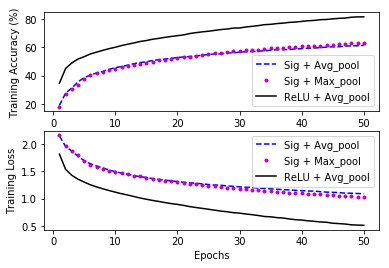

In [12]:
fig = plt.figure()
plt.subplot(211)
plt.plot(range(start_epoch,num_epochs+1), acc_log1, '--b', label='Sig + Avg_pool')
plt.plot(range(start_epoch,num_epochs+1), acc_log2, '.m', label='Sig + Max_pool')
plt.plot(range(start_epoch,num_epochs+1), acc_log3, 'k', label='ReLU + Avg_pool')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy (%)')
legend = plt.legend()

plt.subplot(212)
plt.plot(range(start_epoch,num_epochs+1), loss_log1, '--b', label='Sig + Avg_pool')
plt.plot(range(start_epoch,num_epochs+1), loss_log2, '.m', label='Sig + Max_pool')
plt.plot(range(start_epoch,num_epochs+1), loss_log3, 'k', label='ReLU + Avg_pool')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
legend = plt.legend()

<font color=blue>**Which network converges faster? and why in you opinion?**</font>

## Data Augmentation

Check torchvision.transforms documentation to see how to perform RandomCrop (to size of 32 x 32 nad padding of 4 pixels) and Random horizontal flip on the input. 
http://pytorch.org/docs/master/torchvision/transforms.html

Add these two transformations instead of the brackets [ ] below

In [13]:
# Image transformations to apply to all images in the dataset (Data Augmentation)
transform_train = transforms.Compose([
    transforms.RandomCrop(32,4), # Crop all the images randomly to a fixed size
    transforms.RandomHorizontalFlip(),    # Randomly flip some of the images horizontaly
    transforms.ToTensor(),                # Convert images to Tensors (The data structure that is used by Pytorch)
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)), # Normalize the images to zero mean
])

# Specify the path to the CIFAR-10 dataset and create a dataloader where you specify the "batch_size"
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)

Files already downloaded and verified


Don't forget to replace the brackets [ ] with the relu activation

In [14]:
# Load and initialize the network architecture 
model4 = LeNet(activation=F.relu, pooling=F.avg_pool2d, pretrained=False)

if use_cuda:
    model4.cuda()

optimizer = optim.Adam(model4.parameters()) 


model4, loss_log4, acc_log4 = train(model4, trainloader, optimizer, objective, use_cuda, start_epoch, num_epochs=50)


Epoch: 1
Loss: 2.30109859 | Acc: 12.89% (33/256)
Loss: 2.30100417 | Acc: 10.55% (54/512)
Loss: 2.30186613 | Acc: 9.77% (75/768)
Loss: 2.30042756 | Acc: 9.86% (101/1024)
Loss: 2.29964862 | Acc: 9.84% (126/1280)
Loss: 2.29688052 | Acc: 10.55% (162/1536)
Loss: 2.29530958 | Acc: 11.38% (204/1792)
Loss: 2.29226834 | Acc: 11.82% (242/2048)
Loss: 2.28838926 | Acc: 12.72% (293/2304)
Loss: 2.28585761 | Acc: 12.81% (328/2560)
Loss: 2.28063328 | Acc: 13.46% (379/2816)
Loss: 2.27589774 | Acc: 13.67% (420/3072)
Loss: 2.27213410 | Acc: 14.15% (471/3328)
Loss: 2.26911218 | Acc: 14.37% (515/3584)
Loss: 2.26440989 | Acc: 14.90% (572/3840)
Loss: 2.25988933 | Acc: 15.38% (630/4096)
Loss: 2.25504634 | Acc: 15.79% (687/4352)
Loss: 2.25019548 | Acc: 16.21% (747/4608)
Loss: 2.24342400 | Acc: 16.65% (810/4864)
Loss: 2.23826257 | Acc: 16.99% (870/5120)
Loss: 2.23579351 | Acc: 17.13% (921/5376)
Loss: 2.22938530 | Acc: 17.42% (981/5632)
Loss: 2.22296631 | Acc: 17.80% (1048/5888)
Loss: 2.21867895 | Acc: 17.92% (

Loss: 1.89899676 | Acc: 30.46% (14892/48896)
Loss: 1.89771828 | Acc: 30.51% (14994/49152)
Loss: 1.89648179 | Acc: 30.53% (15085/49408)
Loss: 1.89555346 | Acc: 30.57% (15180/49664)
Loss: 1.89435923 | Acc: 30.61% (15281/49920)
Loss: 1.89257276 | Acc: 30.63% (15316/50000)

Epoch: 2
Loss: 1.73391688 | Acc: 32.81% (84/256)
Loss: 1.69178450 | Acc: 37.30% (191/512)
Loss: 1.67142797 | Acc: 37.76% (290/768)
Loss: 1.67106724 | Acc: 37.11% (380/1024)
Loss: 1.67909272 | Acc: 37.27% (477/1280)
Loss: 1.67870865 | Acc: 38.22% (587/1536)
Loss: 1.69030583 | Acc: 37.39% (670/1792)
Loss: 1.69084358 | Acc: 36.82% (754/2048)
Loss: 1.70559429 | Acc: 36.76% (847/2304)
Loss: 1.69801847 | Acc: 37.66% (964/2560)
Loss: 1.70327837 | Acc: 37.57% (1058/2816)
Loss: 1.70479113 | Acc: 37.17% (1142/3072)
Loss: 1.70060404 | Acc: 37.17% (1237/3328)
Loss: 1.69742602 | Acc: 37.33% (1338/3584)
Loss: 1.70433718 | Acc: 36.98% (1420/3840)
Loss: 1.70337807 | Acc: 37.01% (1516/4096)
Loss: 1.69858266 | Acc: 37.02% (1611/4352)
Los

Loss: 1.63593032 | Acc: 40.33% (19098/47360)
Loss: 1.63555207 | Acc: 40.32% (19198/47616)
Loss: 1.63536372 | Acc: 40.34% (19310/47872)
Loss: 1.63529818 | Acc: 40.34% (19417/48128)
Loss: 1.63498086 | Acc: 40.38% (19537/48384)
Loss: 1.63478724 | Acc: 40.37% (19636/48640)
Loss: 1.63429743 | Acc: 40.40% (19753/48896)
Loss: 1.63441578 | Acc: 40.42% (19866/49152)
Loss: 1.63474904 | Acc: 40.41% (19965/49408)
Loss: 1.63405112 | Acc: 40.43% (20080/49664)
Loss: 1.63384726 | Acc: 40.43% (20184/49920)
Loss: 1.63338799 | Acc: 40.44% (20218/50000)

Epoch: 3
Loss: 1.55884016 | Acc: 45.70% (117/256)
Loss: 1.55466741 | Acc: 44.73% (229/512)
Loss: 1.56792780 | Acc: 43.49% (334/768)
Loss: 1.54553148 | Acc: 44.92% (460/1024)
Loss: 1.56360695 | Acc: 44.45% (569/1280)
Loss: 1.56622972 | Acc: 44.73% (687/1536)
Loss: 1.56094137 | Acc: 45.20% (810/1792)
Loss: 1.56528693 | Acc: 44.29% (907/2048)
Loss: 1.56356011 | Acc: 44.14% (1017/2304)
Loss: 1.56127003 | Acc: 43.87% (1123/2560)
Loss: 1.55754113 | Acc: 43.75% 

Loss: 1.55969878 | Acc: 43.19% (20011/46336)
Loss: 1.55926041 | Acc: 43.19% (20125/46592)
Loss: 1.55894538 | Acc: 43.20% (20236/46848)
Loss: 1.55869382 | Acc: 43.21% (20352/47104)
Loss: 1.55906801 | Acc: 43.20% (20458/47360)
Loss: 1.55871614 | Acc: 43.22% (20579/47616)
Loss: 1.55806493 | Acc: 43.24% (20698/47872)
Loss: 1.55725434 | Acc: 43.27% (20824/48128)
Loss: 1.55716754 | Acc: 43.28% (20941/48384)
Loss: 1.55706953 | Acc: 43.28% (21053/48640)
Loss: 1.55705928 | Acc: 43.29% (21165/48896)
Loss: 1.55671955 | Acc: 43.29% (21278/49152)
Loss: 1.55654791 | Acc: 43.31% (21400/49408)
Loss: 1.55683393 | Acc: 43.29% (21502/49664)
Loss: 1.55661273 | Acc: 43.31% (21618/49920)
Loss: 1.55698612 | Acc: 43.31% (21654/50000)

Epoch: 4
Loss: 1.42564368 | Acc: 48.05% (123/256)
Loss: 1.43890756 | Acc: 49.22% (252/512)
Loss: 1.50720855 | Acc: 47.01% (361/768)
Loss: 1.50452507 | Acc: 46.58% (477/1024)
Loss: 1.50282872 | Acc: 46.48% (595/1280)
Loss: 1.48832774 | Acc: 46.68% (717/1536)
Loss: 1.49118897 | Ac

Loss: 1.49946041 | Acc: 45.66% (19872/43520)
Loss: 1.49955774 | Acc: 45.67% (19991/43776)
Loss: 1.49971393 | Acc: 45.65% (20101/44032)
Loss: 1.49980136 | Acc: 45.66% (20220/44288)
Loss: 1.50015752 | Acc: 45.63% (20326/44544)
Loss: 1.49964332 | Acc: 45.64% (20447/44800)
Loss: 1.49962957 | Acc: 45.63% (20558/45056)
Loss: 1.49927757 | Acc: 45.63% (20677/45312)
Loss: 1.49947522 | Acc: 45.63% (20792/45568)
Loss: 1.49941824 | Acc: 45.62% (20904/45824)
Loss: 1.49964489 | Acc: 45.62% (21021/46080)
Loss: 1.49997687 | Acc: 45.61% (21133/46336)
Loss: 1.49996046 | Acc: 45.63% (21260/46592)
Loss: 1.50004320 | Acc: 45.62% (21372/46848)
Loss: 1.50024457 | Acc: 45.62% (21489/47104)
Loss: 1.49992204 | Acc: 45.62% (21605/47360)
Loss: 1.49987521 | Acc: 45.60% (21714/47616)
Loss: 1.49915044 | Acc: 45.64% (21847/47872)
Loss: 1.49900061 | Acc: 45.65% (21971/48128)
Loss: 1.49948254 | Acc: 45.63% (22077/48384)
Loss: 1.49929677 | Acc: 45.65% (22203/48640)
Loss: 1.49892756 | Acc: 45.66% (22325/48896)
Loss: 1.49

Loss: 1.47138569 | Acc: 46.73% (19019/40704)
Loss: 1.47100340 | Acc: 46.75% (19147/40960)
Loss: 1.47095489 | Acc: 46.76% (19273/41216)
Loss: 1.47186325 | Acc: 46.70% (19368/41472)
Loss: 1.47127908 | Acc: 46.73% (19499/41728)
Loss: 1.47152763 | Acc: 46.70% (19608/41984)
Loss: 1.47087271 | Acc: 46.74% (19743/42240)
Loss: 1.47051477 | Acc: 46.75% (19866/42496)
Loss: 1.46997490 | Acc: 46.78% (19999/42752)
Loss: 1.47024454 | Acc: 46.77% (20114/43008)
Loss: 1.46998354 | Acc: 46.78% (20239/43264)
Loss: 1.47012418 | Acc: 46.78% (20359/43520)
Loss: 1.47027154 | Acc: 46.77% (20473/43776)
Loss: 1.46998249 | Acc: 46.78% (20596/44032)
Loss: 1.47052296 | Acc: 46.78% (20716/44288)
Loss: 1.47035902 | Acc: 46.80% (20848/44544)
Loss: 1.47102463 | Acc: 46.81% (20969/44800)
Loss: 1.47085863 | Acc: 46.81% (21089/45056)
Loss: 1.47088593 | Acc: 46.80% (21207/45312)
Loss: 1.47091142 | Acc: 46.81% (21332/45568)
Loss: 1.47092791 | Acc: 46.80% (21444/45824)
Loss: 1.47027165 | Acc: 46.82% (21574/46080)
Loss: 1.47

Loss: 1.42847985 | Acc: 48.64% (18552/38144)
Loss: 1.42820875 | Acc: 48.66% (18685/38400)
Loss: 1.42815520 | Acc: 48.65% (18808/38656)
Loss: 1.42801166 | Acc: 48.66% (18933/38912)
Loss: 1.42828860 | Acc: 48.64% (19050/39168)
Loss: 1.42763431 | Acc: 48.67% (19186/39424)
Loss: 1.42775608 | Acc: 48.64% (19301/39680)
Loss: 1.42787546 | Acc: 48.61% (19412/39936)
Loss: 1.42775832 | Acc: 48.63% (19546/40192)
Loss: 1.42742055 | Acc: 48.65% (19677/40448)
Loss: 1.42719445 | Acc: 48.67% (19809/40704)
Loss: 1.42744571 | Acc: 48.66% (19932/40960)
Loss: 1.42768923 | Acc: 48.63% (20044/41216)
Loss: 1.42822124 | Acc: 48.61% (20159/41472)
Loss: 1.42897056 | Acc: 48.58% (20270/41728)
Loss: 1.42884429 | Acc: 48.58% (20395/41984)
Loss: 1.42989922 | Acc: 48.56% (20511/42240)
Loss: 1.42974713 | Acc: 48.57% (20639/42496)
Loss: 1.42924010 | Acc: 48.60% (20778/42752)
Loss: 1.42884079 | Acc: 48.60% (20903/43008)
Loss: 1.42851530 | Acc: 48.63% (21039/43264)
Loss: 1.42825739 | Acc: 48.65% (21173/43520)
Loss: 1.42

Loss: 1.39900857 | Acc: 49.46% (17600/35584)
Loss: 1.39892799 | Acc: 49.47% (17730/35840)
Loss: 1.39891342 | Acc: 49.49% (17865/36096)
Loss: 1.39847591 | Acc: 49.51% (17997/36352)
Loss: 1.39958087 | Acc: 49.48% (18114/36608)
Loss: 1.39971497 | Acc: 49.44% (18226/36864)
Loss: 1.39873295 | Acc: 49.47% (18363/37120)
Loss: 1.39828950 | Acc: 49.49% (18499/37376)
Loss: 1.39814354 | Acc: 49.50% (18628/37632)
Loss: 1.39795921 | Acc: 49.51% (18757/37888)
Loss: 1.39830361 | Acc: 49.49% (18877/38144)
Loss: 1.39800597 | Acc: 49.51% (19012/38400)
Loss: 1.39835243 | Acc: 49.51% (19140/38656)
Loss: 1.39854823 | Acc: 49.50% (19262/38912)
Loss: 1.39844639 | Acc: 49.49% (19384/39168)
Loss: 1.39914123 | Acc: 49.46% (19499/39424)
Loss: 1.39888543 | Acc: 49.47% (19630/39680)
Loss: 1.39883353 | Acc: 49.50% (19768/39936)
Loss: 1.39894135 | Acc: 49.50% (19895/40192)
Loss: 1.39891343 | Acc: 49.47% (20011/40448)
Loss: 1.39943068 | Acc: 49.46% (20134/40704)
Loss: 1.39911158 | Acc: 49.44% (20249/40960)
Loss: 1.39

Loss: 1.36195404 | Acc: 50.90% (16809/33024)
Loss: 1.36191036 | Acc: 50.90% (16940/33280)
Loss: 1.36289533 | Acc: 50.88% (17064/33536)
Loss: 1.36238144 | Acc: 50.87% (17191/33792)
Loss: 1.36163993 | Acc: 50.91% (17333/34048)
Loss: 1.36119516 | Acc: 50.91% (17463/34304)
Loss: 1.36075442 | Acc: 50.92% (17597/34560)
Loss: 1.36053631 | Acc: 50.92% (17729/34816)
Loss: 1.36097628 | Acc: 50.90% (17851/35072)
Loss: 1.36035522 | Acc: 50.93% (17991/35328)
Loss: 1.36051548 | Acc: 50.92% (18121/35584)
Loss: 1.36050108 | Acc: 50.93% (18252/35840)
Loss: 1.36118976 | Acc: 50.91% (18378/36096)
Loss: 1.36117424 | Acc: 50.93% (18514/36352)
Loss: 1.36144745 | Acc: 50.91% (18638/36608)
Loss: 1.36095524 | Acc: 50.92% (18771/36864)
Loss: 1.36105815 | Acc: 50.92% (18903/37120)
Loss: 1.36176533 | Acc: 50.90% (19023/37376)
Loss: 1.36097261 | Acc: 50.93% (19166/37632)
Loss: 1.36129280 | Acc: 50.92% (19291/37888)
Loss: 1.36093384 | Acc: 50.92% (19424/38144)
Loss: 1.36133469 | Acc: 50.90% (19547/38400)
Loss: 1.36

Loss: 1.34459680 | Acc: 51.54% (16493/32000)
Loss: 1.34411158 | Acc: 51.57% (16634/32256)
Loss: 1.34345337 | Acc: 51.62% (16782/32512)
Loss: 1.34307484 | Acc: 51.64% (16920/32768)
Loss: 1.34172699 | Acc: 51.71% (17076/33024)
Loss: 1.34110555 | Acc: 51.75% (17224/33280)
Loss: 1.34116325 | Acc: 51.75% (17355/33536)
Loss: 1.34048118 | Acc: 51.76% (17492/33792)
Loss: 1.34055256 | Acc: 51.79% (17634/34048)
Loss: 1.34131525 | Acc: 51.79% (17765/34304)
Loss: 1.34149856 | Acc: 51.78% (17895/34560)
Loss: 1.34155876 | Acc: 51.80% (18035/34816)
Loss: 1.34207547 | Acc: 51.78% (18161/35072)
Loss: 1.34219118 | Acc: 51.80% (18301/35328)
Loss: 1.34292713 | Acc: 51.80% (18432/35584)
Loss: 1.34285630 | Acc: 51.80% (18565/35840)
Loss: 1.34228855 | Acc: 51.80% (18699/36096)
Loss: 1.34266037 | Acc: 51.79% (18828/36352)
Loss: 1.34341080 | Acc: 51.77% (18952/36608)
Loss: 1.34335627 | Acc: 51.77% (19085/36864)
Loss: 1.34364432 | Acc: 51.76% (19215/37120)
Loss: 1.34351069 | Acc: 51.78% (19352/37376)
Loss: 1.34

Loss: 1.33756506 | Acc: 51.90% (15545/29952)
Loss: 1.33692341 | Acc: 51.92% (15683/30208)
Loss: 1.33828004 | Acc: 51.88% (15804/30464)
Loss: 1.33810489 | Acc: 51.89% (15942/30720)
Loss: 1.33795711 | Acc: 51.87% (16068/30976)
Loss: 1.33775719 | Acc: 51.89% (16205/31232)
Loss: 1.33835392 | Acc: 51.87% (16332/31488)
Loss: 1.33758960 | Acc: 51.88% (16468/31744)
Loss: 1.33675342 | Acc: 51.92% (16613/32000)
Loss: 1.33620564 | Acc: 51.93% (16750/32256)
Loss: 1.33615260 | Acc: 51.96% (16894/32512)
Loss: 1.33517792 | Acc: 51.98% (17034/32768)
Loss: 1.33521601 | Acc: 51.99% (17169/33024)
Loss: 1.33520110 | Acc: 52.00% (17306/33280)
Loss: 1.33483989 | Acc: 52.04% (17452/33536)
Loss: 1.33486686 | Acc: 52.04% (17586/33792)
Loss: 1.33420321 | Acc: 52.10% (17738/34048)
Loss: 1.33412373 | Acc: 52.11% (17876/34304)
Loss: 1.33317769 | Acc: 52.15% (18023/34560)
Loss: 1.33293465 | Acc: 52.16% (18160/34816)
Loss: 1.33265481 | Acc: 52.17% (18297/35072)
Loss: 1.33289941 | Acc: 52.17% (18429/35328)
Loss: 1.33

Loss: 1.30458479 | Acc: 53.12% (15367/28928)
Loss: 1.30428466 | Acc: 53.11% (15501/29184)
Loss: 1.30447697 | Acc: 53.11% (15635/29440)
Loss: 1.30462867 | Acc: 53.07% (15760/29696)
Loss: 1.30444262 | Acc: 53.08% (15900/29952)
Loss: 1.30579998 | Acc: 53.07% (16031/30208)
Loss: 1.30612769 | Acc: 53.05% (16161/30464)
Loss: 1.30627600 | Acc: 53.02% (16288/30720)
Loss: 1.30582805 | Acc: 53.02% (16424/30976)
Loss: 1.30629977 | Acc: 53.02% (16560/31232)
Loss: 1.30630630 | Acc: 53.04% (16701/31488)
Loss: 1.30648218 | Acc: 53.05% (16839/31744)
Loss: 1.30626655 | Acc: 53.08% (16986/32000)
Loss: 1.30742820 | Acc: 53.05% (17113/32256)
Loss: 1.30759247 | Acc: 53.01% (17233/32512)
Loss: 1.30749325 | Acc: 53.02% (17375/32768)
Loss: 1.30703383 | Acc: 53.03% (17514/33024)
Loss: 1.30704152 | Acc: 53.03% (17650/33280)
Loss: 1.30704100 | Acc: 53.02% (17781/33536)
Loss: 1.30588388 | Acc: 53.05% (17925/33792)
Loss: 1.30648126 | Acc: 52.99% (18041/34048)
Loss: 1.30727106 | Acc: 52.98% (18173/34304)
Loss: 1.30

Loss: 1.28302868 | Acc: 53.86% (14616/27136)
Loss: 1.28253039 | Acc: 53.87% (14755/27392)
Loss: 1.28193380 | Acc: 53.88% (14897/27648)
Loss: 1.28298348 | Acc: 53.87% (15032/27904)
Loss: 1.28254961 | Acc: 53.90% (15179/28160)
Loss: 1.28165517 | Acc: 53.92% (15321/28416)
Loss: 1.28141668 | Acc: 53.92% (15461/28672)
Loss: 1.28170258 | Acc: 53.93% (15600/28928)
Loss: 1.28162078 | Acc: 53.93% (15740/29184)
Loss: 1.28160916 | Acc: 53.92% (15873/29440)
Loss: 1.28128465 | Acc: 53.93% (16014/29696)
Loss: 1.28195044 | Acc: 53.92% (16150/29952)
Loss: 1.28162339 | Acc: 53.93% (16291/30208)
Loss: 1.28056592 | Acc: 53.98% (16444/30464)
Loss: 1.28079175 | Acc: 53.95% (16572/30720)
Loss: 1.28050721 | Acc: 53.94% (16710/30976)
Loss: 1.28019777 | Acc: 53.96% (16854/31232)
Loss: 1.28137471 | Acc: 53.93% (16980/31488)
Loss: 1.28145319 | Acc: 53.93% (17118/31744)
Loss: 1.28105623 | Acc: 53.95% (17263/32000)
Loss: 1.28099970 | Acc: 53.98% (17411/32256)
Loss: 1.28213248 | Acc: 53.93% (17534/32512)
Loss: 1.28

Loss: 1.27197713 | Acc: 54.02% (13275/24576)
Loss: 1.27205475 | Acc: 54.01% (13412/24832)
Loss: 1.27226736 | Acc: 54.02% (13552/25088)
Loss: 1.27250029 | Acc: 54.04% (13697/25344)
Loss: 1.27261986 | Acc: 54.01% (13826/25600)
Loss: 1.27147004 | Acc: 54.05% (13976/25856)
Loss: 1.27190395 | Acc: 54.04% (14110/26112)
Loss: 1.27126694 | Acc: 54.05% (14253/26368)
Loss: 1.27121548 | Acc: 54.06% (14392/26624)
Loss: 1.26996285 | Acc: 54.12% (14548/26880)
Loss: 1.26982291 | Acc: 54.12% (14685/27136)
Loss: 1.27040037 | Acc: 54.11% (14823/27392)
Loss: 1.26980885 | Acc: 54.09% (14956/27648)
Loss: 1.26967195 | Acc: 54.09% (15093/27904)
Loss: 1.27042091 | Acc: 54.04% (15217/28160)
Loss: 1.27136883 | Acc: 54.05% (15360/28416)
Loss: 1.27012176 | Acc: 54.08% (15505/28672)
Loss: 1.26953548 | Acc: 54.10% (15651/28928)
Loss: 1.26883190 | Acc: 54.10% (15788/29184)
Loss: 1.26839708 | Acc: 54.13% (15935/29440)
Loss: 1.26864887 | Acc: 54.13% (16074/29696)
Loss: 1.26977365 | Acc: 54.11% (16208/29952)
Loss: 1.26

Loss: 1.25811249 | Acc: 54.89% (11944/21760)
Loss: 1.25941634 | Acc: 54.86% (12079/22016)
Loss: 1.25836294 | Acc: 54.93% (12235/22272)
Loss: 1.25989920 | Acc: 54.93% (12374/22528)
Loss: 1.25888909 | Acc: 55.00% (12532/22784)
Loss: 1.26103119 | Acc: 54.93% (12655/23040)
Loss: 1.26244193 | Acc: 54.85% (12779/23296)
Loss: 1.26060918 | Acc: 54.89% (12927/23552)
Loss: 1.25987423 | Acc: 54.91% (13072/23808)
Loss: 1.26050931 | Acc: 54.90% (13210/24064)
Loss: 1.25961844 | Acc: 54.95% (13364/24320)
Loss: 1.25984502 | Acc: 54.94% (13503/24576)
Loss: 1.26104946 | Acc: 54.85% (13621/24832)
Loss: 1.26106550 | Acc: 54.89% (13770/25088)
Loss: 1.26082706 | Acc: 54.87% (13907/25344)
Loss: 1.26029749 | Acc: 54.88% (14049/25600)
Loss: 1.25920172 | Acc: 54.92% (14200/25856)
Loss: 1.25999252 | Acc: 54.87% (14327/26112)
Loss: 1.26105774 | Acc: 54.86% (14465/26368)
Loss: 1.26111813 | Acc: 54.85% (14603/26624)
Loss: 1.26111470 | Acc: 54.83% (14738/26880)
Loss: 1.25990927 | Acc: 54.89% (14894/27136)
Loss: 1.25

Loss: 1.24243387 | Acc: 56.27% (10948/19456)
Loss: 1.24290501 | Acc: 56.23% (11085/19712)
Loss: 1.24328609 | Acc: 56.20% (11222/19968)
Loss: 1.24323939 | Acc: 56.21% (11368/20224)
Loss: 1.24335888 | Acc: 56.24% (11518/20480)
Loss: 1.24343795 | Acc: 56.23% (11660/20736)
Loss: 1.24291680 | Acc: 56.28% (11814/20992)
Loss: 1.24118517 | Acc: 56.33% (11968/21248)
Loss: 1.24134896 | Acc: 56.30% (12106/21504)
Loss: 1.24109444 | Acc: 56.31% (12254/21760)
Loss: 1.24046690 | Acc: 56.33% (12401/22016)
Loss: 1.24020001 | Acc: 56.30% (12539/22272)
Loss: 1.23914075 | Acc: 56.33% (12689/22528)
Loss: 1.23939200 | Acc: 56.32% (12833/22784)
Loss: 1.23952597 | Acc: 56.27% (12965/23040)
Loss: 1.23870340 | Acc: 56.30% (13115/23296)
Loss: 1.23878949 | Acc: 56.31% (13261/23552)
Loss: 1.23925531 | Acc: 56.29% (13402/23808)
Loss: 1.23952601 | Acc: 56.26% (13539/24064)
Loss: 1.23849522 | Acc: 56.30% (13693/24320)
Loss: 1.23780691 | Acc: 56.32% (13841/24576)
Loss: 1.23834824 | Acc: 56.35% (13992/24832)
Loss: 1.23

Loss: 1.21837008 | Acc: 56.57% (9413/16640)
Loss: 1.21825238 | Acc: 56.61% (9564/16896)
Loss: 1.21827705 | Acc: 56.61% (9709/17152)
Loss: 1.21995865 | Acc: 56.53% (9840/17408)
Loss: 1.21745501 | Acc: 56.58% (9995/17664)
Loss: 1.21761342 | Acc: 56.61% (10144/17920)
Loss: 1.21646584 | Acc: 56.65% (10297/18176)
Loss: 1.21801953 | Acc: 56.58% (10429/18432)
Loss: 1.21820132 | Acc: 56.57% (10571/18688)
Loss: 1.21755491 | Acc: 56.60% (10723/18944)
Loss: 1.21668739 | Acc: 56.65% (10876/19200)
Loss: 1.21737107 | Acc: 56.58% (11008/19456)
Loss: 1.21753166 | Acc: 56.59% (11155/19712)
Loss: 1.21823488 | Acc: 56.57% (11296/19968)
Loss: 1.21872918 | Acc: 56.54% (11435/20224)
Loss: 1.21833004 | Acc: 56.53% (11577/20480)
Loss: 1.21776428 | Acc: 56.55% (11727/20736)
Loss: 1.21714351 | Acc: 56.58% (11878/20992)
Loss: 1.21634002 | Acc: 56.63% (12033/21248)
Loss: 1.21553884 | Acc: 56.65% (12183/21504)
Loss: 1.21500574 | Acc: 56.69% (12336/21760)
Loss: 1.21423188 | Acc: 56.72% (12487/22016)
Loss: 1.2144807

Loss: 1.21847503 | Acc: 56.63% (7973/14080)
Loss: 1.21747984 | Acc: 56.59% (8113/14336)
Loss: 1.21690843 | Acc: 56.59% (8257/14592)
Loss: 1.21618364 | Acc: 56.61% (8406/14848)
Loss: 1.21479496 | Acc: 56.66% (8558/15104)
Loss: 1.21395374 | Acc: 56.73% (8714/15360)
Loss: 1.21601283 | Acc: 56.67% (8849/15616)
Loss: 1.21803911 | Acc: 56.61% (8985/15872)
Loss: 1.21818324 | Acc: 56.63% (9133/16128)
Loss: 1.21723714 | Acc: 56.62% (9277/16384)
Loss: 1.21722423 | Acc: 56.63% (9423/16640)
Loss: 1.21524898 | Acc: 56.69% (9579/16896)
Loss: 1.21552563 | Acc: 56.65% (9717/17152)
Loss: 1.21526202 | Acc: 56.68% (9867/17408)
Loss: 1.21490422 | Acc: 56.68% (10012/17664)
Loss: 1.21620128 | Acc: 56.66% (10153/17920)
Loss: 1.21641601 | Acc: 56.66% (10298/18176)
Loss: 1.21654399 | Acc: 56.66% (10443/18432)
Loss: 1.21540219 | Acc: 56.67% (10591/18688)
Loss: 1.21474680 | Acc: 56.67% (10736/18944)
Loss: 1.21303195 | Acc: 56.73% (10892/19200)
Loss: 1.21194868 | Acc: 56.77% (11046/19456)
Loss: 1.21141193 | Acc: 

Loss: 1.16760054 | Acc: 58.34% (6721/11520)
Loss: 1.16603919 | Acc: 58.34% (6870/11776)
Loss: 1.16692111 | Acc: 58.29% (7014/12032)
Loss: 1.16686315 | Acc: 58.22% (7154/12288)
Loss: 1.16707577 | Acc: 58.26% (7308/12544)
Loss: 1.16687902 | Acc: 58.20% (7449/12800)
Loss: 1.16913799 | Acc: 58.16% (7593/13056)
Loss: 1.16998001 | Acc: 58.14% (7740/13312)
Loss: 1.16880292 | Acc: 58.20% (7897/13568)
Loss: 1.16898011 | Acc: 58.19% (8044/13824)
Loss: 1.16928934 | Acc: 58.15% (8187/14080)
Loss: 1.16848854 | Acc: 58.21% (8345/14336)
Loss: 1.16992274 | Acc: 58.15% (8485/14592)
Loss: 1.17071968 | Acc: 58.12% (8629/14848)
Loss: 1.17292228 | Acc: 58.10% (8775/15104)
Loss: 1.17392286 | Acc: 58.09% (8922/15360)
Loss: 1.17104583 | Acc: 58.17% (9084/15616)
Loss: 1.17201045 | Acc: 58.12% (9225/15872)
Loss: 1.17367858 | Acc: 58.09% (9368/16128)
Loss: 1.17433239 | Acc: 58.06% (9513/16384)
Loss: 1.17552150 | Acc: 58.00% (9652/16640)
Loss: 1.17661070 | Acc: 57.92% (9786/16896)
Loss: 1.17602690 | Acc: 57.98% (

Loss: 1.17267868 | Acc: 58.07% (5500/9472)
Loss: 1.17460780 | Acc: 58.05% (5647/9728)
Loss: 1.17643264 | Acc: 58.03% (5794/9984)
Loss: 1.17687159 | Acc: 58.03% (5942/10240)
Loss: 1.17668540 | Acc: 58.03% (6091/10496)
Loss: 1.17711903 | Acc: 57.99% (6235/10752)
Loss: 1.17677924 | Acc: 57.97% (6381/11008)
Loss: 1.17528304 | Acc: 58.02% (6535/11264)
Loss: 1.17649852 | Acc: 57.94% (6675/11520)
Loss: 1.17333155 | Acc: 58.08% (6839/11776)
Loss: 1.17334212 | Acc: 58.04% (6983/12032)
Loss: 1.17389480 | Acc: 58.02% (7129/12288)
Loss: 1.17587822 | Acc: 57.96% (7270/12544)
Loss: 1.17561522 | Acc: 57.88% (7408/12800)
Loss: 1.17596488 | Acc: 57.90% (7560/13056)
Loss: 1.17604371 | Acc: 57.90% (7708/13312)
Loss: 1.17410723 | Acc: 58.01% (7871/13568)
Loss: 1.17497791 | Acc: 58.03% (8022/13824)
Loss: 1.17457841 | Acc: 58.03% (8171/14080)
Loss: 1.17541433 | Acc: 58.06% (8324/14336)
Loss: 1.17480164 | Acc: 58.05% (8470/14592)
Loss: 1.17373990 | Acc: 58.08% (8623/14848)
Loss: 1.17418329 | Acc: 58.02% (876

Loss: 1.14805417 | Acc: 59.24% (4701/7936)
Loss: 1.14735467 | Acc: 59.18% (4848/8192)
Loss: 1.14901915 | Acc: 59.16% (4998/8448)
Loss: 1.14754290 | Acc: 59.29% (5161/8704)
Loss: 1.14724146 | Acc: 59.24% (5308/8960)
Loss: 1.14979060 | Acc: 59.14% (5450/9216)
Loss: 1.14850210 | Acc: 59.13% (5601/9472)
Loss: 1.14750020 | Acc: 59.26% (5765/9728)
Loss: 1.14933412 | Acc: 59.07% (5898/9984)
Loss: 1.14873124 | Acc: 59.03% (6045/10240)
Loss: 1.15000515 | Acc: 58.98% (6191/10496)
Loss: 1.15144266 | Acc: 58.98% (6341/10752)
Loss: 1.14939700 | Acc: 59.05% (6500/11008)
Loss: 1.15110790 | Acc: 58.88% (6632/11264)
Loss: 1.15052191 | Acc: 58.90% (6785/11520)
Loss: 1.15071313 | Acc: 58.87% (6932/11776)
Loss: 1.15100431 | Acc: 58.88% (7084/12032)
Loss: 1.15138331 | Acc: 58.90% (7238/12288)
Loss: 1.15340081 | Acc: 58.90% (7388/12544)
Loss: 1.15177499 | Acc: 58.90% (7539/12800)
Loss: 1.15236992 | Acc: 58.86% (7685/13056)
Loss: 1.15118164 | Acc: 58.89% (7840/13312)
Loss: 1.15291759 | Acc: 58.79% (7976/1356

Loss: 1.16248577 | Acc: 58.80% (3763/6400)
Loss: 1.16445689 | Acc: 58.64% (3903/6656)
Loss: 1.16405201 | Acc: 58.54% (4046/6912)
Loss: 1.16076680 | Acc: 58.61% (4201/7168)
Loss: 1.16558930 | Acc: 58.43% (4338/7424)
Loss: 1.16812787 | Acc: 58.33% (4480/7680)
Loss: 1.16884499 | Acc: 58.24% (4622/7936)
Loss: 1.17111917 | Acc: 58.17% (4765/8192)
Loss: 1.17387261 | Acc: 58.00% (4900/8448)
Loss: 1.17026208 | Acc: 58.21% (5067/8704)
Loss: 1.16965508 | Acc: 58.26% (5220/8960)
Loss: 1.17008995 | Acc: 58.26% (5369/9216)
Loss: 1.16746660 | Acc: 58.38% (5530/9472)
Loss: 1.16684096 | Acc: 58.30% (5671/9728)
Loss: 1.16646725 | Acc: 58.35% (5826/9984)
Loss: 1.16401628 | Acc: 58.39% (5979/10240)
Loss: 1.16315555 | Acc: 58.40% (6130/10496)
Loss: 1.16556517 | Acc: 58.26% (6264/10752)
Loss: 1.16362690 | Acc: 58.34% (6422/11008)
Loss: 1.16660325 | Acc: 58.24% (6560/11264)
Loss: 1.16737534 | Acc: 58.20% (6705/11520)
Loss: 1.16680450 | Acc: 58.16% (6849/11776)
Loss: 1.16773941 | Acc: 58.06% (6986/12032)
Los

Loss: 1.12515547 | Acc: 59.13% (1968/3328)
Loss: 1.11833218 | Acc: 59.49% (2132/3584)
Loss: 1.12454421 | Acc: 59.64% (2290/3840)
Loss: 1.12379167 | Acc: 59.79% (2449/4096)
Loss: 1.11689453 | Acc: 60.20% (2620/4352)
Loss: 1.12080596 | Acc: 60.05% (2767/4608)
Loss: 1.11689140 | Acc: 60.24% (2930/4864)
Loss: 1.11732550 | Acc: 60.33% (3089/5120)
Loss: 1.11658813 | Acc: 60.23% (3238/5376)
Loss: 1.11694520 | Acc: 60.23% (3392/5632)
Loss: 1.11645041 | Acc: 60.38% (3555/5888)
Loss: 1.11787453 | Acc: 60.37% (3709/6144)
Loss: 1.11685230 | Acc: 60.42% (3867/6400)
Loss: 1.12015721 | Acc: 60.49% (4026/6656)
Loss: 1.12216048 | Acc: 60.27% (4166/6912)
Loss: 1.12536503 | Acc: 60.13% (4310/7168)
Loss: 1.12640024 | Acc: 60.16% (4466/7424)
Loss: 1.12179873 | Acc: 60.29% (4630/7680)
Loss: 1.11951868 | Acc: 60.18% (4776/7936)
Loss: 1.12119213 | Acc: 60.21% (4932/8192)
Loss: 1.12250095 | Acc: 60.20% (5086/8448)
Loss: 1.12425468 | Acc: 60.09% (5230/8704)
Loss: 1.12828691 | Acc: 59.83% (5361/8960)
Loss: 1.128

Loss: 1.14503455 | Acc: 60.94% (156/256)
Loss: 1.06928328 | Acc: 62.89% (322/512)
Loss: 1.10543146 | Acc: 61.33% (471/768)
Loss: 1.10754941 | Acc: 61.62% (631/1024)
Loss: 1.12011901 | Acc: 61.17% (783/1280)
Loss: 1.10883742 | Acc: 61.65% (947/1536)
Loss: 1.12265680 | Acc: 60.77% (1089/1792)
Loss: 1.10893825 | Acc: 60.99% (1249/2048)
Loss: 1.11751818 | Acc: 60.42% (1392/2304)
Loss: 1.12811111 | Acc: 60.08% (1538/2560)
Loss: 1.13333400 | Acc: 60.23% (1696/2816)
Loss: 1.13321181 | Acc: 60.22% (1850/3072)
Loss: 1.12787227 | Acc: 60.28% (2006/3328)
Loss: 1.12684700 | Acc: 60.52% (2169/3584)
Loss: 1.12342846 | Acc: 60.68% (2330/3840)
Loss: 1.12240852 | Acc: 60.84% (2492/4096)
Loss: 1.11921621 | Acc: 60.82% (2647/4352)
Loss: 1.11487609 | Acc: 60.94% (2808/4608)
Loss: 1.11440075 | Acc: 61.02% (2968/4864)
Loss: 1.11623285 | Acc: 60.82% (3114/5120)
Loss: 1.11472843 | Acc: 60.84% (3271/5376)
Loss: 1.11305640 | Acc: 60.78% (3423/5632)
Loss: 1.12038337 | Acc: 60.55% (3565/5888)
Loss: 1.12102002 | A

Loss: 1.12205890 | Acc: 60.48% (29572/48896)
Loss: 1.12172891 | Acc: 60.49% (29732/49152)
Loss: 1.12222365 | Acc: 60.46% (29871/49408)
Loss: 1.12198956 | Acc: 60.46% (30026/49664)
Loss: 1.12214811 | Acc: 60.46% (30181/49920)
Loss: 1.12132057 | Acc: 60.47% (30234/50000)

Epoch: 24
Loss: 0.98264933 | Acc: 68.75% (176/256)
Loss: 1.02214658 | Acc: 66.21% (339/512)
Loss: 1.05186884 | Acc: 63.80% (490/768)
Loss: 1.03709047 | Acc: 63.77% (653/1024)
Loss: 1.04132830 | Acc: 62.89% (805/1280)
Loss: 1.04729989 | Acc: 62.43% (959/1536)
Loss: 1.05718612 | Acc: 62.00% (1111/1792)
Loss: 1.05926528 | Acc: 62.06% (1271/2048)
Loss: 1.06433950 | Acc: 61.89% (1426/2304)
Loss: 1.08140085 | Acc: 61.21% (1567/2560)
Loss: 1.09316978 | Acc: 60.87% (1714/2816)
Loss: 1.08688411 | Acc: 61.17% (1879/3072)
Loss: 1.09428279 | Acc: 61.00% (2030/3328)
Loss: 1.09367660 | Acc: 60.99% (2186/3584)
Loss: 1.08970820 | Acc: 61.04% (2344/3840)
Loss: 1.09169390 | Acc: 61.18% (2506/4096)
Loss: 1.09073813 | Acc: 61.47% (2675/435

Loss: 1.10827534 | Acc: 60.69% (28743/47360)
Loss: 1.10790951 | Acc: 60.70% (28904/47616)
Loss: 1.10790260 | Acc: 60.70% (29056/47872)
Loss: 1.10801379 | Acc: 60.68% (29203/48128)
Loss: 1.10827881 | Acc: 60.66% (29349/48384)
Loss: 1.10841586 | Acc: 60.65% (29499/48640)
Loss: 1.10882474 | Acc: 60.63% (29648/48896)
Loss: 1.10883174 | Acc: 60.62% (29797/49152)
Loss: 1.10849085 | Acc: 60.62% (29953/49408)
Loss: 1.10834317 | Acc: 60.63% (30111/49664)
Loss: 1.10873532 | Acc: 60.62% (30264/49920)
Loss: 1.10933206 | Acc: 60.61% (30306/50000)

Epoch: 25
Loss: 1.10489678 | Acc: 59.38% (152/256)
Loss: 1.09248149 | Acc: 60.94% (312/512)
Loss: 1.04113907 | Acc: 62.76% (482/768)
Loss: 1.06226294 | Acc: 62.30% (638/1024)
Loss: 1.05922219 | Acc: 62.58% (801/1280)
Loss: 1.08613434 | Acc: 61.78% (949/1536)
Loss: 1.09141073 | Acc: 61.61% (1104/1792)
Loss: 1.08436764 | Acc: 61.23% (1254/2048)
Loss: 1.10504401 | Acc: 60.37% (1391/2304)
Loss: 1.11341640 | Acc: 60.43% (1547/2560)
Loss: 1.11713143 | Acc: 60.1

Loss: 1.11313819 | Acc: 60.70% (27038/44544)
Loss: 1.11317428 | Acc: 60.70% (27195/44800)
Loss: 1.11328173 | Acc: 60.72% (27357/45056)
Loss: 1.11354898 | Acc: 60.71% (27507/45312)
Loss: 1.11327934 | Acc: 60.72% (27668/45568)
Loss: 1.11345261 | Acc: 60.71% (27821/45824)
Loss: 1.11350481 | Acc: 60.71% (27976/46080)
Loss: 1.11369766 | Acc: 60.70% (28126/46336)
Loss: 1.11420710 | Acc: 60.69% (28279/46592)
Loss: 1.11386998 | Acc: 60.68% (28428/46848)
Loss: 1.11397581 | Acc: 60.68% (28584/47104)
Loss: 1.11361544 | Acc: 60.70% (28747/47360)
Loss: 1.11363109 | Acc: 60.70% (28901/47616)
Loss: 1.11392431 | Acc: 60.69% (29052/47872)
Loss: 1.11351485 | Acc: 60.69% (29211/48128)
Loss: 1.11354859 | Acc: 60.69% (29362/48384)
Loss: 1.11339910 | Acc: 60.69% (29518/48640)
Loss: 1.11331404 | Acc: 60.68% (29670/48896)
Loss: 1.11363895 | Acc: 60.65% (29813/49152)
Loss: 1.11411829 | Acc: 60.63% (29955/49408)
Loss: 1.11385500 | Acc: 60.65% (30119/49664)
Loss: 1.11373750 | Acc: 60.65% (30277/49920)
Loss: 1.11

Loss: 1.09837113 | Acc: 61.18% (26468/43264)
Loss: 1.09771602 | Acc: 61.21% (26638/43520)
Loss: 1.09827354 | Acc: 61.20% (26790/43776)
Loss: 1.09825200 | Acc: 61.21% (26951/44032)
Loss: 1.09873395 | Acc: 61.20% (27103/44288)
Loss: 1.09855280 | Acc: 61.20% (27260/44544)
Loss: 1.09725694 | Acc: 61.24% (27436/44800)
Loss: 1.09782820 | Acc: 61.22% (27584/45056)
Loss: 1.09752511 | Acc: 61.24% (27751/45312)
Loss: 1.09713869 | Acc: 61.25% (27911/45568)
Loss: 1.09816518 | Acc: 61.22% (28053/45824)
Loss: 1.09820521 | Acc: 61.22% (28208/46080)
Loss: 1.09845114 | Acc: 61.22% (28365/46336)
Loss: 1.09793236 | Acc: 61.23% (28527/46592)
Loss: 1.09828287 | Acc: 61.22% (28681/46848)
Loss: 1.09855982 | Acc: 61.22% (28839/47104)
Loss: 1.09826159 | Acc: 61.23% (29000/47360)
Loss: 1.09823588 | Acc: 61.22% (29151/47616)
Loss: 1.09898012 | Acc: 61.19% (29291/47872)
Loss: 1.09902372 | Acc: 61.17% (29438/48128)
Loss: 1.09924713 | Acc: 61.17% (29596/48384)
Loss: 1.09908728 | Acc: 61.19% (29761/48640)
Loss: 1.09

Loss: 1.08986537 | Acc: 61.46% (25172/40960)
Loss: 1.08938936 | Acc: 61.47% (25337/41216)
Loss: 1.08882972 | Acc: 61.48% (25497/41472)
Loss: 1.08891516 | Acc: 61.47% (25652/41728)
Loss: 1.08852156 | Acc: 61.49% (25815/41984)
Loss: 1.08811306 | Acc: 61.53% (25989/42240)
Loss: 1.08788264 | Acc: 61.54% (26152/42496)
Loss: 1.08835138 | Acc: 61.53% (26304/42752)
Loss: 1.08810906 | Acc: 61.53% (26463/43008)
Loss: 1.08815234 | Acc: 61.53% (26620/43264)
Loss: 1.08788554 | Acc: 61.52% (26775/43520)
Loss: 1.08822744 | Acc: 61.51% (26927/43776)
Loss: 1.08861843 | Acc: 61.51% (27086/44032)
Loss: 1.08896301 | Acc: 61.50% (27237/44288)
Loss: 1.08902402 | Acc: 61.48% (27387/44544)
Loss: 1.08836711 | Acc: 61.54% (27571/44800)
Loss: 1.08849778 | Acc: 61.55% (27732/45056)
Loss: 1.08871807 | Acc: 61.53% (27880/45312)
Loss: 1.08871537 | Acc: 61.53% (28040/45568)
Loss: 1.08844492 | Acc: 61.52% (28191/45824)
Loss: 1.08844017 | Acc: 61.51% (28344/46080)
Loss: 1.08863544 | Acc: 61.49% (28494/46336)
Loss: 1.08

Loss: 1.07647630 | Acc: 61.98% (24275/39168)
Loss: 1.07690187 | Acc: 61.96% (24429/39424)
Loss: 1.07733772 | Acc: 61.94% (24578/39680)
Loss: 1.07718159 | Acc: 61.95% (24739/39936)
Loss: 1.07707815 | Acc: 61.97% (24906/40192)
Loss: 1.07708957 | Acc: 61.97% (25064/40448)
Loss: 1.07708314 | Acc: 61.96% (25220/40704)
Loss: 1.07770687 | Acc: 61.94% (25369/40960)
Loss: 1.07733025 | Acc: 61.95% (25532/41216)
Loss: 1.07724986 | Acc: 61.95% (25690/41472)
Loss: 1.07767819 | Acc: 61.94% (25846/41728)
Loss: 1.07739099 | Acc: 61.97% (26017/41984)
Loss: 1.07868633 | Acc: 61.94% (26165/42240)
Loss: 1.07929900 | Acc: 61.95% (26327/42496)
Loss: 1.07904829 | Acc: 61.95% (26487/42752)
Loss: 1.07853452 | Acc: 61.97% (26651/43008)
Loss: 1.07876772 | Acc: 61.95% (26802/43264)
Loss: 1.07905060 | Acc: 61.96% (26964/43520)
Loss: 1.07900065 | Acc: 61.95% (27121/43776)
Loss: 1.07884591 | Acc: 61.97% (27287/44032)
Loss: 1.07887538 | Acc: 61.96% (27442/44288)
Loss: 1.07873499 | Acc: 61.95% (27596/44544)
Loss: 1.07

Loss: 1.07478271 | Acc: 62.05% (23352/37632)
Loss: 1.07463046 | Acc: 62.05% (23508/37888)
Loss: 1.07463992 | Acc: 62.05% (23669/38144)
Loss: 1.07444658 | Acc: 62.07% (23833/38400)
Loss: 1.07475266 | Acc: 62.04% (23982/38656)
Loss: 1.07422945 | Acc: 62.07% (24153/38912)
Loss: 1.07313244 | Acc: 62.09% (24321/39168)
Loss: 1.07401222 | Acc: 62.06% (24468/39424)
Loss: 1.07467881 | Acc: 62.03% (24615/39680)
Loss: 1.07420368 | Acc: 62.06% (24784/39936)
Loss: 1.07363940 | Acc: 62.08% (24951/40192)
Loss: 1.07410595 | Acc: 62.03% (25091/40448)
Loss: 1.07329379 | Acc: 62.06% (25261/40704)
Loss: 1.07290410 | Acc: 62.06% (25420/40960)
Loss: 1.07276706 | Acc: 62.06% (25579/41216)
Loss: 1.07267511 | Acc: 62.05% (25735/41472)
Loss: 1.07212794 | Acc: 62.08% (25904/41728)
Loss: 1.07158351 | Acc: 62.09% (26069/41984)
Loss: 1.07139824 | Acc: 62.11% (26236/42240)
Loss: 1.07196865 | Acc: 62.11% (26394/42496)
Loss: 1.07154698 | Acc: 62.13% (26562/42752)
Loss: 1.07166882 | Acc: 62.14% (26724/43008)
Loss: 1.07

Loss: 1.06288695 | Acc: 62.57% (22103/35328)
Loss: 1.06308599 | Acc: 62.60% (22274/35584)
Loss: 1.06293340 | Acc: 62.60% (22437/35840)
Loss: 1.06247510 | Acc: 62.62% (22604/36096)
Loss: 1.06347993 | Acc: 62.59% (22753/36352)
Loss: 1.06330520 | Acc: 62.57% (22907/36608)
Loss: 1.06284620 | Acc: 62.59% (23073/36864)
Loss: 1.06261714 | Acc: 62.62% (23244/37120)
Loss: 1.06270346 | Acc: 62.61% (23402/37376)
Loss: 1.06370987 | Acc: 62.56% (23542/37632)
Loss: 1.06425125 | Acc: 62.54% (23696/37888)
Loss: 1.06455593 | Acc: 62.51% (23844/38144)
Loss: 1.06425783 | Acc: 62.52% (24008/38400)
Loss: 1.06426874 | Acc: 62.50% (24161/38656)
Loss: 1.06439429 | Acc: 62.50% (24320/38912)
Loss: 1.06476193 | Acc: 62.49% (24475/39168)
Loss: 1.06534606 | Acc: 62.48% (24631/39424)
Loss: 1.06568360 | Acc: 62.48% (24793/39680)
Loss: 1.06581719 | Acc: 62.48% (24952/39936)
Loss: 1.06649315 | Acc: 62.44% (25096/40192)
Loss: 1.06635757 | Acc: 62.45% (25261/40448)
Loss: 1.06605545 | Acc: 62.48% (25431/40704)
Loss: 1.06

Loss: 1.05115470 | Acc: 62.93% (20782/33024)
Loss: 1.05055721 | Acc: 62.91% (20937/33280)
Loss: 1.05115296 | Acc: 62.88% (21089/33536)
Loss: 1.05055003 | Acc: 62.88% (21249/33792)
Loss: 1.05126145 | Acc: 62.84% (21396/34048)
Loss: 1.05103345 | Acc: 62.82% (21551/34304)
Loss: 1.05070790 | Acc: 62.85% (21721/34560)
Loss: 1.05043453 | Acc: 62.84% (21880/34816)
Loss: 1.05031242 | Acc: 62.86% (22046/35072)
Loss: 1.05057306 | Acc: 62.83% (22198/35328)
Loss: 1.05062657 | Acc: 62.85% (22365/35584)
Loss: 1.05033926 | Acc: 62.86% (22528/35840)
Loss: 1.05048748 | Acc: 62.86% (22689/36096)
Loss: 1.05023803 | Acc: 62.88% (22857/36352)
Loss: 1.05046144 | Acc: 62.89% (23024/36608)
Loss: 1.05049107 | Acc: 62.90% (23188/36864)
Loss: 1.05073307 | Acc: 62.90% (23347/37120)
Loss: 1.05104013 | Acc: 62.87% (23500/37376)
Loss: 1.05186345 | Acc: 62.83% (23646/37632)
Loss: 1.05164400 | Acc: 62.84% (23809/37888)
Loss: 1.05165301 | Acc: 62.84% (23971/38144)
Loss: 1.05199945 | Acc: 62.85% (24133/38400)
Loss: 1.05

Loss: 1.04538183 | Acc: 62.96% (19824/31488)
Loss: 1.04576766 | Acc: 62.92% (19974/31744)
Loss: 1.04552326 | Acc: 62.94% (20140/32000)
Loss: 1.04581319 | Acc: 62.90% (20290/32256)
Loss: 1.04592827 | Acc: 62.90% (20449/32512)
Loss: 1.04578690 | Acc: 62.88% (20605/32768)
Loss: 1.04569706 | Acc: 62.89% (20769/33024)
Loss: 1.04587224 | Acc: 62.89% (20929/33280)
Loss: 1.04695551 | Acc: 62.84% (21075/33536)
Loss: 1.04740229 | Acc: 62.83% (21232/33792)
Loss: 1.04832905 | Acc: 62.77% (21373/34048)
Loss: 1.04886692 | Acc: 62.74% (21521/34304)
Loss: 1.04873802 | Acc: 62.73% (21678/34560)
Loss: 1.04879433 | Acc: 62.74% (21843/34816)
Loss: 1.04928196 | Acc: 62.71% (21994/35072)
Loss: 1.04855749 | Acc: 62.73% (22161/35328)
Loss: 1.04840075 | Acc: 62.74% (22324/35584)
Loss: 1.04892188 | Acc: 62.72% (22478/35840)
Loss: 1.04847715 | Acc: 62.73% (22642/36096)
Loss: 1.04859046 | Acc: 62.76% (22816/36352)
Loss: 1.04824474 | Acc: 62.77% (22978/36608)
Loss: 1.04887280 | Acc: 62.75% (23133/36864)
Loss: 1.04

Loss: 1.05068749 | Acc: 62.86% (18183/28928)
Loss: 1.05073667 | Acc: 62.86% (18344/29184)
Loss: 1.05110023 | Acc: 62.82% (18494/29440)
Loss: 1.05104527 | Acc: 62.85% (18664/29696)
Loss: 1.05027564 | Acc: 62.88% (18834/29952)
Loss: 1.05013453 | Acc: 62.87% (18991/30208)
Loss: 1.04902485 | Acc: 62.93% (19170/30464)
Loss: 1.04875472 | Acc: 62.94% (19335/30720)
Loss: 1.04731621 | Acc: 62.99% (19513/30976)
Loss: 1.04648204 | Acc: 63.04% (19689/31232)
Loss: 1.04658127 | Acc: 63.03% (19847/31488)
Loss: 1.04599084 | Acc: 63.05% (20014/31744)
Loss: 1.04684765 | Acc: 63.01% (20164/32000)
Loss: 1.04714460 | Acc: 62.96% (20308/32256)
Loss: 1.04784499 | Acc: 62.92% (20456/32512)
Loss: 1.04732252 | Acc: 62.95% (20629/32768)
Loss: 1.04742882 | Acc: 62.94% (20785/33024)
Loss: 1.04680187 | Acc: 62.97% (20955/33280)
Loss: 1.04709834 | Acc: 62.97% (21117/33536)
Loss: 1.04630711 | Acc: 63.01% (21294/33792)
Loss: 1.04758879 | Acc: 62.99% (21446/34048)
Loss: 1.04747344 | Acc: 63.00% (21610/34304)
Loss: 1.04

Loss: 1.03874152 | Acc: 62.98% (16607/26368)
Loss: 1.03808784 | Acc: 62.99% (16771/26624)
Loss: 1.03831486 | Acc: 62.97% (16926/26880)
Loss: 1.03854415 | Acc: 62.96% (17084/27136)
Loss: 1.03931984 | Acc: 62.93% (17238/27392)
Loss: 1.04011503 | Acc: 62.94% (17401/27648)
Loss: 1.04109989 | Acc: 62.89% (17549/27904)
Loss: 1.04006819 | Acc: 62.94% (17724/28160)
Loss: 1.03944858 | Acc: 62.95% (17888/28416)
Loss: 1.03869132 | Acc: 63.01% (18065/28672)
Loss: 1.03759013 | Acc: 63.06% (18242/28928)
Loss: 1.03833303 | Acc: 63.06% (18403/29184)
Loss: 1.03819076 | Acc: 63.04% (18560/29440)
Loss: 1.03809850 | Acc: 63.06% (18726/29696)
Loss: 1.03656563 | Acc: 63.15% (18914/29952)
Loss: 1.03722686 | Acc: 63.13% (19069/30208)
Loss: 1.03688944 | Acc: 63.14% (19235/30464)
Loss: 1.03699225 | Acc: 63.16% (19404/30720)
Loss: 1.03636332 | Acc: 63.18% (19572/30976)
Loss: 1.03535633 | Acc: 63.21% (19742/31232)
Loss: 1.03570305 | Acc: 63.20% (19899/31488)
Loss: 1.03589027 | Acc: 63.18% (20057/31744)
Loss: 1.03

Loss: 1.02371734 | Acc: 63.35% (16056/25344)
Loss: 1.02267955 | Acc: 63.40% (16230/25600)
Loss: 1.02305015 | Acc: 63.42% (16398/25856)
Loss: 1.02297552 | Acc: 63.41% (16557/26112)
Loss: 1.02259572 | Acc: 63.44% (16729/26368)
Loss: 1.02233869 | Acc: 63.45% (16894/26624)
Loss: 1.02323984 | Acc: 63.46% (17058/26880)
Loss: 1.02198783 | Acc: 63.49% (17230/27136)
Loss: 1.02264012 | Acc: 63.46% (17384/27392)
Loss: 1.02227054 | Acc: 63.52% (17562/27648)
Loss: 1.02203068 | Acc: 63.53% (17727/27904)
Loss: 1.02189963 | Acc: 63.55% (17895/28160)
Loss: 1.02187602 | Acc: 63.55% (18059/28416)
Loss: 1.02240851 | Acc: 63.49% (18205/28672)
Loss: 1.02160259 | Acc: 63.53% (18378/28928)
Loss: 1.02052100 | Acc: 63.57% (18551/29184)
Loss: 1.02080660 | Acc: 63.54% (18707/29440)
Loss: 1.02073573 | Acc: 63.54% (18870/29696)
Loss: 1.02116369 | Acc: 63.53% (19028/29952)
Loss: 1.02121884 | Acc: 63.54% (19195/30208)
Loss: 1.02057040 | Acc: 63.56% (19362/30464)
Loss: 1.01997154 | Acc: 63.56% (19526/30720)
Loss: 1.02

Loss: 1.02046503 | Acc: 63.76% (15179/23808)
Loss: 1.02057191 | Acc: 63.73% (15335/24064)
Loss: 1.02021518 | Acc: 63.74% (15501/24320)
Loss: 1.02006270 | Acc: 63.77% (15672/24576)
Loss: 1.02044137 | Acc: 63.73% (15825/24832)
Loss: 1.02017434 | Acc: 63.78% (16001/25088)
Loss: 1.02082858 | Acc: 63.78% (16164/25344)
Loss: 1.02037636 | Acc: 63.82% (16337/25600)
Loss: 1.01998985 | Acc: 63.83% (16505/25856)
Loss: 1.02019425 | Acc: 63.82% (16664/26112)
Loss: 1.02060053 | Acc: 63.81% (16826/26368)
Loss: 1.02124358 | Acc: 63.79% (16983/26624)
Loss: 1.02187014 | Acc: 63.77% (17141/26880)
Loss: 1.02172495 | Acc: 63.79% (17310/27136)
Loss: 1.02167463 | Acc: 63.77% (17469/27392)
Loss: 1.02183572 | Acc: 63.79% (17637/27648)
Loss: 1.02141041 | Acc: 63.83% (17810/27904)
Loss: 1.02162696 | Acc: 63.84% (17976/28160)
Loss: 1.02209987 | Acc: 63.79% (18126/28416)
Loss: 1.02171986 | Acc: 63.83% (18300/28672)
Loss: 1.02142583 | Acc: 63.82% (18463/28928)
Loss: 1.02172613 | Acc: 63.83% (18627/29184)
Loss: 1.02

Loss: 1.01871857 | Acc: 64.41% (14676/22784)
Loss: 1.02008497 | Acc: 64.32% (14819/23040)
Loss: 1.02010869 | Acc: 64.29% (14978/23296)
Loss: 1.01992234 | Acc: 64.28% (15140/23552)
Loss: 1.01919778 | Acc: 64.26% (15300/23808)
Loss: 1.01879329 | Acc: 64.29% (15470/24064)
Loss: 1.01901105 | Acc: 64.26% (15627/24320)
Loss: 1.01875332 | Acc: 64.22% (15783/24576)
Loss: 1.01928569 | Acc: 64.26% (15958/24832)
Loss: 1.01956502 | Acc: 64.27% (16123/25088)
Loss: 1.01918715 | Acc: 64.28% (16291/25344)
Loss: 1.01962172 | Acc: 64.27% (16452/25600)
Loss: 1.01991406 | Acc: 64.26% (16615/25856)
Loss: 1.01930507 | Acc: 64.28% (16786/26112)
Loss: 1.01860502 | Acc: 64.33% (16962/26368)
Loss: 1.01915182 | Acc: 64.30% (17120/26624)
Loss: 1.01877659 | Acc: 64.34% (17294/26880)
Loss: 1.01886253 | Acc: 64.35% (17462/27136)
Loss: 1.01942334 | Acc: 64.31% (17616/27392)
Loss: 1.01919840 | Acc: 64.30% (17777/27648)
Loss: 1.01969875 | Acc: 64.31% (17944/27904)
Loss: 1.01939811 | Acc: 64.30% (18108/28160)
Loss: 1.01

Loss: 1.00830567 | Acc: 64.56% (13388/20736)
Loss: 1.00789839 | Acc: 64.55% (13551/20992)
Loss: 1.00822828 | Acc: 64.56% (13718/21248)
Loss: 1.00800236 | Acc: 64.53% (13877/21504)
Loss: 1.00731782 | Acc: 64.52% (14040/21760)
Loss: 1.00810240 | Acc: 64.54% (14209/22016)
Loss: 1.00725006 | Acc: 64.58% (14383/22272)
Loss: 1.00624261 | Acc: 64.61% (14555/22528)
Loss: 1.00626726 | Acc: 64.62% (14724/22784)
Loss: 1.00807462 | Acc: 64.59% (14881/23040)
Loss: 1.00796149 | Acc: 64.60% (15050/23296)
Loss: 1.00737094 | Acc: 64.61% (15216/23552)
Loss: 1.00739971 | Acc: 64.63% (15387/23808)
Loss: 1.00652841 | Acc: 64.65% (15558/24064)
Loss: 1.00618322 | Acc: 64.61% (15713/24320)
Loss: 1.00513768 | Acc: 64.64% (15886/24576)
Loss: 1.00615642 | Acc: 64.59% (16039/24832)
Loss: 1.00692408 | Acc: 64.57% (16199/25088)
Loss: 1.00672237 | Acc: 64.58% (16366/25344)
Loss: 1.00628405 | Acc: 64.54% (16523/25600)
Loss: 1.00600752 | Acc: 64.57% (16695/25856)
Loss: 1.00766428 | Acc: 64.46% (16831/26112)
Loss: 1.00

Loss: 1.03093870 | Acc: 63.35% (11839/18688)
Loss: 1.03050316 | Acc: 63.41% (12012/18944)
Loss: 1.03012992 | Acc: 63.44% (12180/19200)
Loss: 1.02943211 | Acc: 63.48% (12351/19456)
Loss: 1.02737452 | Acc: 63.56% (12529/19712)
Loss: 1.02586032 | Acc: 63.63% (12705/19968)
Loss: 1.02491629 | Acc: 63.67% (12876/20224)
Loss: 1.02495369 | Acc: 63.66% (13038/20480)
Loss: 1.02475659 | Acc: 63.66% (13200/20736)
Loss: 1.02460637 | Acc: 63.66% (13363/20992)
Loss: 1.02274203 | Acc: 63.78% (13552/21248)
Loss: 1.02122841 | Acc: 63.87% (13734/21504)
Loss: 1.01944751 | Acc: 63.93% (13911/21760)
Loss: 1.01905123 | Acc: 63.96% (14081/22016)
Loss: 1.01980486 | Acc: 63.93% (14239/22272)
Loss: 1.01921581 | Acc: 63.96% (14409/22528)
Loss: 1.01970924 | Acc: 63.98% (14577/22784)
Loss: 1.01900146 | Acc: 63.99% (14744/23040)
Loss: 1.01732018 | Acc: 64.07% (14925/23296)
Loss: 1.01605022 | Acc: 64.13% (15104/23552)
Loss: 1.01576833 | Acc: 64.15% (15274/23808)
Loss: 1.01520973 | Acc: 64.15% (15437/24064)
Loss: 1.01

Loss: 1.00841236 | Acc: 64.15% (10675/16640)
Loss: 1.00700277 | Acc: 64.20% (10848/16896)
Loss: 1.00701077 | Acc: 64.24% (11018/17152)
Loss: 1.00796336 | Acc: 64.22% (11179/17408)
Loss: 1.00667596 | Acc: 64.31% (11359/17664)
Loss: 1.00711106 | Acc: 64.29% (11520/17920)
Loss: 1.00709118 | Acc: 64.26% (11679/18176)
Loss: 1.00801588 | Acc: 64.26% (11844/18432)
Loss: 1.00759736 | Acc: 64.28% (12013/18688)
Loss: 1.00794037 | Acc: 64.29% (12180/18944)
Loss: 1.00819023 | Acc: 64.24% (12335/19200)
Loss: 1.00818099 | Acc: 64.28% (12507/19456)
Loss: 1.00812007 | Acc: 64.25% (12665/19712)
Loss: 1.00811628 | Acc: 64.25% (12830/19968)
Loss: 1.00765528 | Acc: 64.25% (12994/20224)
Loss: 1.00847843 | Acc: 64.23% (13155/20480)
Loss: 1.00870525 | Acc: 64.24% (13320/20736)
Loss: 1.00935728 | Acc: 64.21% (13479/20992)
Loss: 1.00913957 | Acc: 64.24% (13649/21248)
Loss: 1.00859793 | Acc: 64.26% (13819/21504)
Loss: 1.00839187 | Acc: 64.27% (13986/21760)
Loss: 1.00971486 | Acc: 64.20% (14135/22016)
Loss: 1.01

Loss: 0.98699582 | Acc: 65.34% (9534/14592)
Loss: 0.98918169 | Acc: 65.21% (9683/14848)
Loss: 0.98939599 | Acc: 65.17% (9843/15104)
Loss: 0.98954213 | Acc: 65.20% (10014/15360)
Loss: 0.98948816 | Acc: 65.21% (10183/15616)
Loss: 0.98971770 | Acc: 65.17% (10344/15872)
Loss: 0.99083621 | Acc: 65.08% (10496/16128)
Loss: 0.99240697 | Acc: 65.08% (10663/16384)
Loss: 0.99175680 | Acc: 65.10% (10833/16640)
Loss: 0.99268746 | Acc: 65.06% (10993/16896)
Loss: 0.99052158 | Acc: 65.14% (11172/17152)
Loss: 0.99089647 | Acc: 65.15% (11341/17408)
Loss: 0.98994868 | Acc: 65.16% (11509/17664)
Loss: 0.99094078 | Acc: 65.15% (11674/17920)
Loss: 0.99172069 | Acc: 65.12% (11836/18176)
Loss: 0.99208457 | Acc: 65.10% (11999/18432)
Loss: 0.99325417 | Acc: 65.07% (12160/18688)
Loss: 0.99202052 | Acc: 65.12% (12336/18944)
Loss: 0.99226287 | Acc: 65.17% (12513/19200)
Loss: 0.99131588 | Acc: 65.18% (12682/19456)
Loss: 0.99132743 | Acc: 65.16% (12845/19712)
Loss: 0.99199178 | Acc: 65.10% (13000/19968)
Loss: 0.99124

Loss: 0.99269616 | Acc: 64.99% (7820/12032)
Loss: 0.99181591 | Acc: 65.06% (7994/12288)
Loss: 0.99320274 | Acc: 65.07% (8163/12544)
Loss: 0.99386914 | Acc: 65.16% (8340/12800)
Loss: 0.99303362 | Acc: 65.24% (8518/13056)
Loss: 0.99364676 | Acc: 65.23% (8683/13312)
Loss: 0.99401662 | Acc: 65.20% (8846/13568)
Loss: 0.99317140 | Acc: 65.22% (9016/13824)
Loss: 0.99479118 | Acc: 65.13% (9171/14080)
Loss: 0.99674786 | Acc: 65.06% (9327/14336)
Loss: 0.99531702 | Acc: 65.06% (9493/14592)
Loss: 0.99532745 | Acc: 65.04% (9657/14848)
Loss: 0.99838672 | Acc: 64.94% (9808/15104)
Loss: 0.99794236 | Acc: 64.97% (9980/15360)
Loss: 0.99723691 | Acc: 65.02% (10154/15616)
Loss: 0.99659173 | Acc: 64.99% (10315/15872)
Loss: 0.99663716 | Acc: 65.04% (10490/16128)
Loss: 0.99857939 | Acc: 64.97% (10645/16384)
Loss: 0.99759968 | Acc: 65.03% (10821/16640)
Loss: 0.99957166 | Acc: 64.93% (10971/16896)
Loss: 0.99993058 | Acc: 64.88% (11128/17152)
Loss: 0.99954646 | Acc: 64.84% (11287/17408)
Loss: 1.00018782 | Acc: 

Loss: 0.97413143 | Acc: 65.92% (6919/10496)
Loss: 0.97314932 | Acc: 66.03% (7100/10752)
Loss: 0.97352736 | Acc: 66.02% (7268/11008)
Loss: 0.97516063 | Acc: 65.94% (7427/11264)
Loss: 0.97524021 | Acc: 66.00% (7603/11520)
Loss: 0.97481724 | Acc: 65.96% (7767/11776)
Loss: 0.97491175 | Acc: 65.91% (7930/12032)
Loss: 0.97434482 | Acc: 65.97% (8107/12288)
Loss: 0.97474463 | Acc: 66.00% (8279/12544)
Loss: 0.97588932 | Acc: 65.95% (8441/12800)
Loss: 0.97872411 | Acc: 65.83% (8595/13056)
Loss: 0.97939344 | Acc: 65.80% (8759/13312)
Loss: 0.98184461 | Acc: 65.70% (8914/13568)
Loss: 0.98039645 | Acc: 65.78% (9093/13824)
Loss: 0.98038818 | Acc: 65.78% (9262/14080)
Loss: 0.97937024 | Acc: 65.78% (9430/14336)
Loss: 0.98002595 | Acc: 65.73% (9591/14592)
Loss: 0.98085062 | Acc: 65.70% (9755/14848)
Loss: 0.98118719 | Acc: 65.63% (9913/15104)
Loss: 0.98170910 | Acc: 65.57% (10071/15360)
Loss: 0.98236347 | Acc: 65.55% (10236/15616)
Loss: 0.98254863 | Acc: 65.49% (10395/15872)
Loss: 0.98120146 | Acc: 65.56

Loss: 0.99172076 | Acc: 64.94% (4821/7424)
Loss: 0.99379075 | Acc: 64.74% (4972/7680)
Loss: 0.99228571 | Acc: 64.79% (5142/7936)
Loss: 0.99005080 | Acc: 64.90% (5317/8192)
Loss: 0.99465569 | Acc: 64.75% (5470/8448)
Loss: 0.99493616 | Acc: 64.73% (5634/8704)
Loss: 0.99889198 | Acc: 64.73% (5800/8960)
Loss: 0.99962722 | Acc: 64.68% (5961/9216)
Loss: 0.99525804 | Acc: 64.79% (6137/9472)
Loss: 0.99743590 | Acc: 64.78% (6302/9728)
Loss: 0.99547719 | Acc: 64.82% (6472/9984)
Loss: 0.99581614 | Acc: 64.82% (6638/10240)
Loss: 0.99748612 | Acc: 64.77% (6798/10496)
Loss: 0.99946869 | Acc: 64.79% (6966/10752)
Loss: 1.00103899 | Acc: 64.73% (7125/11008)
Loss: 1.00035158 | Acc: 64.68% (7286/11264)
Loss: 0.99982956 | Acc: 64.74% (7458/11520)
Loss: 0.99972421 | Acc: 64.74% (7624/11776)
Loss: 0.99939062 | Acc: 64.75% (7791/12032)
Loss: 0.99798177 | Acc: 64.79% (7961/12288)
Loss: 0.99791221 | Acc: 64.82% (8131/12544)
Loss: 0.99769463 | Acc: 64.80% (8295/12800)
Loss: 0.99710646 | Acc: 64.81% (8461/13056)

Loss: 0.97952132 | Acc: 65.05% (2831/4352)
Loss: 0.98450210 | Acc: 64.82% (2987/4608)
Loss: 0.98165827 | Acc: 65.09% (3166/4864)
Loss: 0.97780759 | Acc: 65.20% (3338/5120)
Loss: 0.97725341 | Acc: 65.31% (3511/5376)
Loss: 0.98467253 | Acc: 65.11% (3667/5632)
Loss: 0.98262366 | Acc: 65.27% (3843/5888)
Loss: 0.98296004 | Acc: 65.40% (4018/6144)
Loss: 0.98572682 | Acc: 65.50% (4192/6400)
Loss: 0.98749513 | Acc: 65.38% (4352/6656)
Loss: 0.98639780 | Acc: 65.29% (4513/6912)
Loss: 0.98390914 | Acc: 65.39% (4687/7168)
Loss: 0.98511610 | Acc: 65.27% (4846/7424)
Loss: 0.98204357 | Acc: 65.40% (5023/7680)
Loss: 0.98585090 | Acc: 65.32% (5184/7936)
Loss: 0.98392303 | Acc: 65.26% (5346/8192)
Loss: 0.98504839 | Acc: 65.27% (5514/8448)
Loss: 0.98331269 | Acc: 65.26% (5680/8704)
Loss: 0.98127924 | Acc: 65.28% (5849/8960)
Loss: 0.98085521 | Acc: 65.29% (6017/9216)
Loss: 0.98009239 | Acc: 65.28% (6183/9472)
Loss: 0.97930730 | Acc: 65.35% (6357/9728)
Loss: 0.97894047 | Acc: 65.35% (6525/9984)
Loss: 0.980

Loss: 0.94325854 | Acc: 66.06% (1522/2304)
Loss: 0.94589989 | Acc: 65.90% (1687/2560)
Loss: 0.95037887 | Acc: 65.62% (1848/2816)
Loss: 0.95154784 | Acc: 65.59% (2015/3072)
Loss: 0.95682505 | Acc: 65.50% (2180/3328)
Loss: 0.95537696 | Acc: 65.43% (2345/3584)
Loss: 0.95581967 | Acc: 65.57% (2518/3840)
Loss: 0.95891033 | Acc: 65.43% (2680/4096)
Loss: 0.96080603 | Acc: 65.35% (2844/4352)
Loss: 0.95828116 | Acc: 65.47% (3017/4608)
Loss: 0.96251632 | Acc: 65.42% (3182/4864)
Loss: 0.95792235 | Acc: 65.59% (3358/5120)
Loss: 0.96035326 | Acc: 65.55% (3524/5376)
Loss: 0.95917942 | Acc: 65.70% (3700/5632)
Loss: 0.96111383 | Acc: 65.76% (3872/5888)
Loss: 0.96126871 | Acc: 65.87% (4047/6144)
Loss: 0.95830968 | Acc: 66.05% (4227/6400)
Loss: 0.96335532 | Acc: 66.03% (4395/6656)
Loss: 0.96799677 | Acc: 65.84% (4551/6912)
Loss: 0.96764759 | Acc: 65.86% (4721/7168)
Loss: 0.96558598 | Acc: 65.98% (4898/7424)
Loss: 0.96636503 | Acc: 65.86% (5058/7680)
Loss: 0.96879945 | Acc: 65.74% (5217/7936)
Loss: 0.969

Loss: 0.98288749 | Acc: 65.56% (32391/49408)
Loss: 0.98285137 | Acc: 65.55% (32556/49664)
Loss: 0.98236492 | Acc: 65.56% (32727/49920)
Loss: 0.98228372 | Acc: 65.55% (32774/50000)

Epoch: 47
Loss: 1.02538002 | Acc: 61.72% (158/256)
Loss: 1.06497747 | Acc: 61.33% (314/512)
Loss: 1.04796851 | Acc: 61.85% (475/768)
Loss: 1.03035541 | Acc: 63.28% (648/1024)
Loss: 1.01081387 | Acc: 63.98% (819/1280)
Loss: 1.02723508 | Acc: 63.61% (977/1536)
Loss: 1.03019795 | Acc: 63.78% (1143/1792)
Loss: 1.02233719 | Acc: 64.11% (1313/2048)
Loss: 1.01237976 | Acc: 64.32% (1482/2304)
Loss: 1.00744353 | Acc: 64.45% (1650/2560)
Loss: 1.01800868 | Acc: 63.85% (1798/2816)
Loss: 1.02414786 | Acc: 63.77% (1959/3072)
Loss: 1.02473678 | Acc: 63.79% (2123/3328)
Loss: 1.02153548 | Acc: 63.87% (2289/3584)
Loss: 1.01185915 | Acc: 64.27% (2468/3840)
Loss: 1.01133611 | Acc: 64.36% (2636/4096)
Loss: 1.01177207 | Acc: 64.41% (2803/4352)
Loss: 1.01842187 | Acc: 64.30% (2963/4608)
Loss: 1.01375770 | Acc: 64.58% (3141/4864)
L

Loss: 0.97329612 | Acc: 66.01% (31095/47104)
Loss: 0.97358599 | Acc: 65.99% (31251/47360)
Loss: 0.97372283 | Acc: 65.97% (31414/47616)
Loss: 0.97348246 | Acc: 65.98% (31584/47872)
Loss: 0.97327220 | Acc: 65.97% (31751/48128)
Loss: 0.97333750 | Acc: 65.96% (31914/48384)
Loss: 0.97367446 | Acc: 65.95% (32079/48640)
Loss: 0.97357597 | Acc: 65.96% (32250/48896)
Loss: 0.97340824 | Acc: 65.95% (32418/49152)
Loss: 0.97367875 | Acc: 65.95% (32584/49408)
Loss: 0.97307915 | Acc: 65.97% (32762/49664)
Loss: 0.97256901 | Acc: 65.99% (32943/49920)
Loss: 0.97242149 | Acc: 66.00% (32998/50000)

Epoch: 48
Loss: 1.07682943 | Acc: 62.89% (161/256)
Loss: 1.07752532 | Acc: 63.09% (323/512)
Loss: 0.97922317 | Acc: 66.80% (513/768)
Loss: 0.98554194 | Acc: 65.43% (670/1024)
Loss: 0.98089657 | Acc: 65.23% (835/1280)
Loss: 0.97925579 | Acc: 65.04% (999/1536)
Loss: 0.96523190 | Acc: 65.51% (1174/1792)
Loss: 0.95828795 | Acc: 65.53% (1342/2048)
Loss: 0.95923554 | Acc: 65.36% (1506/2304)
Loss: 0.96499411 | Acc: 65

Loss: 0.96907908 | Acc: 65.64% (29742/45312)
Loss: 0.96893588 | Acc: 65.65% (29914/45568)
Loss: 0.96860559 | Acc: 65.68% (30096/45824)
Loss: 0.96923450 | Acc: 65.66% (30256/46080)
Loss: 0.96933412 | Acc: 65.67% (30429/46336)
Loss: 0.96918402 | Acc: 65.66% (30590/46592)
Loss: 0.96965357 | Acc: 65.64% (30749/46848)
Loss: 0.96950416 | Acc: 65.63% (30915/47104)
Loss: 0.96986168 | Acc: 65.63% (31083/47360)
Loss: 0.96964479 | Acc: 65.64% (31254/47616)
Loss: 0.97001508 | Acc: 65.62% (31413/47872)
Loss: 0.97049117 | Acc: 65.60% (31571/48128)
Loss: 0.96998078 | Acc: 65.62% (31751/48384)
Loss: 0.97003112 | Acc: 65.62% (31918/48640)
Loss: 0.96963474 | Acc: 65.63% (32089/48896)
Loss: 0.96986474 | Acc: 65.63% (32258/49152)
Loss: 0.96943329 | Acc: 65.65% (32434/49408)
Loss: 0.96913996 | Acc: 65.65% (32606/49664)
Loss: 0.96942264 | Acc: 65.66% (32776/49920)
Loss: 0.97008755 | Acc: 65.65% (32824/50000)

Epoch: 49
Loss: 0.93704265 | Acc: 65.23% (167/256)
Loss: 0.93269619 | Acc: 65.04% (333/512)
Loss: 0

Loss: 0.96739167 | Acc: 65.77% (28119/42752)
Loss: 0.96775308 | Acc: 65.75% (28278/43008)
Loss: 0.96813938 | Acc: 65.74% (28441/43264)
Loss: 0.96775916 | Acc: 65.75% (28613/43520)
Loss: 0.96770897 | Acc: 65.74% (28777/43776)
Loss: 0.96772646 | Acc: 65.75% (28949/44032)
Loss: 0.96690318 | Acc: 65.78% (29131/44288)
Loss: 0.96683048 | Acc: 65.77% (29298/44544)
Loss: 0.96650382 | Acc: 65.79% (29476/44800)
Loss: 0.96601004 | Acc: 65.80% (29646/45056)
Loss: 0.96610478 | Acc: 65.79% (29813/45312)
Loss: 0.96643553 | Acc: 65.78% (29975/45568)
Loss: 0.96659397 | Acc: 65.78% (30141/45824)
Loss: 0.96661603 | Acc: 65.78% (30310/46080)
Loss: 0.96636586 | Acc: 65.78% (30478/46336)
Loss: 0.96678076 | Acc: 65.78% (30648/46592)
Loss: 0.96671575 | Acc: 65.81% (30829/46848)
Loss: 0.96672871 | Acc: 65.79% (30991/47104)
Loss: 0.96714515 | Acc: 65.76% (31146/47360)
Loss: 0.96753830 | Acc: 65.76% (31310/47616)
Loss: 0.96726947 | Acc: 65.77% (31487/47872)
Loss: 0.96726740 | Acc: 65.78% (31661/48128)
Loss: 0.96

Loss: 0.97152419 | Acc: 65.72% (27089/41216)
Loss: 0.97160703 | Acc: 65.72% (27257/41472)
Loss: 0.97158291 | Acc: 65.72% (27425/41728)
Loss: 0.97188971 | Acc: 65.72% (27591/41984)
Loss: 0.97093982 | Acc: 65.74% (27769/42240)
Loss: 0.97080566 | Acc: 65.74% (27938/42496)
Loss: 0.97172695 | Acc: 65.73% (28100/42752)
Loss: 0.97147015 | Acc: 65.74% (28273/43008)
Loss: 0.97184457 | Acc: 65.73% (28437/43264)
Loss: 0.97223143 | Acc: 65.71% (28598/43520)
Loss: 0.97299170 | Acc: 65.68% (28750/43776)
Loss: 0.97314393 | Acc: 65.67% (28916/44032)
Loss: 0.97293940 | Acc: 65.68% (29087/44288)
Loss: 0.97236106 | Acc: 65.71% (29268/44544)
Loss: 0.97212500 | Acc: 65.71% (29436/44800)
Loss: 0.97170692 | Acc: 65.73% (29616/45056)
Loss: 0.97178802 | Acc: 65.74% (29786/45312)
Loss: 0.97192289 | Acc: 65.73% (29952/45568)
Loss: 0.97163941 | Acc: 65.74% (30124/45824)
Loss: 0.97202648 | Acc: 65.74% (30292/46080)
Loss: 0.97168592 | Acc: 65.75% (30466/46336)
Loss: 0.97166077 | Acc: 65.76% (30640/46592)
Loss: 0.97

In [15]:
test_acc4 = test(model4, testloader, use_cuda)

Accuracy of the network on the 10000 test images: 67 %


<font color=blue>**How does data augmentation affect the training and test accuracies?**</font>

### Test Accuracy Per Class

In [16]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = model4(Variable(images.cuda()))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels.cuda()).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 68 %
Accuracy of   car : 89 %
Accuracy of  bird : 48 %
Accuracy of   cat : 47 %
Accuracy of  deer : 44 %
Accuracy of   dog : 57 %
Accuracy of  frog : 72 %
Accuracy of horse : 64 %
Accuracy of  ship : 78 %
Accuracy of truck : 74 %


<font color=blue>**Which class has the lowest accuracy? How do we improve it?**</font>

### Visualize some test images with groundtruth and network predictions

Run the cell several times to get more predictions 

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car
Predicted:    cat   car  ship plane  deer  deer  frog  bird   dog   car


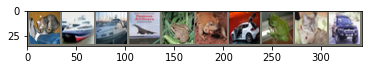

In [17]:
def imshow(inp, mean=None, std=None, title=None):          
    # Check if input is torch, convert it to numpy
    if type(inp) in (torch.cuda.FloatTensor, torch.FloatTensor ):
        if inp.shape[0] == 3 :
            inp = inp.cpu().numpy().transpose((1, 2, 0))
        elif inp.shape[0] == 1 :
            inp = np.squeeze(inp.cpu().numpy(), 0)
        
    if mean is not None and std is not None:
        inp = std * inp + mean
    plt.imshow(inp.clip(0,1))

    if title is not None:
        plt.title(title)

try:
    images, labels = dataiter.next()
except NameError:
    dataiter = iter(testloader)
    images, labels = dataiter.next()

print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(10)))

# print images
plt.figure()
img = torchvision.utils.make_grid(images[0:10], 10)

imshow(img, (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))

images = Variable(images.cuda())
outputs = model4(images)


_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(10)))

<font color=blue>**Which are the mostly confused classes and why are they confused in your opinion?**</font>

## <font color=Red>Extra Task</font>

Run the last network (with data augmentation) three times and plot the convergence curves for the three runs as we did in the second task.
Are they identical ?